In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
import re

In [2]:
# 微軟正黑體 reference to https://dev.to/codemee/matplotlib-xian-shi-zhong-wen-4998
matplotlib.rc('font', family='Microsoft JhengHei')

In [3]:
raw_df = pd.read_csv('data.csv')
raw_df.columns

Index(['(Back up)「大眾對社會企業定義的看法」調查 "General public's view on definition of social enterprise" survey  (回應)',
       '1. 您聽過「社會企業」這個詞嗎？ Have you ever heard of the term “social enterprise”?',
       '2. 您能提供一些社會企業的例子嗎？ Could you provide some of the examples of social enterprises?',
       '3. 您認為現時社會企業的宣傳足夠嗎？ Do you think the current publicity of social enterprises is enough?',
       '4. 您認為您對社會企業的定義有充分的了解嗎？ Do you think you comprehend the definition of social enterprise in its entirety?',
       '5. 你有沒有曾經在任何一間社會企業消費？ Have you ever made a purchase in a social enterprise?',
       '6. 您認為在社企消費等於幫助社會嗎？ Do you agree that buying from social enterprises will help society?',
       '7. 你認為社會企業應該把多少比例的企業淨利潤作為股東分紅？ What proportion of corporate net profits do you think social enterprises should pay out as dividends to shareholders?',
       '8. 你認為社會企業應該擁有多少比例的資金來至其商業模式而不是其他基金或資助？ What proportion of capital do you think social enterprises should have come from their business model as opposed to 

In [4]:
map_registry = {
    'map_col_rename': {
        '(Back up)「大眾對社會企業定義的看法」調查 "General public\'s view on definition of social enterprise" survey  (回應)': 'Timestamp', 
        '1. 您聽過「社會企業」這個詞嗎？ Have you ever heard of the term “social enterprise”?': 'q1', 
        '2. 您能提供一些社會企業的例子嗎？ Could you provide some of the examples of social enterprises?': 'q2', 
        '3. 您認為現時社會企業的宣傳足夠嗎？ Do you think the current publicity of social enterprises is enough?': 'q3', 
        '4. 您認為您對社會企業的定義有充分的了解嗎？ Do you think you comprehend the definition of social enterprise in its entirety?': 'q4', 
        '5. 你有沒有曾經在任何一間社會企業消費？ Have you ever made a purchase in a social enterprise?': 'q5', 
        '6. 您認為在社企消費等於幫助社會嗎？ Do you agree that buying from social enterprises will help society?': 'q6', 
        '7. 你認為社會企業應該把多少比例的企業淨利潤作為股東分紅？ What proportion of corporate net profits do you think social enterprises should pay out as dividends to shareholders?': 'q7', 
        '8. 你認為社會企業應該擁有多少比例的資金來至其商業模式而不是其他基金或資助？ What proportion of capital do you think social enterprises should have come from their business model as opposed to other funds or grants?': 'q8', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [a. 為有特殊教育需要兒童提供專業訓練 Provide professional training for children with special educational needs]': 'q9a', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [b. 讓社會弱勢社群共同參與足球活動，創造共融社會 Allow disadvantaged groups in society to participate in football activities and create an inclusive society]': 'q9b', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [c. 為有需要的人士提供可靠的聽力檢驗結果  Provide reliable hearing test results to those in need]': 'q9c', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [d. 提供個別關懷，全面照顧和復康運動 Provide individual care, comprehensive care and rehabilitative exercise]': 'q9d', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [e. 改善長者身體平衡，防止跌倒受傷 Improve the body balance of the elderly and prevent falls and injuries]': 'q9e', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [f. 推動長者及其家人建立身心靈全人健康狀態 Promote the elderly and their families to establish a healthy state of body, mind and spirit]': 'q9f', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [g. 促進正面發展並灌輸正確價值觀給幼稚園到大學的學生 Promote positive development and instill the right values ​​in students from kindergarten to university]': 'q9g', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [h. 向富有才華的青年人提供表演平台 Provide performance platform to talented young people]': 'q9h', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [i. 以中式酒樓業務為弱勢婦女的提供工作及培訓機會 Providing job and training opportunities for disadvantaged women through Chinese restaurant business]': 'q9i', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [j. 支持本地生產及生態種植 Support local production and ecological planting]': 'q9j', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [k. 推廣素食文化，建立健康社區 Promote vegetarian culture and build healthy communities]': 'q9k', 
        '9. 你多大程度上同意以下範疇屬於社會使命？ To what extent do you consider the following categories to be social missions? [l. 利用健身室或提供瑜伽班推廣全民健康 Use fitness studios or provide yoga classes to promote universal health]': 'q9l', 
        '10. 您認為在香港創辦社會企業必須符合下列哪一項要求？ Which of the following requirement(s) do you think have to fulfill for starting a social enterprise in Hong Kong?': 'q10', 
        '11. 您認為在香港開設社會企業需要有關牌照或者認證嗎？ Do you think licensing or a certificate is required to start a social enterprise in Hong Kong?': 'q11', 
        '12. 據你所知，現時有沒有特定法例規管社會企業嗎？ Do you think there is any specific legislations currently regulating social enterprises?': 'q12', 
        '13. 您認為誰可以在香港創辦社會企業？(可選擇多項） Who(s) can launch a social enterprise in Hong Kong?': 'q13', 
        '您的年齡 Your age group': 'Agegroup', 
        '您的教育水平  Your education level': 'Education', 
        '您的收入水平(每月) Your income level (Per month)': 'Income', 
        '你是從哪裡得知此問卷？ Where did you receive this questionnaire?': 'Receive', 
        '推薦人名稱 Recommender name': 'Recommender'
        },
    'map_yes_no': {
        '是 Yes': 1,
        '否 No': 0
        },
    'map_q7': {
        '0': 0,
        '⅓': 0.333,
        '½': 0.5,
        '⅔': 0.667,
        '¾': 0.75,
        '全部 All': 1
        },
    'map_q8': {
        '0% - 19%': 0,
        '20% - 49%': 0,
        '50% - 79%': 1,
        '80% - 100%': 1
        },
    'map_q9': {
        '非常同意 Strongly agree': 2,
        '同意 Agree': 1,
        '不同意 Disagree': -1,
        '非常不同意 Strongly disagree': -2
        },
    'map_q10': {
        '肩負社會使命 Having a social mission': 'q10_mission',
        '一定比例的企業淨利（例如至少 ⅔ ）必須投放經營社企上 A certain ratio (e.g. at least ⅔) of the net profit has to be reinvested in the social enterprises’ operation)': 'q10_reinvest',
        '獲得政府或社會企業組織的認證（例如 香港社會服務聯會社企指南 SEBC、香港社會企業總會社企認證 SEEMARK）Recognized by the Government or Social Enterprise organization (e.g. SE Directory of HKCSS; SEE MARK of GCSE)': 'q10_recognized',
        '必須實踐及履行 ESG（環境、社會和治理）/CSR（企業社會責任）': 'q10_esg_csr',
        '透過提供服務或產品銷售創造收入，自負盈虧 Generate income by providing services or selling products and  be financially self-sustainable': 'q10_self_sustain',
        '稅務局確認的慈善組織（俗稱88牌） A charitable organization recognized by the Inland Revenue under Section 88.其他: 請註明( others: please specify )': 'q10_irs_88',
        '受政府或企業資助 Subsidized by the Government or private enterprise': 'q10_subsidized',
        '非政府組織 Non-Government Organization (NGO)': 'q10_ngo'
        },
    'map_q13': {
        '任何人 Anyone': 'q13_anyone',
        '企業 Enterprises': 'q13_enterprises',
        '慈善機構 Charity': 'q13_charity',
        '政府 The Government': 'q13_government',
        '非政府組織/非牟利組織 NGOs/NPOs': 'q13_NGOs_NPOs'
        },
    'map_Agegroup': {
        '18-25 歳 18-25 years old': 1,
        '26-35 歳 26-35 years old': 2,
        '36-50 歳 36-50 years old': 3,
        '51-64 歳 51-64 years old': 4,
        '65 歳以上 over 65': 5
        },
    'map_Education': {
        '其他 others:': 0,
        '小學畢業或以下 Graduating from primary school or below': 1,
        '中學畢業 Graduating from secondary school': 2,
        '專上教育 (非學位／副學位課程) Higher education (Non-degree/Sub-degree programmes)': 3,
        '專上教育 (學士學位課程) Higher education (Degree programmes)': 4,
        '專上教育 (碩士／博士學位課程) Higher education (Master/ Doctor programmes)': 5
        },
    'map_Income': {
        '$20000 以下 Below $20000': 10000,
        '$20000 - $39999': 30000,
        '$40000 - $59999': 50000,
        '$60000 - $79999': 70000,
        '$80000 以上 More than $80000': 90000
        },
    'map_cols': {
        'cols_one_hot_encode_map': [ 'q10', 'q13'],
        'cols_simple_map': {
            'cols_single': ['q7', 'q8', 'Agegroup', 'Education', 'Income'],
            'cols_yes_no': ['q1', 'q3', 'q4', 'q5', 'q6', 'q11', 'q12'],
            'cols_q9': ['q9a', 'q9b', 'q9c', 'q9d', 'q9e', 'q9f', 'q9g', 'q9h', 'q9i', 'q9j', 'q9k', 'q9l']
            }
        }
    }

In [5]:
def reverse_map(map_dict):
    return {v: k for k, v in map_dict.items()}

def convert_chinese_timestamp(series):
    """
    Convert a series of Chinese timestamps to datetime objects.
    """
    # Replace Chinese AM/PM with English equivalents
    converted = series.str.replace('上午', 'AM').str.replace('下午', 'PM')
    
    # Convert to datetime with the correct format
    return pd.to_datetime(converted, format='%Y年%m月%d日 %p%I:%M:%S', errors='coerce')

def simple_map(df, col_name, map_dict):
    """
    Map the values in a column using a provided mapping dictionary.
    """
    df = df.copy()
    # Map the column using the mapping dictionary
    df[col_name] = df[col_name].map(lambda x: map_dict.get(x, np.nan))
    
    return df

def one_hot_encode_map(df, col_name, map_dict):
    """
    One-hot encode a column in the DataFrame.
    The column is expected to contain comma-separated values.
    """
    df = df.copy()
    # Get the position of the column to be one-hot encoded
    col_index = df.columns.get_loc(col_name)

    # One-hot encode the column and rename the columns using the mapping dictionary
    dummies = df[col_name].str.get_dummies(sep=', ').rename(columns=map_dict)

    # preseve column order same as key order in the mapping dictionary
    dummies = dummies.reindex(columns=map_dict.values())
    
    # replace the original column with the one-hot encoded columns at the original position of the column
    df = pd.concat([df.iloc[:, :col_index], dummies, df.iloc[:, col_index + 1:]], axis=1)
    
    return df

def data_cleaning(df):
    """
    Clean the DataFrame by renaming columns, converting timestamps, and mapping values.
    """
    # create a copy of the DataFrame to avoid modifying the original
    df = df.copy()
    # rename columns
    df = df.rename(columns=map_registry['map_col_rename'])
    df.columns = ['timestamp'] + list(df.columns[1:])
    # convert timestamp to datetime
    df['timestamp'] = convert_chinese_timestamp(df['timestamp'])

    # q16 is income in string format, convert to numeric
    df['Income'] = df['Income'].str.replace('$60000 - $80000', '$60000 - $79999')

    # q10 contain "," inside the answer, convert to ";" first
    df['q10'] = df['q10'].str.replace('HKCSS, SEE', 'HKCSS; SEE')

    # loop through the map_cols in map_registry to apply mapping
    for map_type, map_candidate in map_registry['map_cols'].items():
        if map_type == 'cols_one_hot_encode_map':
            for col in map_candidate:
                map_name = f'map_{col}'
                df = one_hot_encode_map(df, col, map_registry[map_name])
                
        elif map_type == 'cols_simple_map':
            for sub_map_type, sub_map_candidate in map_candidate.items():
                if sub_map_type == 'cols_single':
                    for col in sub_map_candidate:
                        map_name = f'map_{col}'
                        df = simple_map(df, col, map_registry[map_name])
                else:
                    for col in sub_map_candidate:
                        map_name = f"map_{sub_map_type.split('cols_')[1]}"
                        df = simple_map(df, col, map_registry[map_name])
        else:
            print(f"unknown key: {map_type}")

    return df

In [6]:
df = data_cleaning(raw_df)

### Regardless of "correct" or "incorrect", younger participants tend to select fewer options in Q10

In [7]:
q10_age = df[['Agegroup'] + list(map_registry['map_q10'].values())].copy()
q10_age['q10_all'] = 1
pd.options.display.float_format = '{:,.1%}'.format
display(simple_map(q10_age, 'Agegroup', reverse_map(map_registry['map_Agegroup'])).groupby('Agegroup').mean())
display(simple_map(q10_age, 'Agegroup', reverse_map(map_registry['map_Agegroup'])).groupby('Agegroup').sum())

q10_mission  q10_reinvest  q10_recognized  \
Agegroup                                                             
18-25 歳 18-25 years old        84.7%         57.1%           52.7%   
26-35 歳 26-35 years old        89.2%         65.7%           56.9%   
36-50 歳 36-50 years old        85.1%         68.3%           59.6%   
51-64 歳 51-64 years old        89.5%         75.4%           71.9%   
65 歳以上 over 65                 71.4%         57.1%           64.3%   

                         q10_esg_csr  q10_self_sustain  q10_irs_88  \
Agegroup                                                             
18-25 歳 18-25 years old        55.7%             44.3%       36.9%   
26-35 歳 26-35 years old        59.8%             56.9%       44.1%   
36-50 歳 36-50 years old        55.9%             51.6%       46.6%   
51-64 歳 51-64 years old        64.0%             60.5%       59.6%   
65 歳以上 over 65                 64.3%             64.3%       42.9%   

                         q10_subsidized  q10_ngo  q10_all  
Agegroup                                                   
18-25 歳 18-25 years old           35.0%    29.1%   100.0%  
26-35 歳 26-35 years old           29.4%    28.4%   100.0%  
36-50 歳 36-50 years old           41.0%    41.0%   100.0%  
51-64 歳 51-64 years old           55.3%    59.6%   100.0%  
65 歳以上 over 65                    50.0%    50.0%   100.0%

q10_mission  q10_reinvest  q10_recognized  \
Agegroup                                                             
18-25 歳 18-25 years old          172           116             107   
26-35 歳 26-35 years old           91            67              58   
36-50 歳 36-50 years old          137           110              96   
51-64 歳 51-64 years old          102            86              82   
65 歳以上 over 65                    10             8               9   

                         q10_esg_csr  q10_self_sustain  q10_irs_88  \
Agegroup                                                             
18-25 歳 18-25 years old          113                90          75   
26-35 歳 26-35 years old           61                58          45   
36-50 歳 36-50 years old           90                83          75   
51-64 歳 51-64 years old           73                69          68   
65 歳以上 over 65                     9                 9           6   

                         q10_subsidized  q10_ngo  q10_all  
Agegroup                                                   
18-25 歳 18-25 years old              71       59      203  
26-35 歳 26-35 years old              30       29      102  
36-50 歳 36-50 years old              66       66      161  
51-64 歳 51-64 years old              63       68      114  
65 歳以上 over 65                        7        7       14

In [8]:
# plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# Question 9

In [9]:
def count_values(df):
    counts = pd.DataFrame()
    for col in df.columns:
        counts[col] = df[col].astype(
            pd.CategoricalDtype(
                categories=["非常不同意 Strongly disagree", "不同意 Disagree", "同意 Agree", "非常同意 Strongly agree"], 
                ordered=True
            )
        ).value_counts(normalize=True).sort_index()
    return counts

In [10]:
q9_cols = map_registry['map_cols']['cols_simple_map']['cols_q9']
q9 = simple_map(df[q9_cols], q9_cols, reverse_map(map_registry['map_q9']))

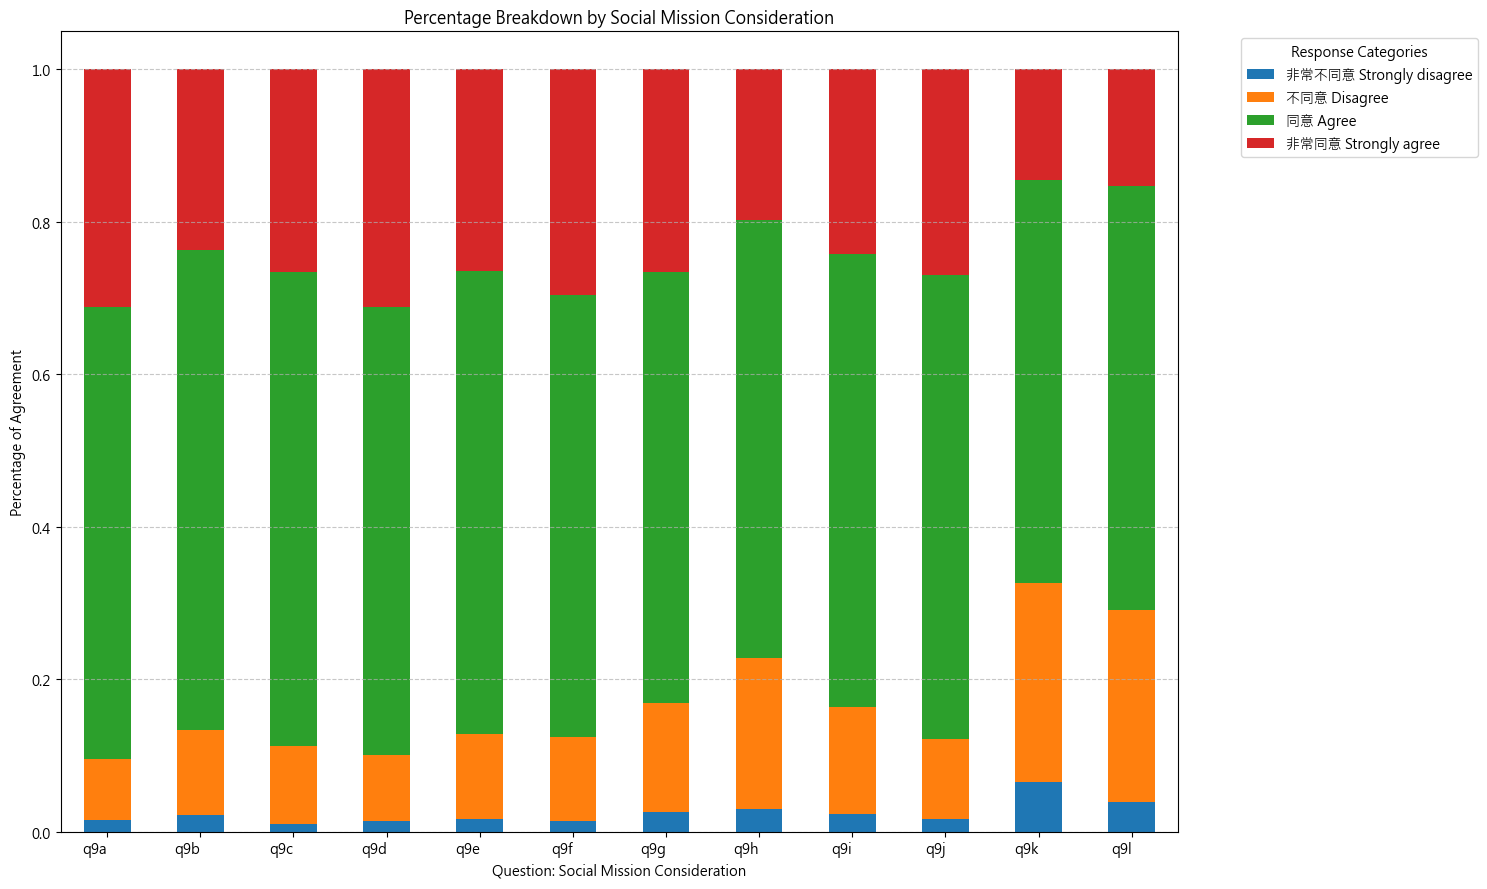

In [11]:
count_values(q9).T.plot(kind='bar', stacked=True, figsize=(15, 9))
plt.title('Percentage Breakdown by Social Mission Consideration')
plt.xlabel('Question: Social Mission Consideration')
plt.ylabel('Percentage of Agreement')
plt.xticks(rotation ='horizontal', ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Response Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('stacked_bar_chart.png')

In [12]:
def cross_tab_bar_chart(df, x_column, y_column, map_registry_entry, normalize, q_type='yes_no', legend_map=None):
    if q_type == 'yes_no':
        text_title = 'Yes = 1, No = 0'
    else:
        text_title = q_type
    crosstab = pd.crosstab(index=df[x_column], columns=df[y_column], normalize=normalize)
    crosstab_rename = crosstab.rename(columns=reverse_map(map_registry[map_registry_entry]))
    if legend_map is not None:
        crosstab_rename = crosstab_rename.rename(index=legend_map)

    crosstab_rename.T.plot(kind='bar', stacked=True, figsize=(15, 9))
    plt.xticks(rotation = 45, rotation_mode='anchor', ha='right')
    plt.title(reverse_map(map_registry['map_col_rename'])[x_column])
    plt.xlabel(reverse_map(map_registry['map_col_rename'])[y_column])
    plt.ylabel('Percentage of Agreement (%)')
    plt.legend(title=text_title, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Question 9

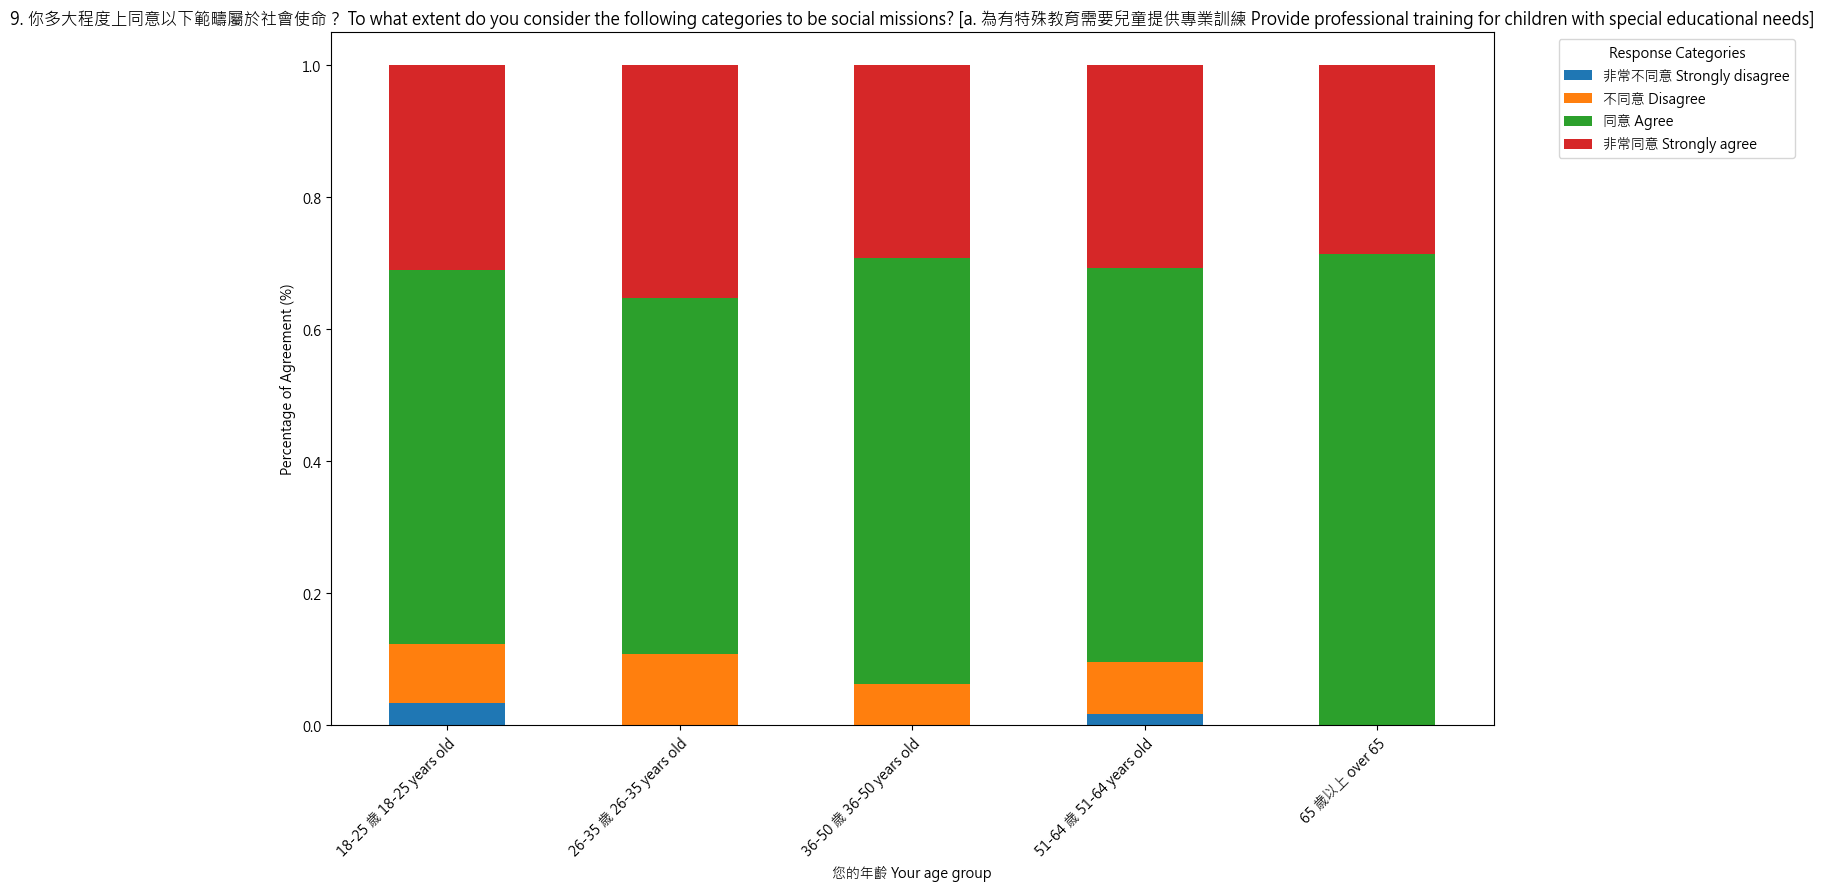

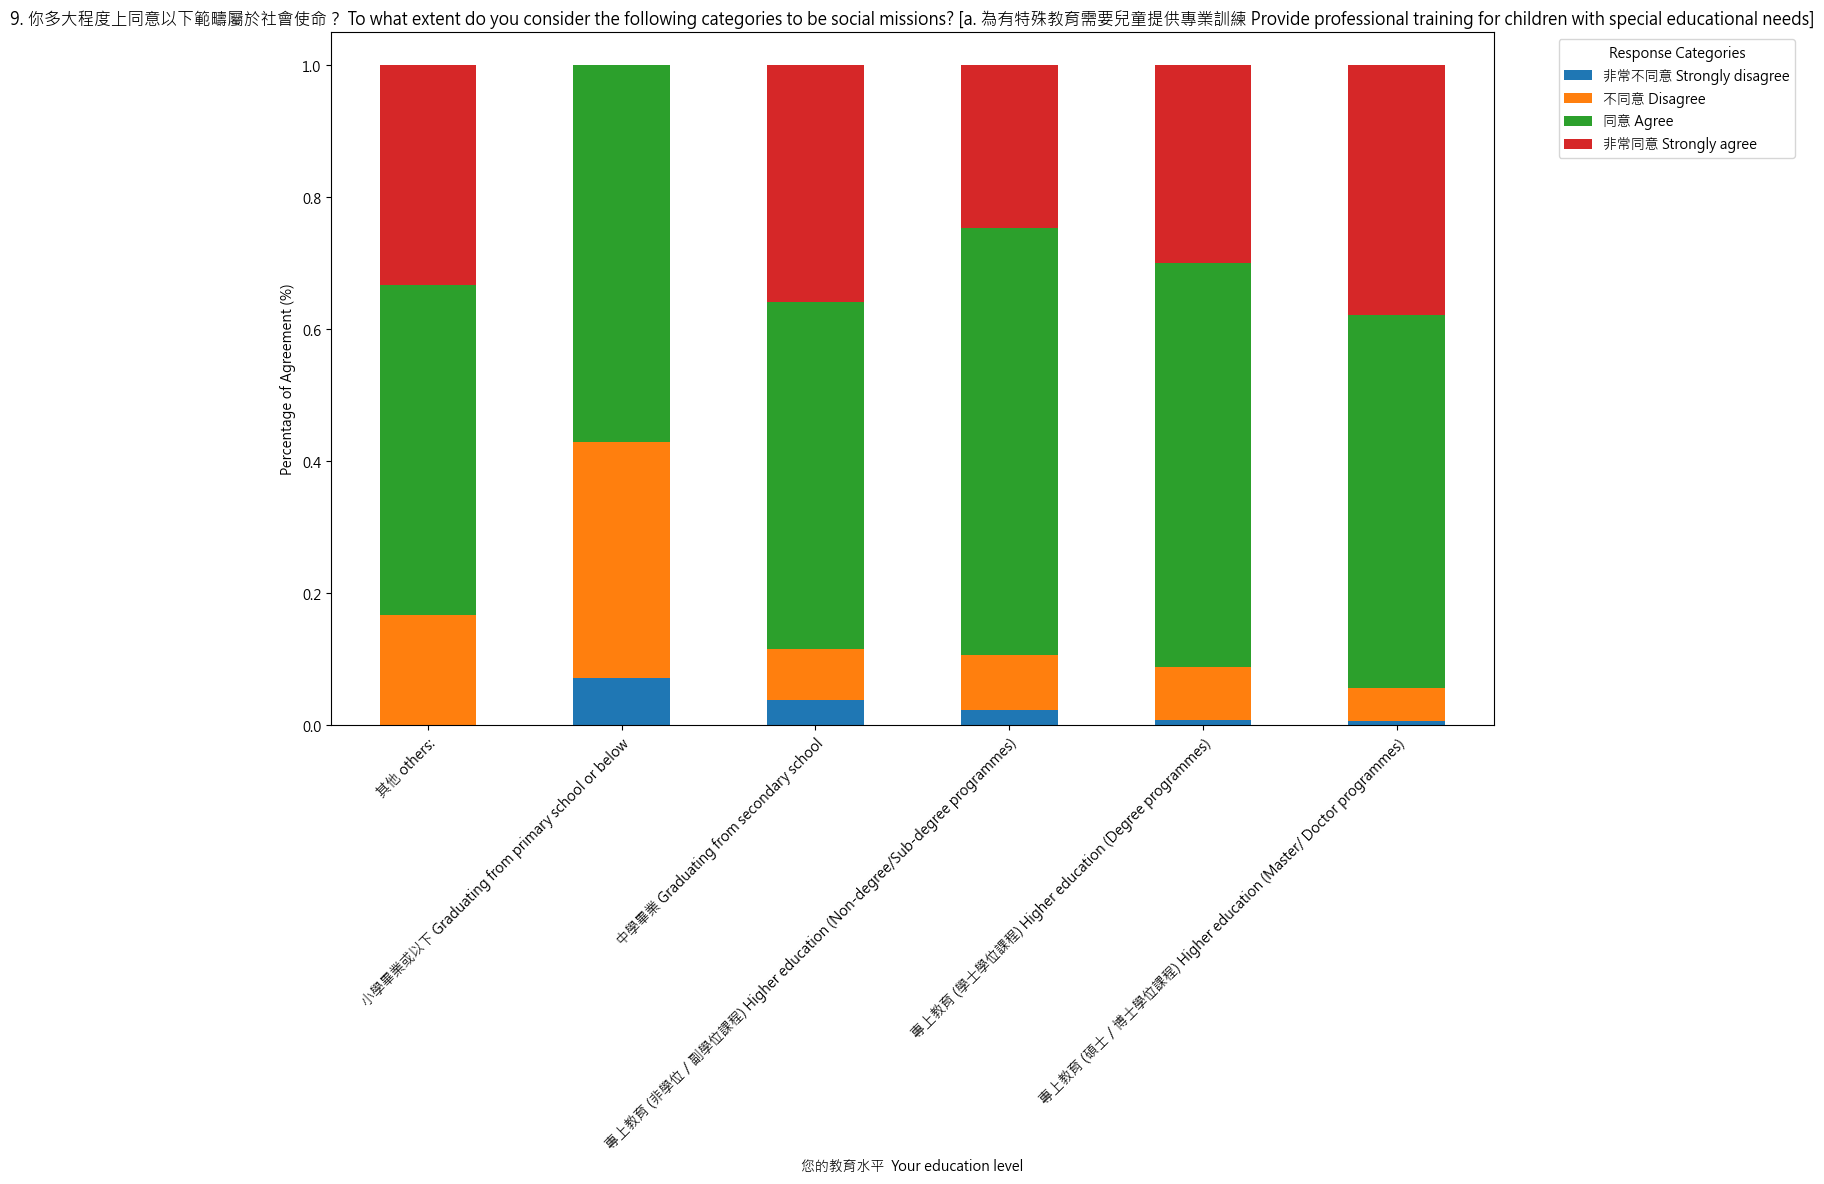

Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.


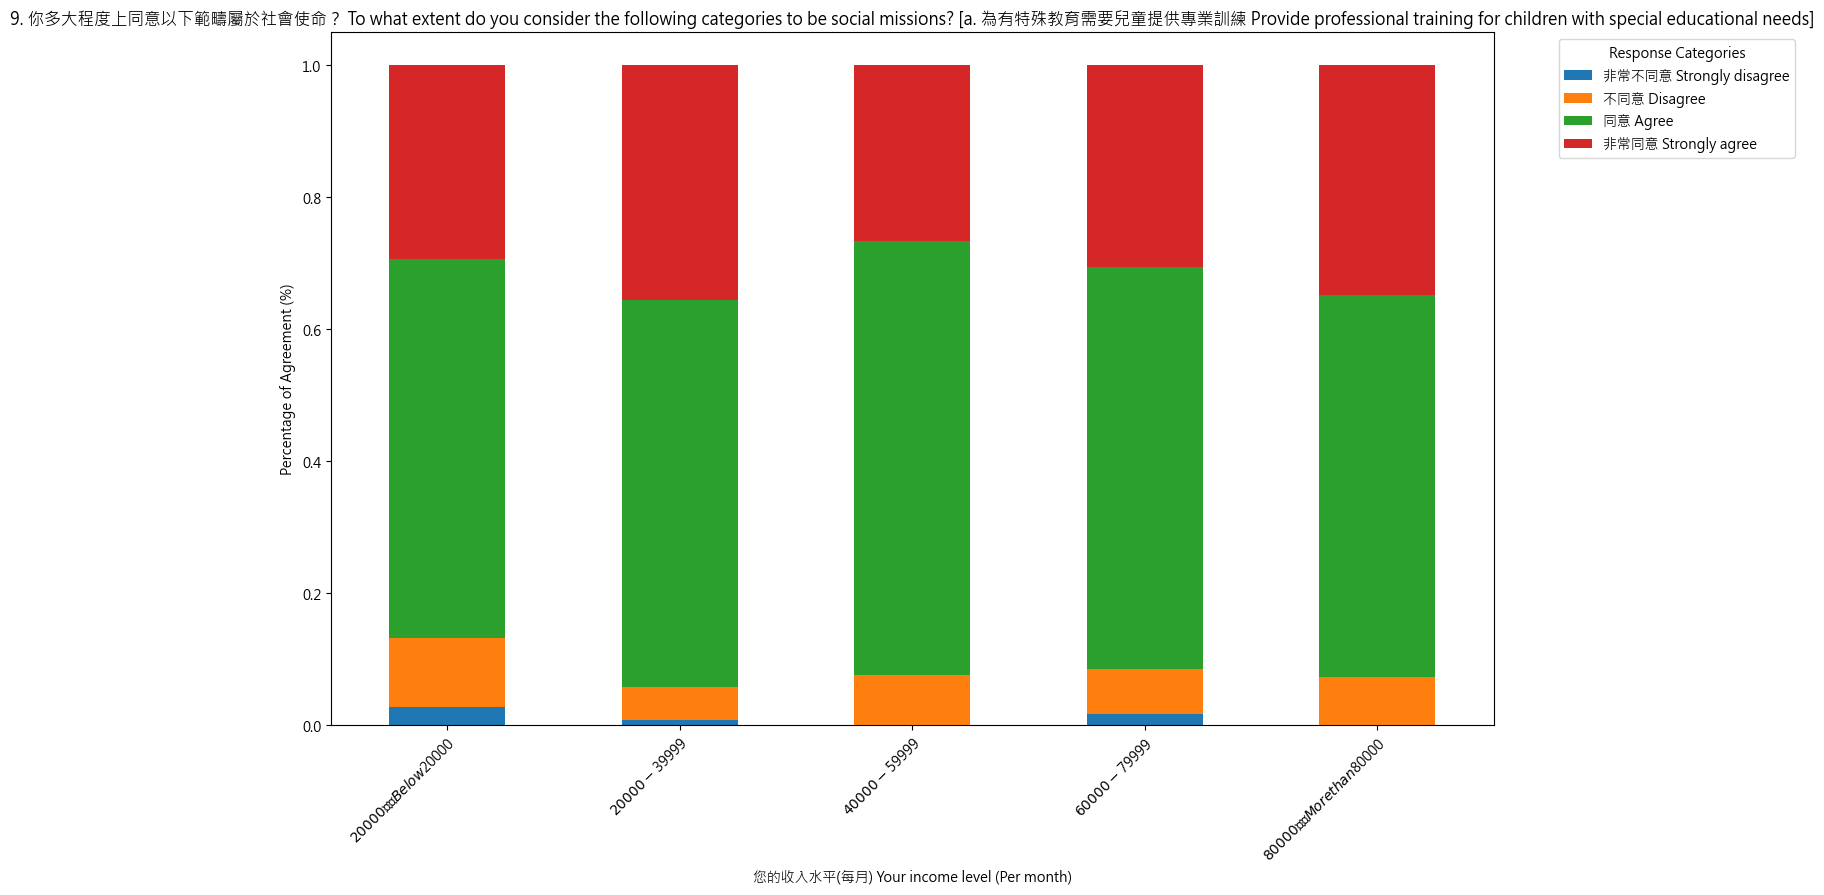

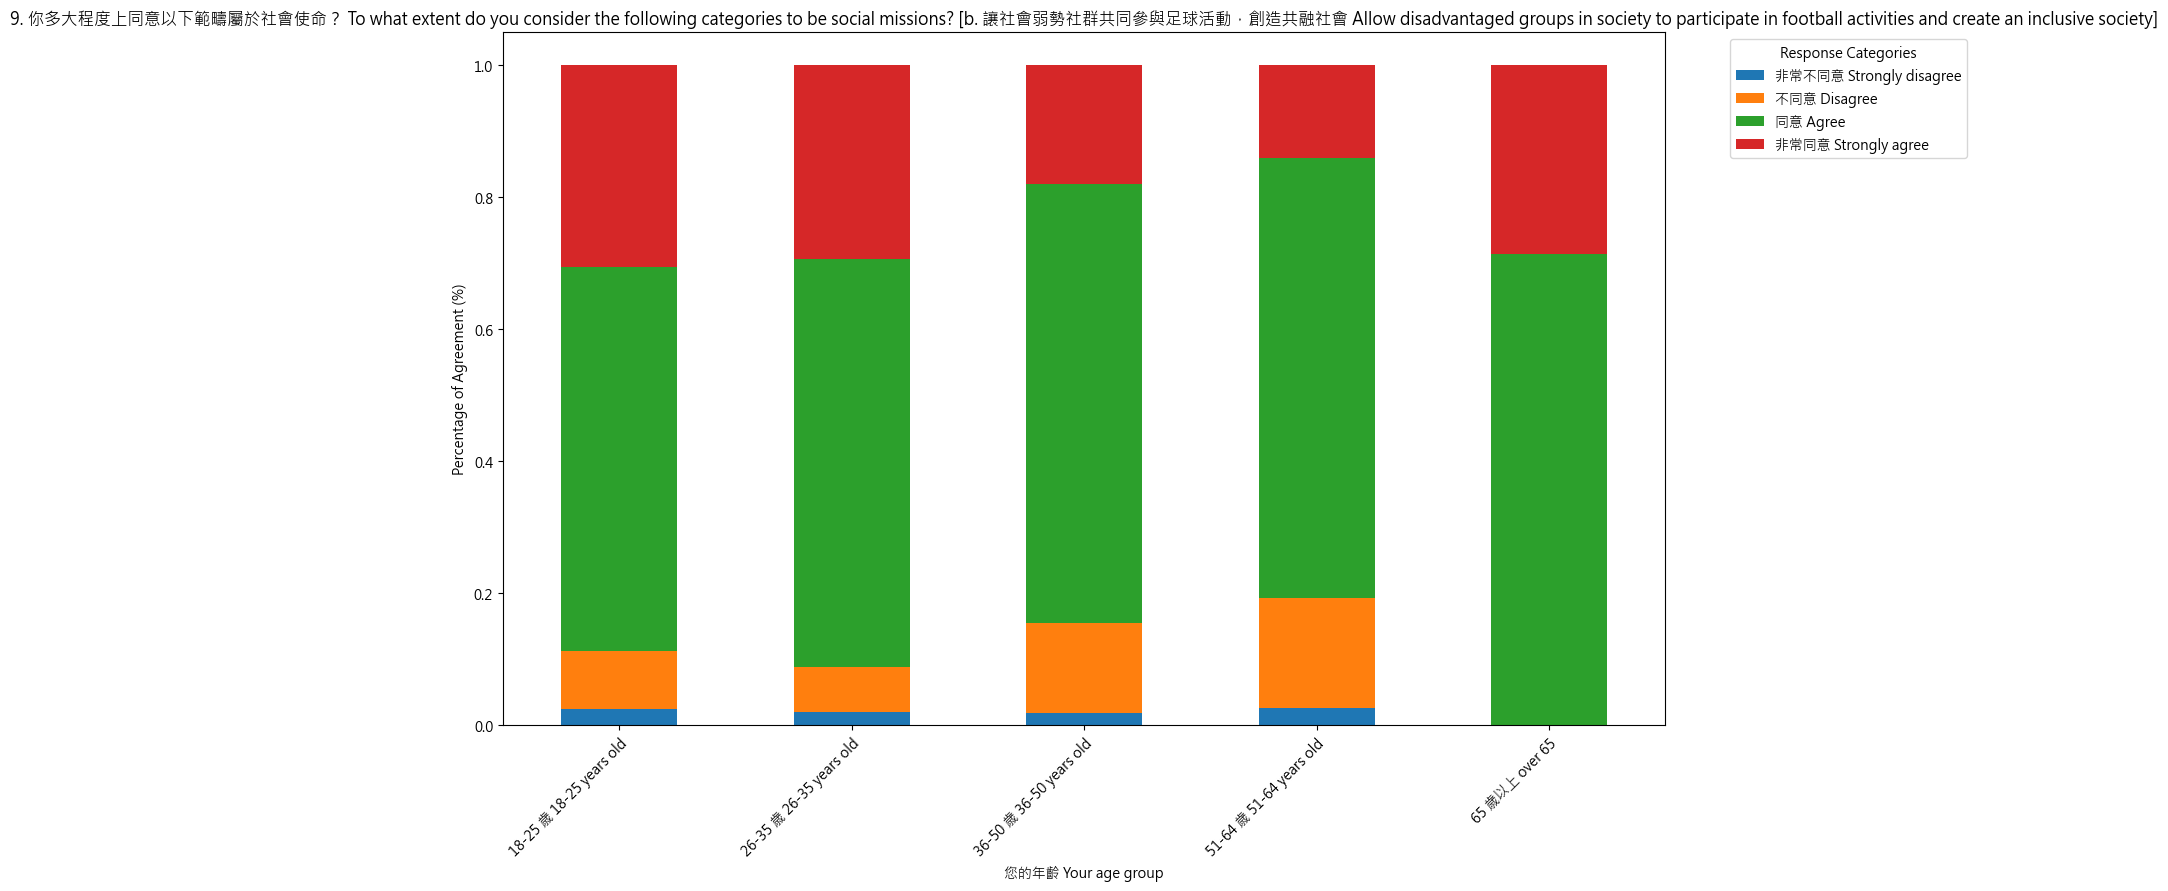

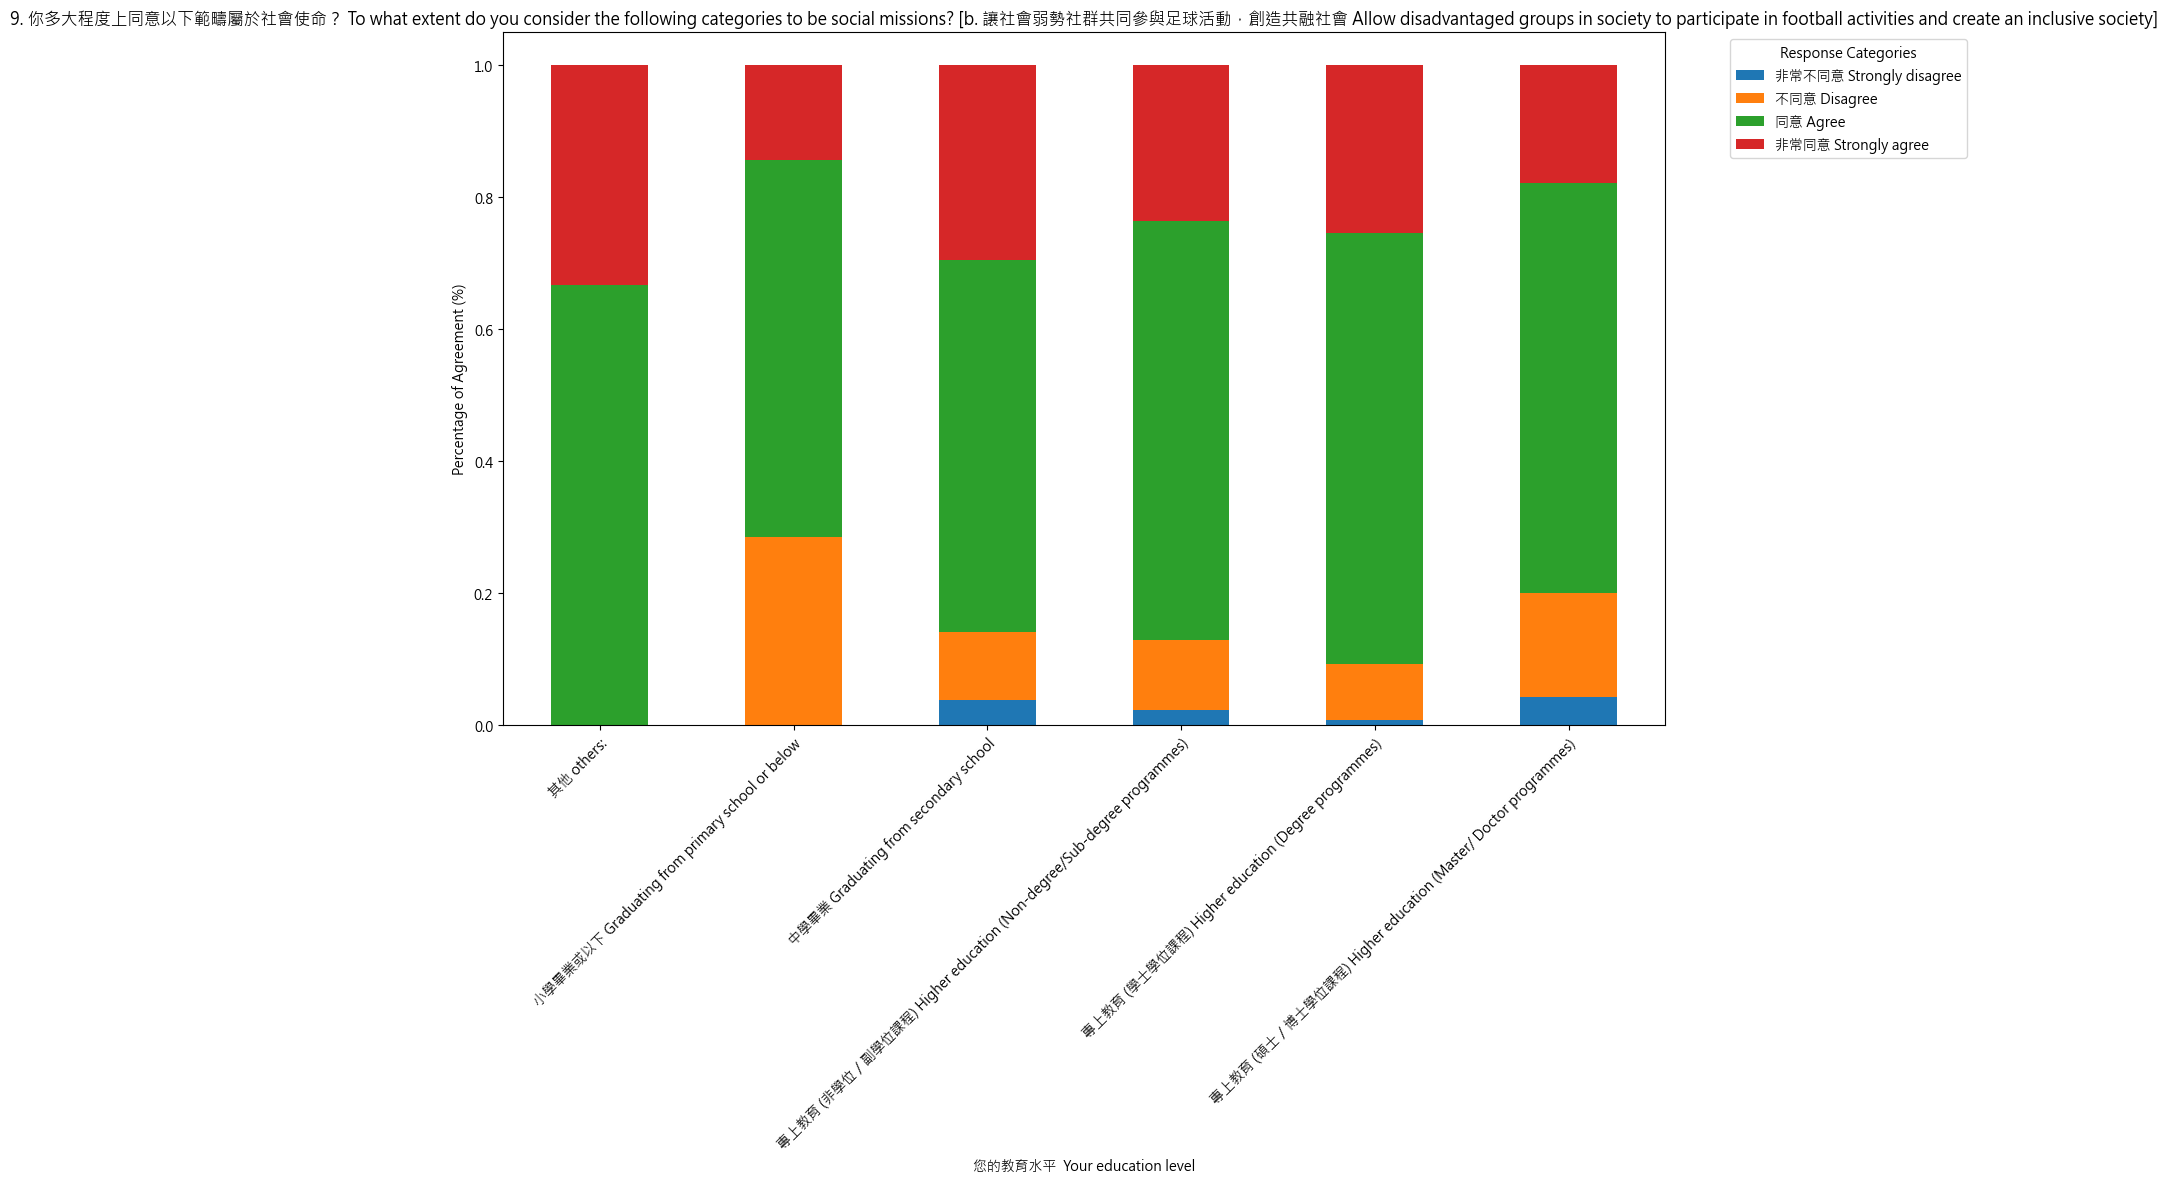

Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.


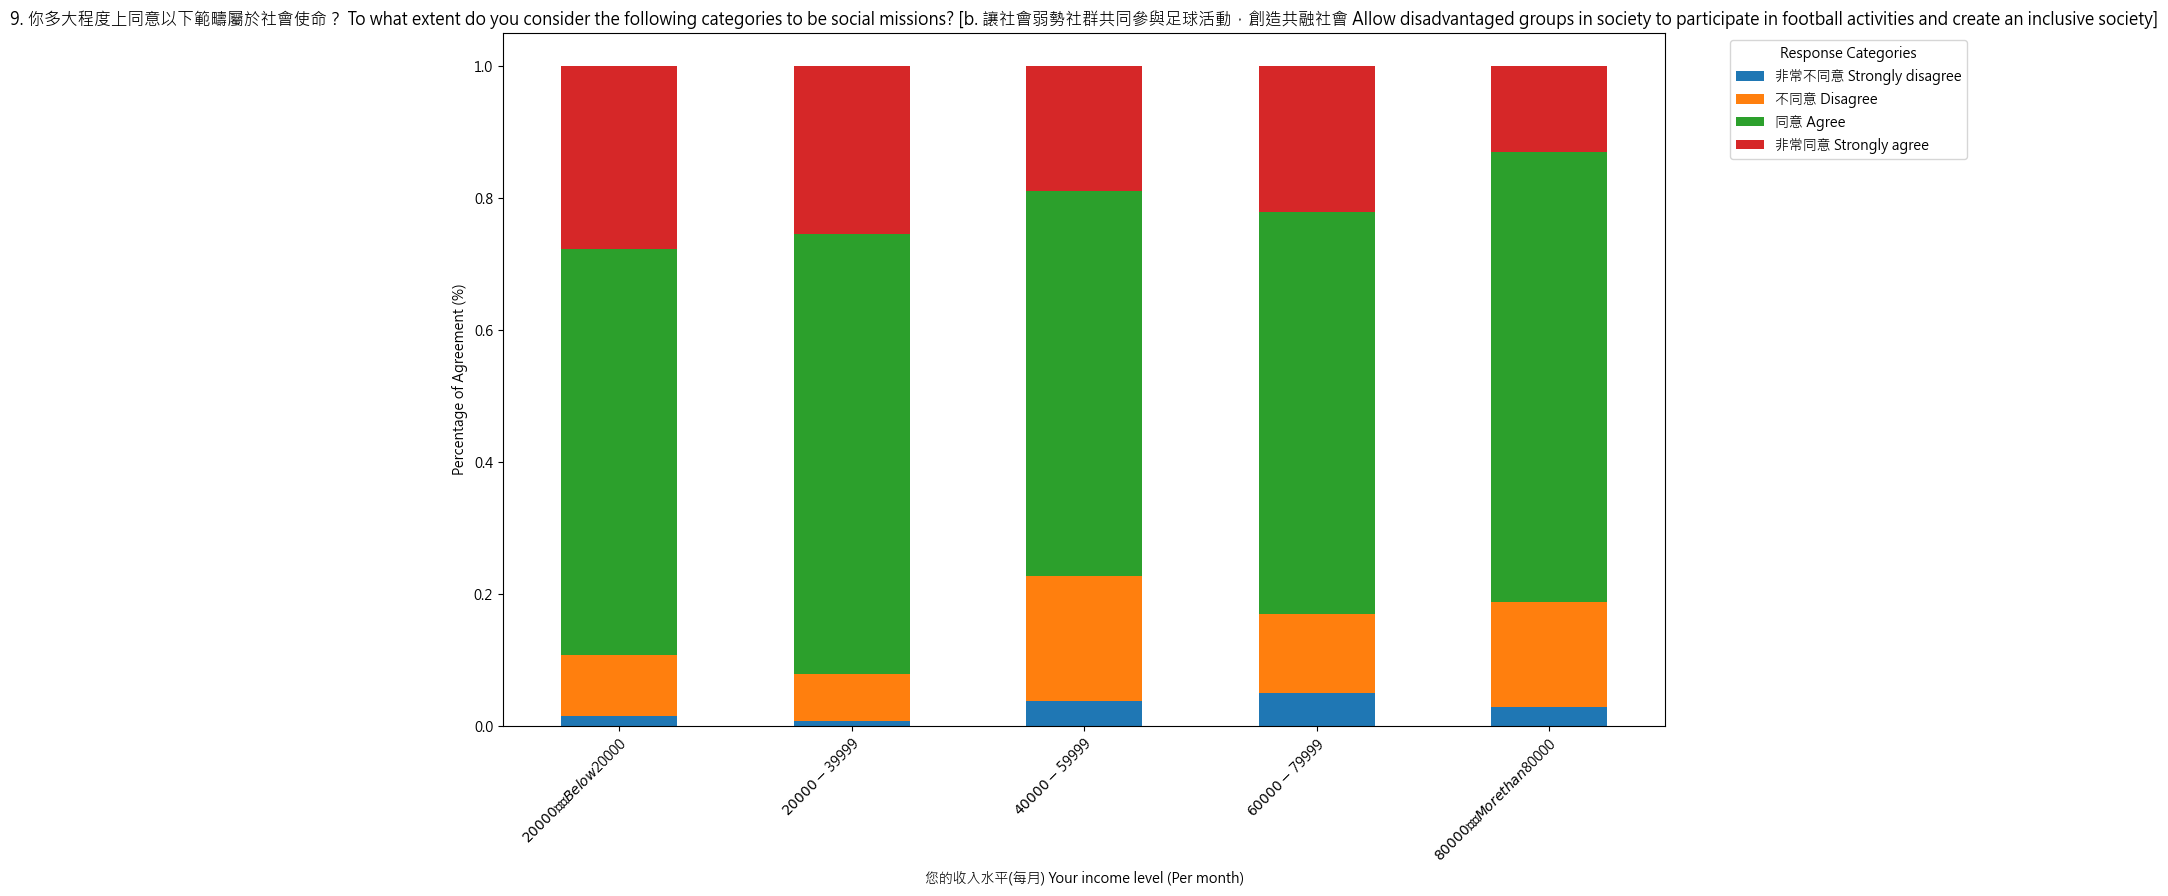

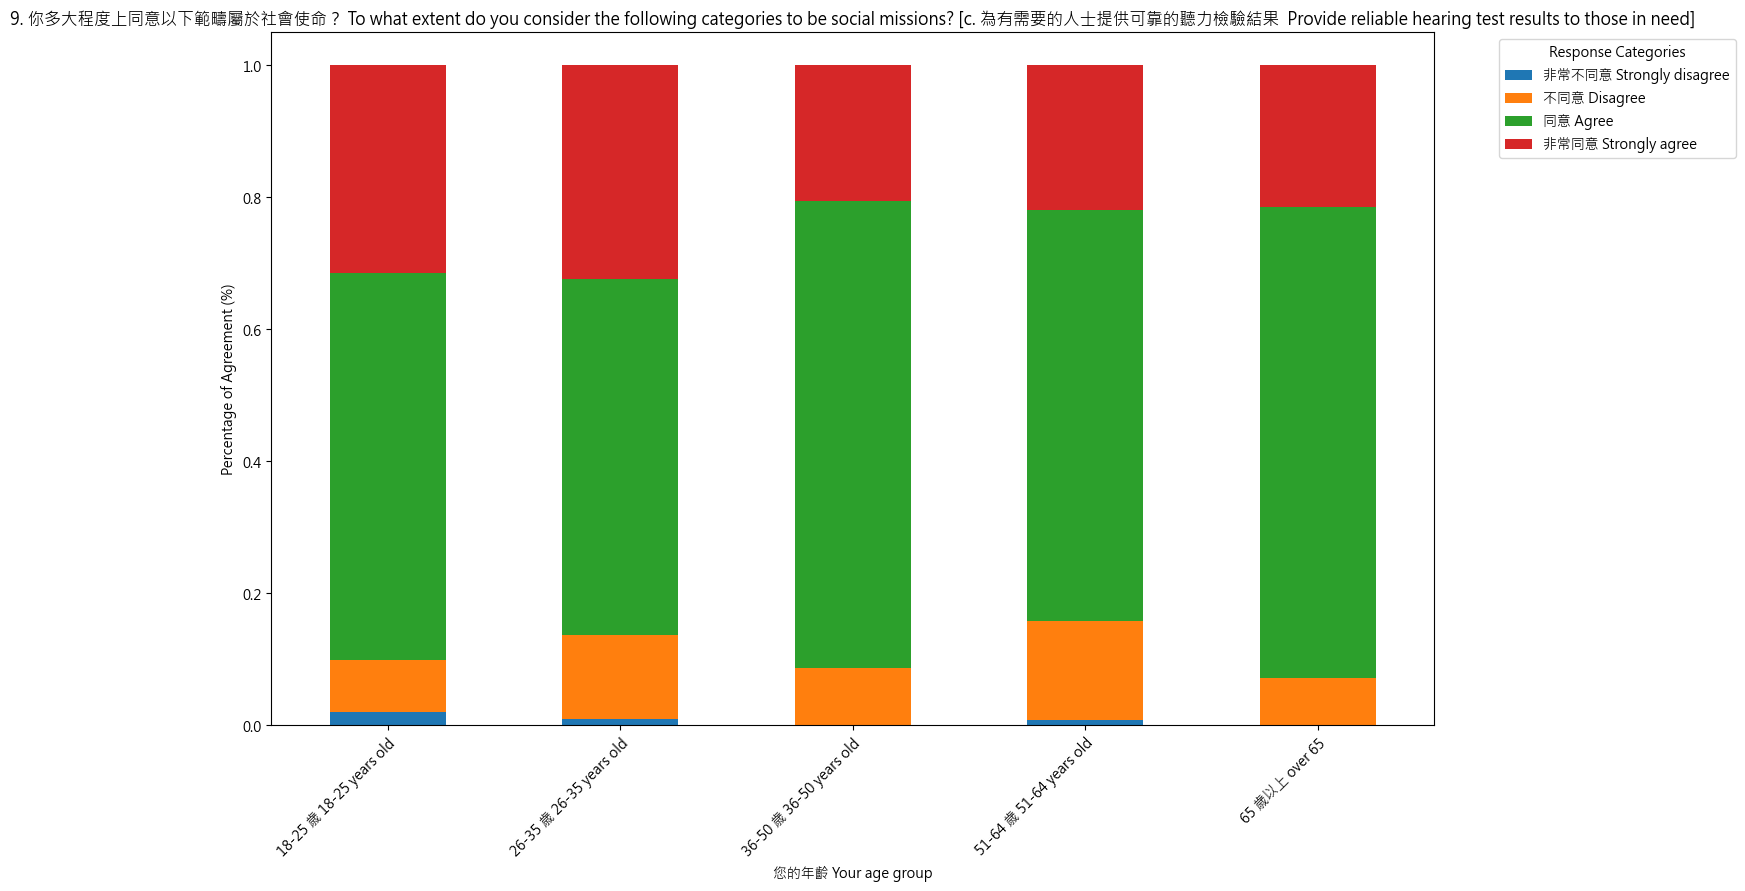

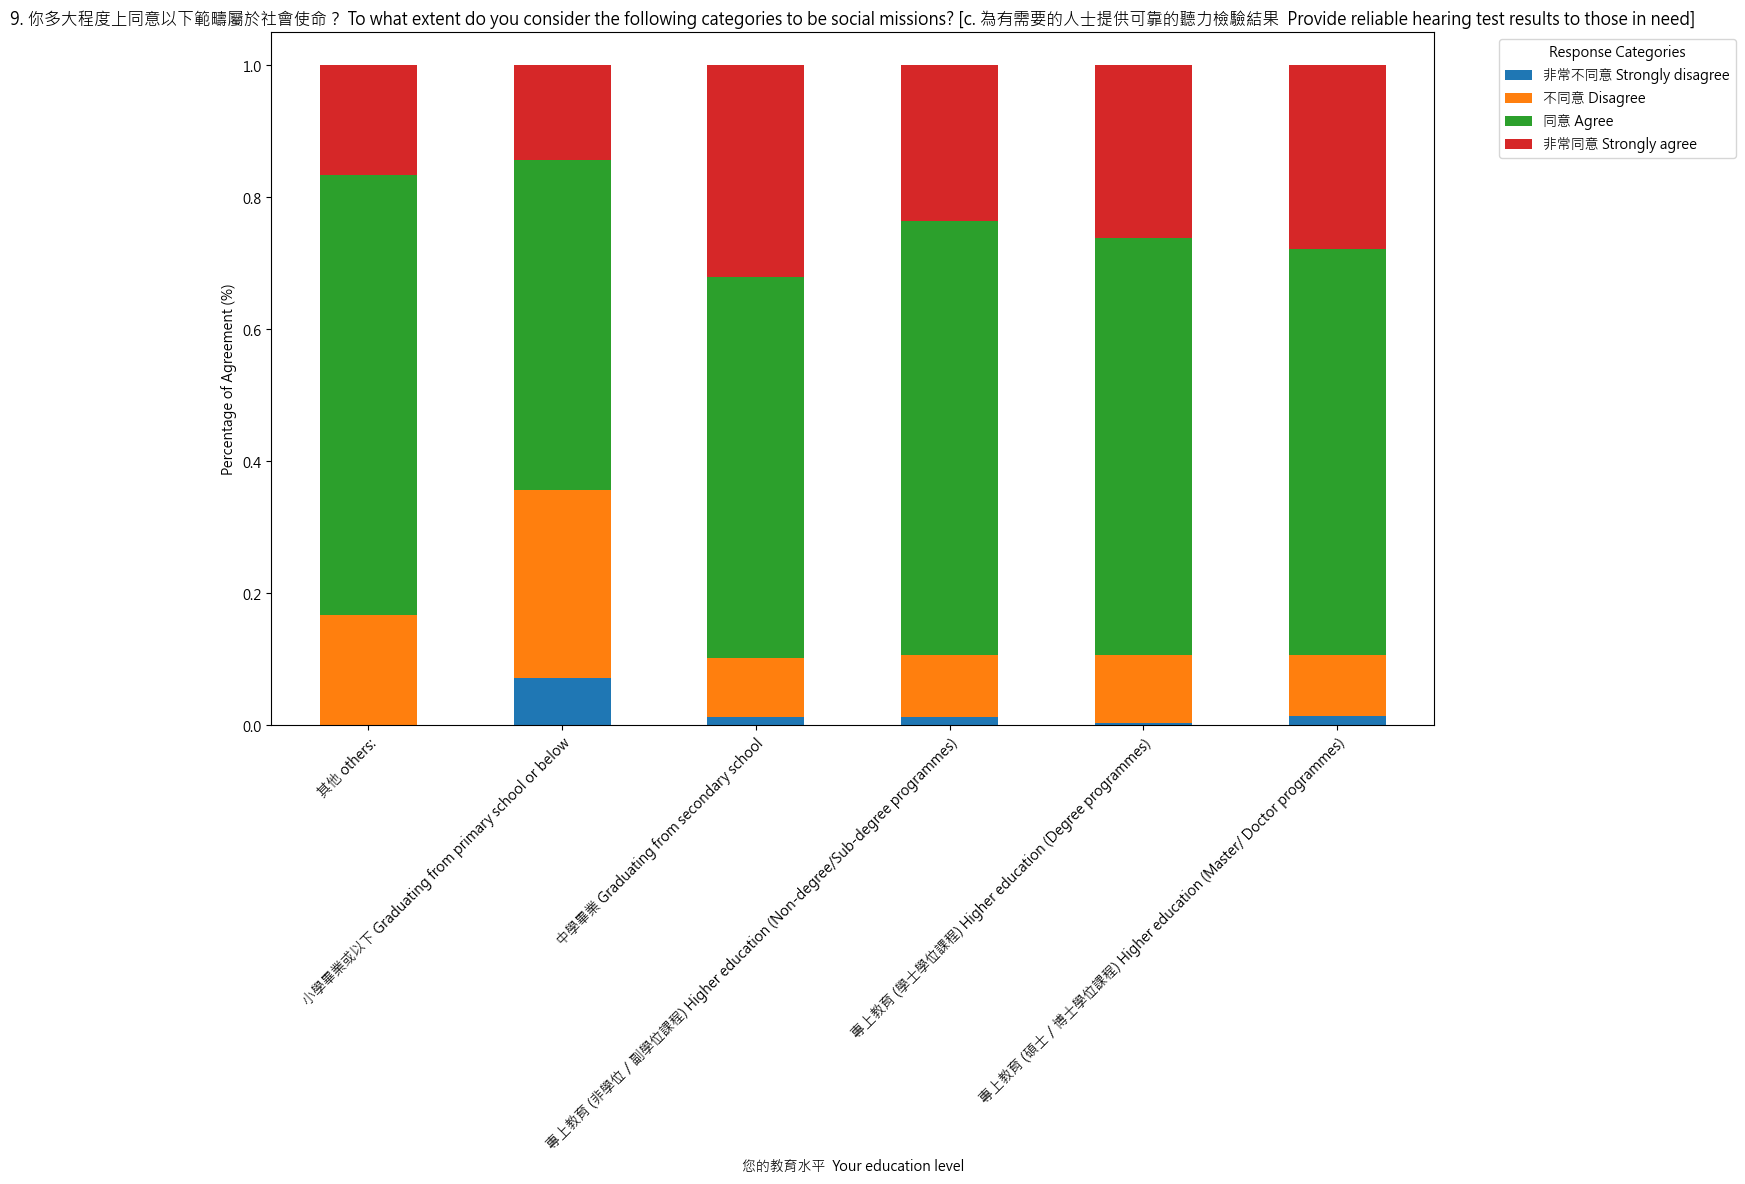

Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.


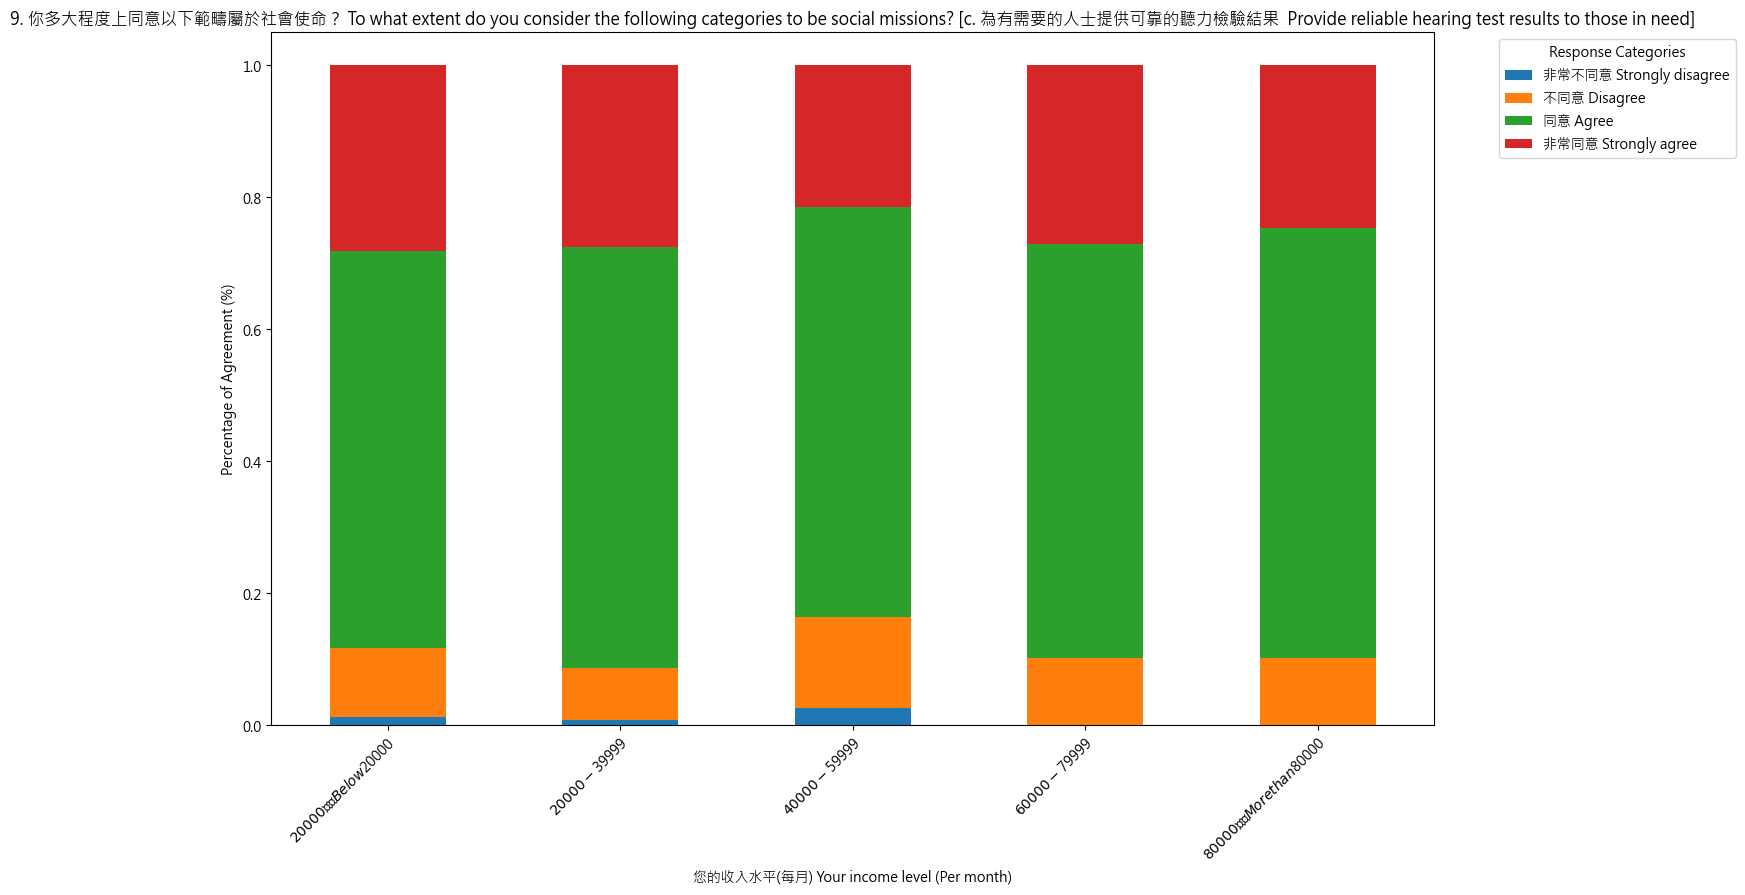

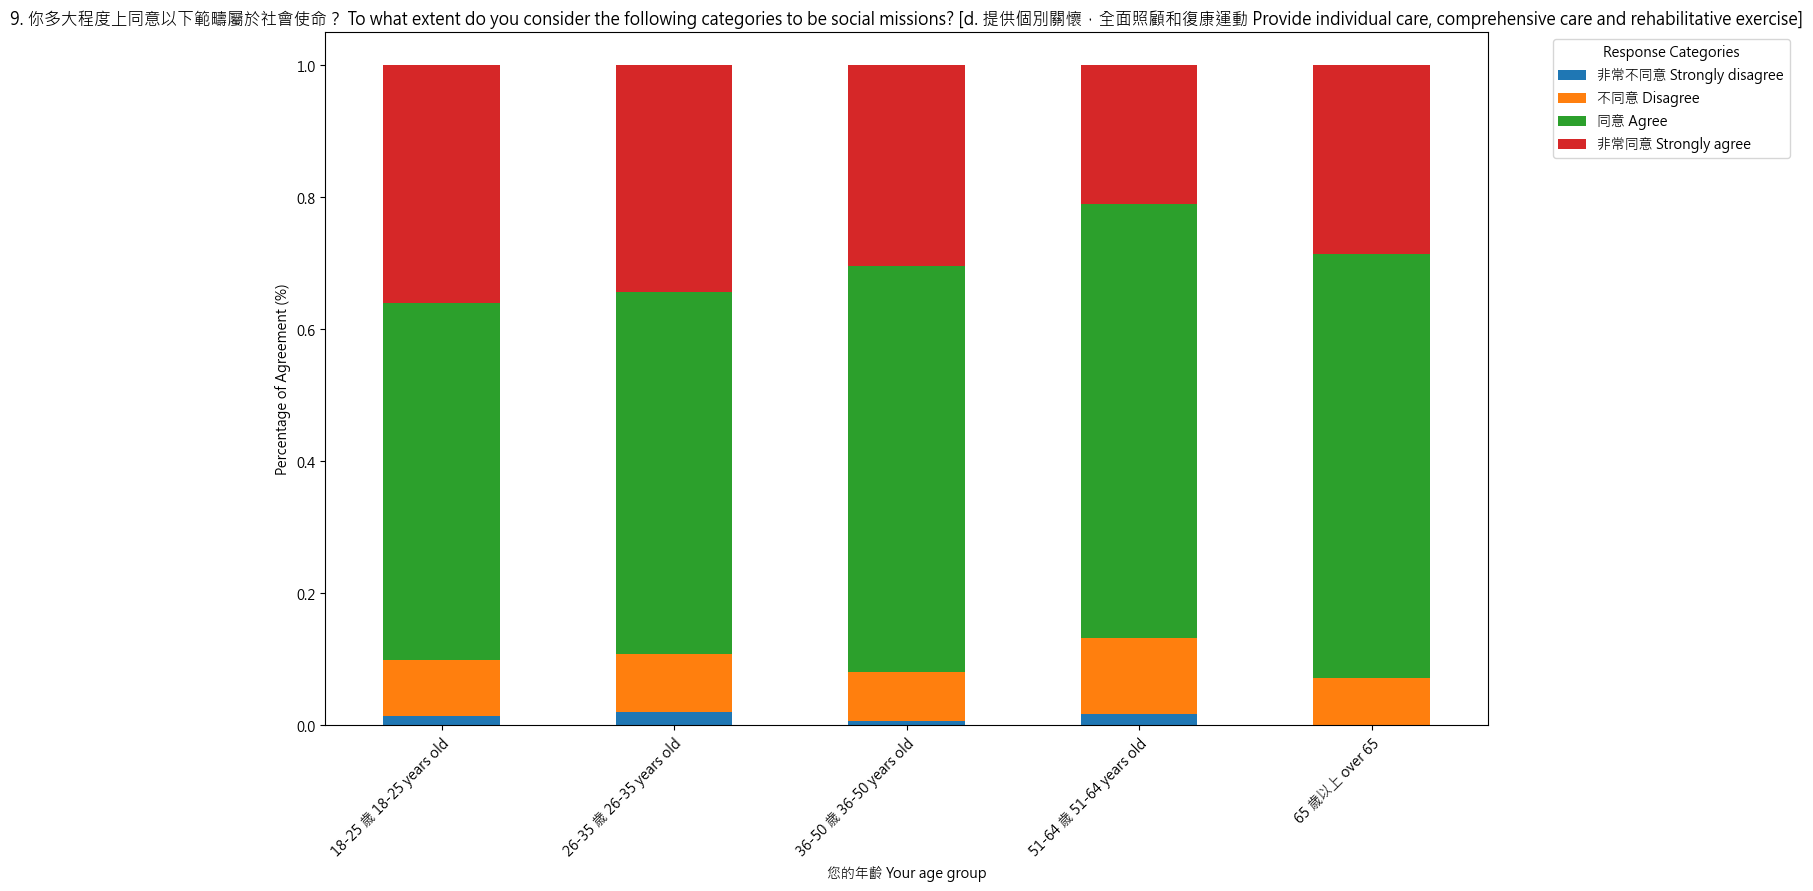

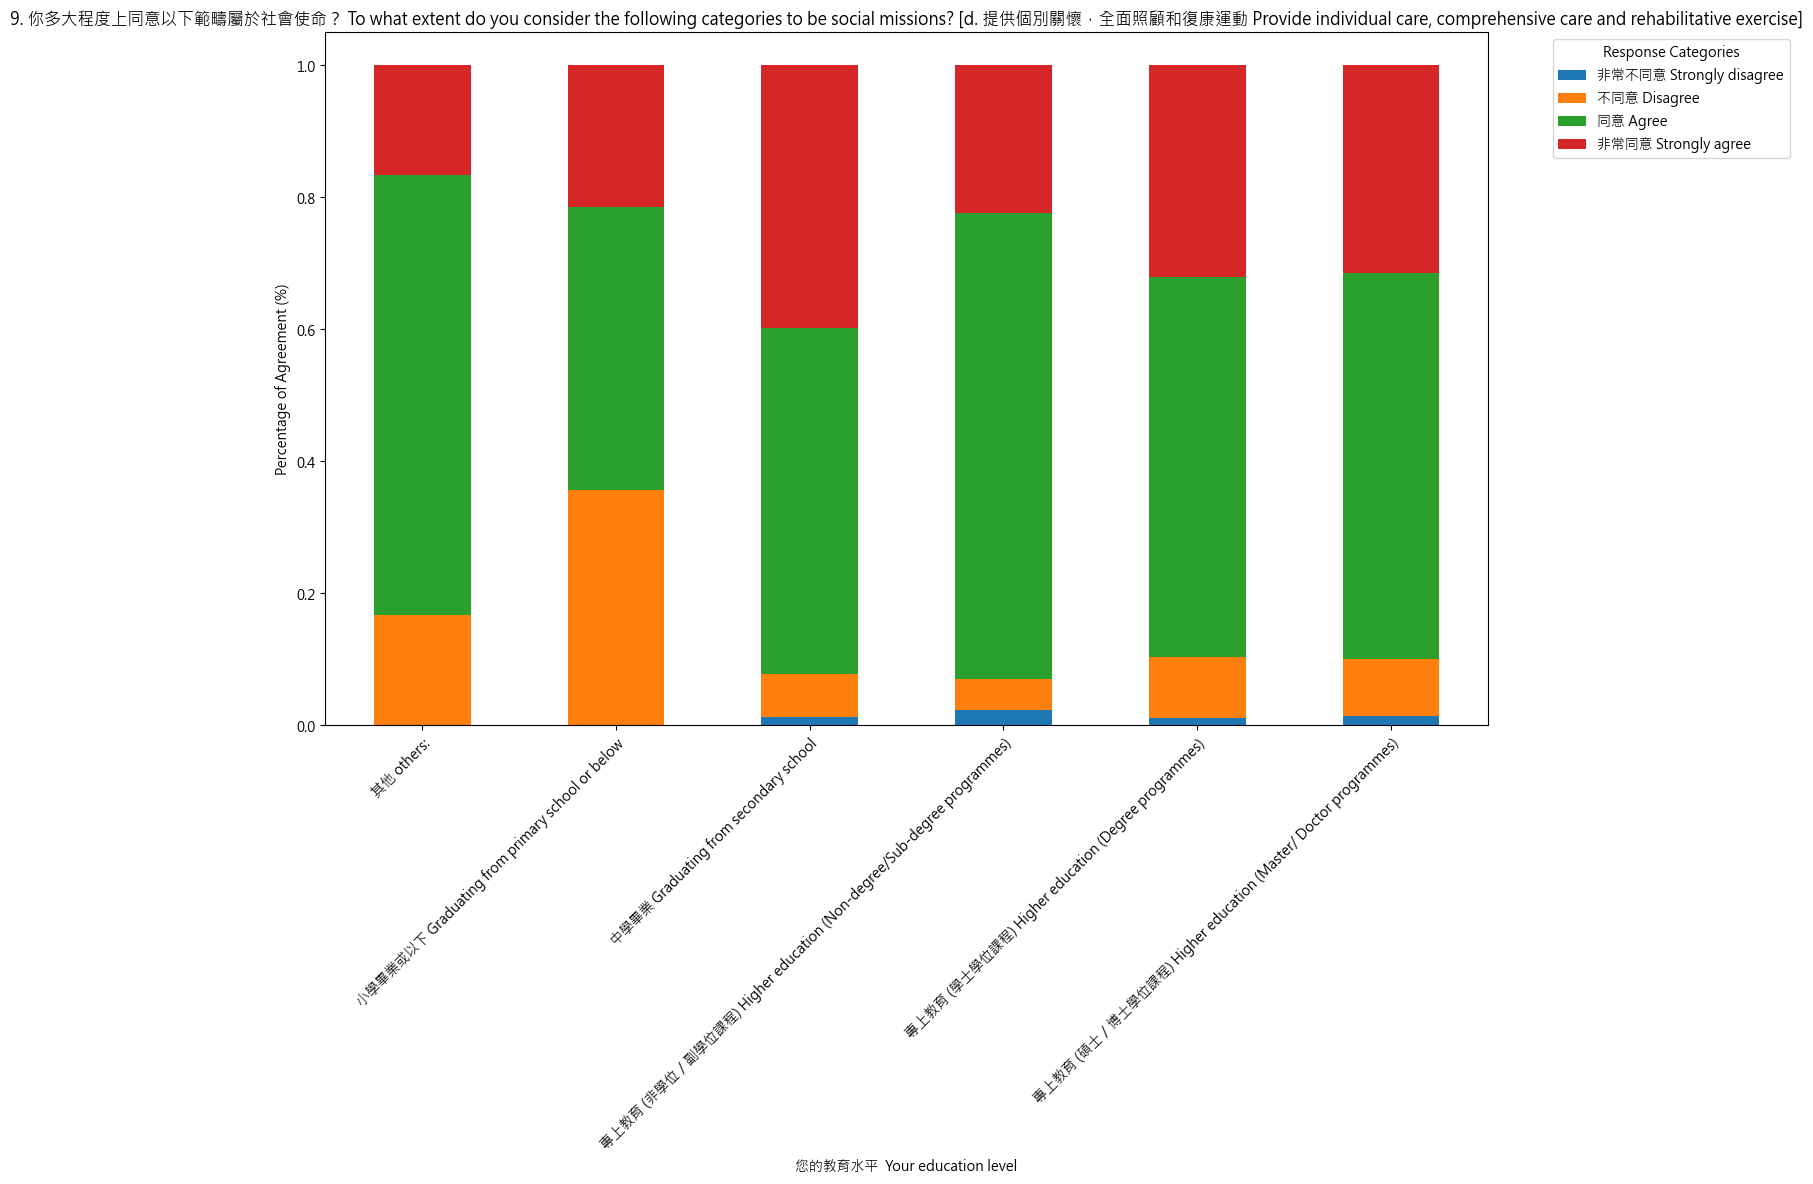

Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.


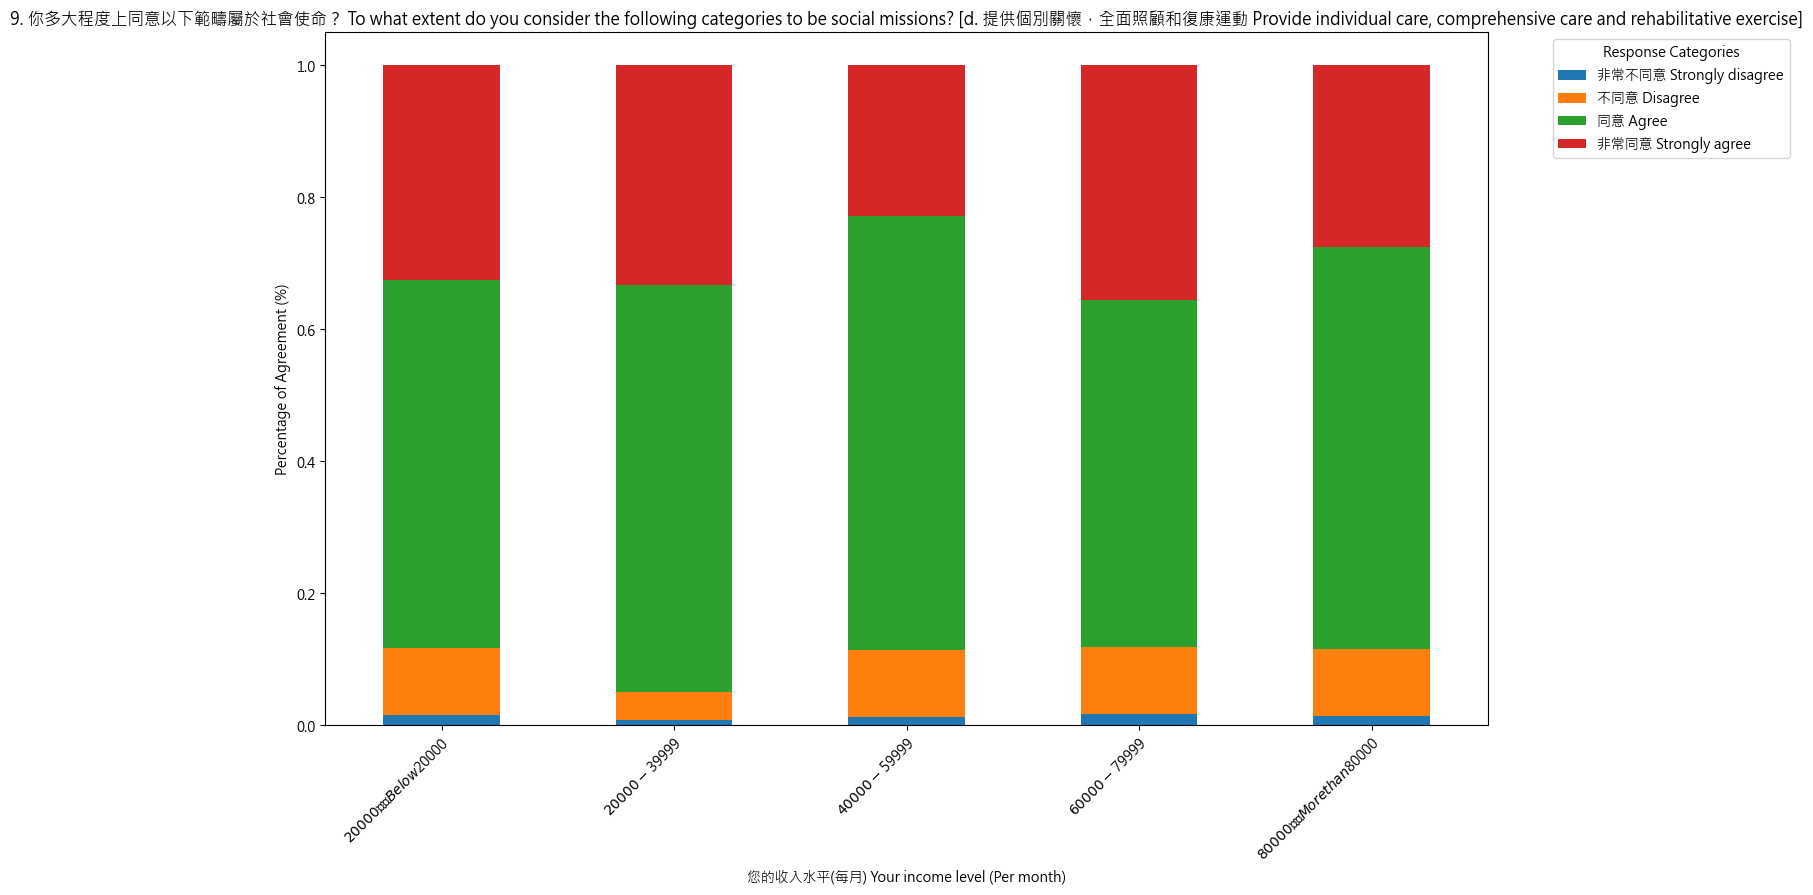

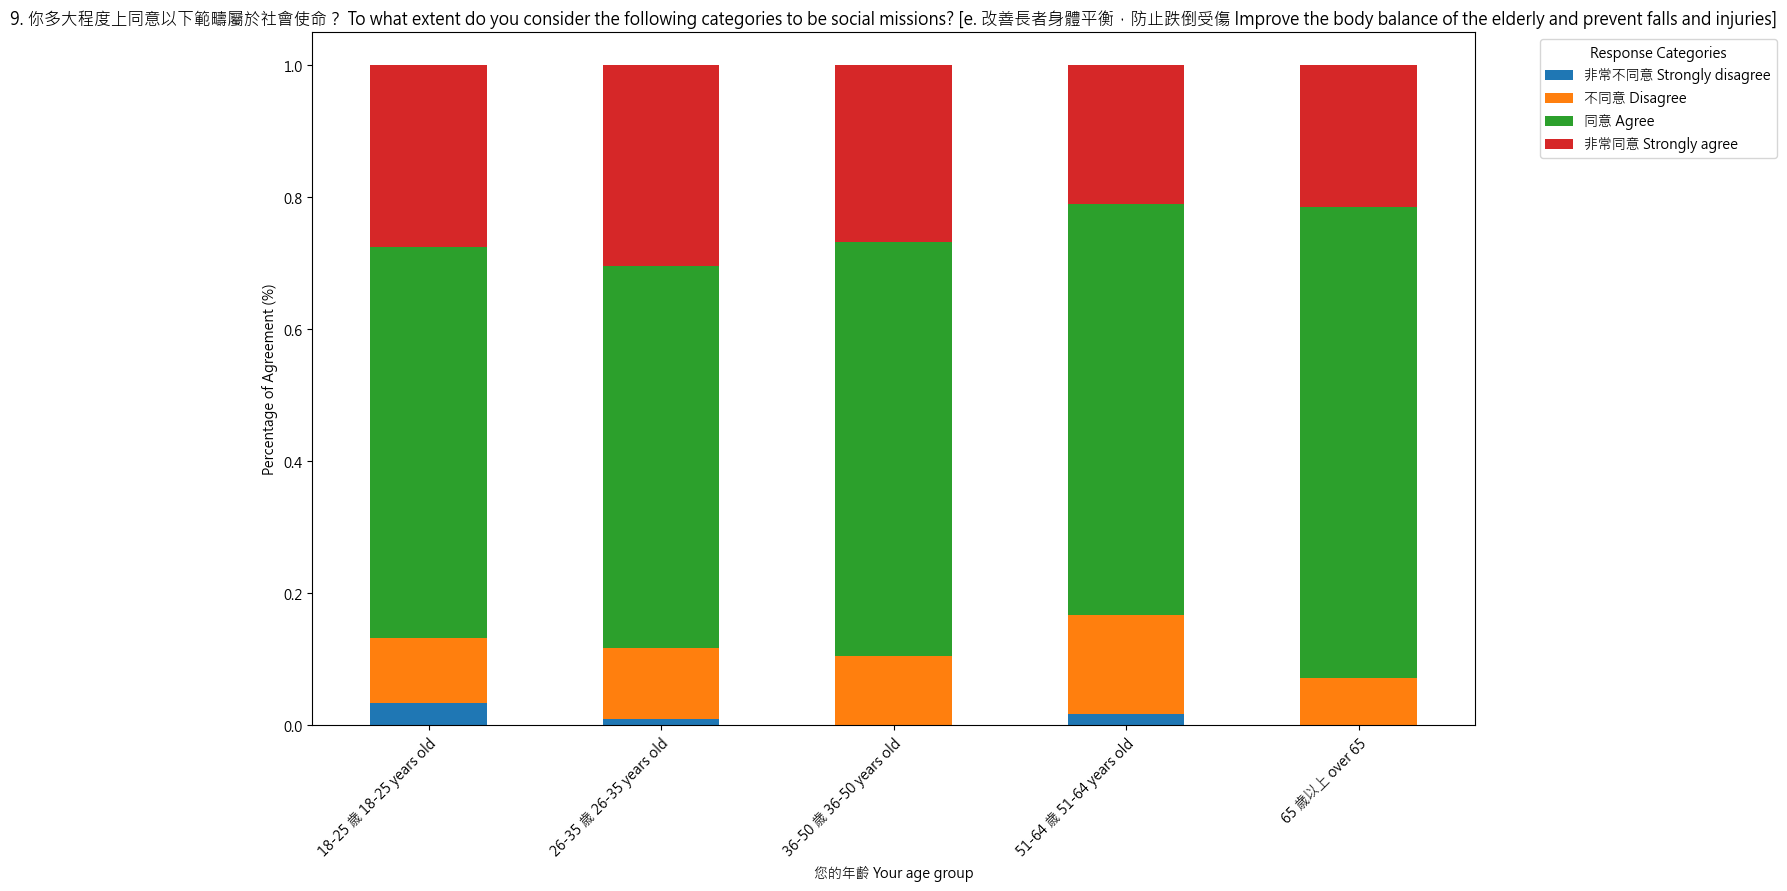

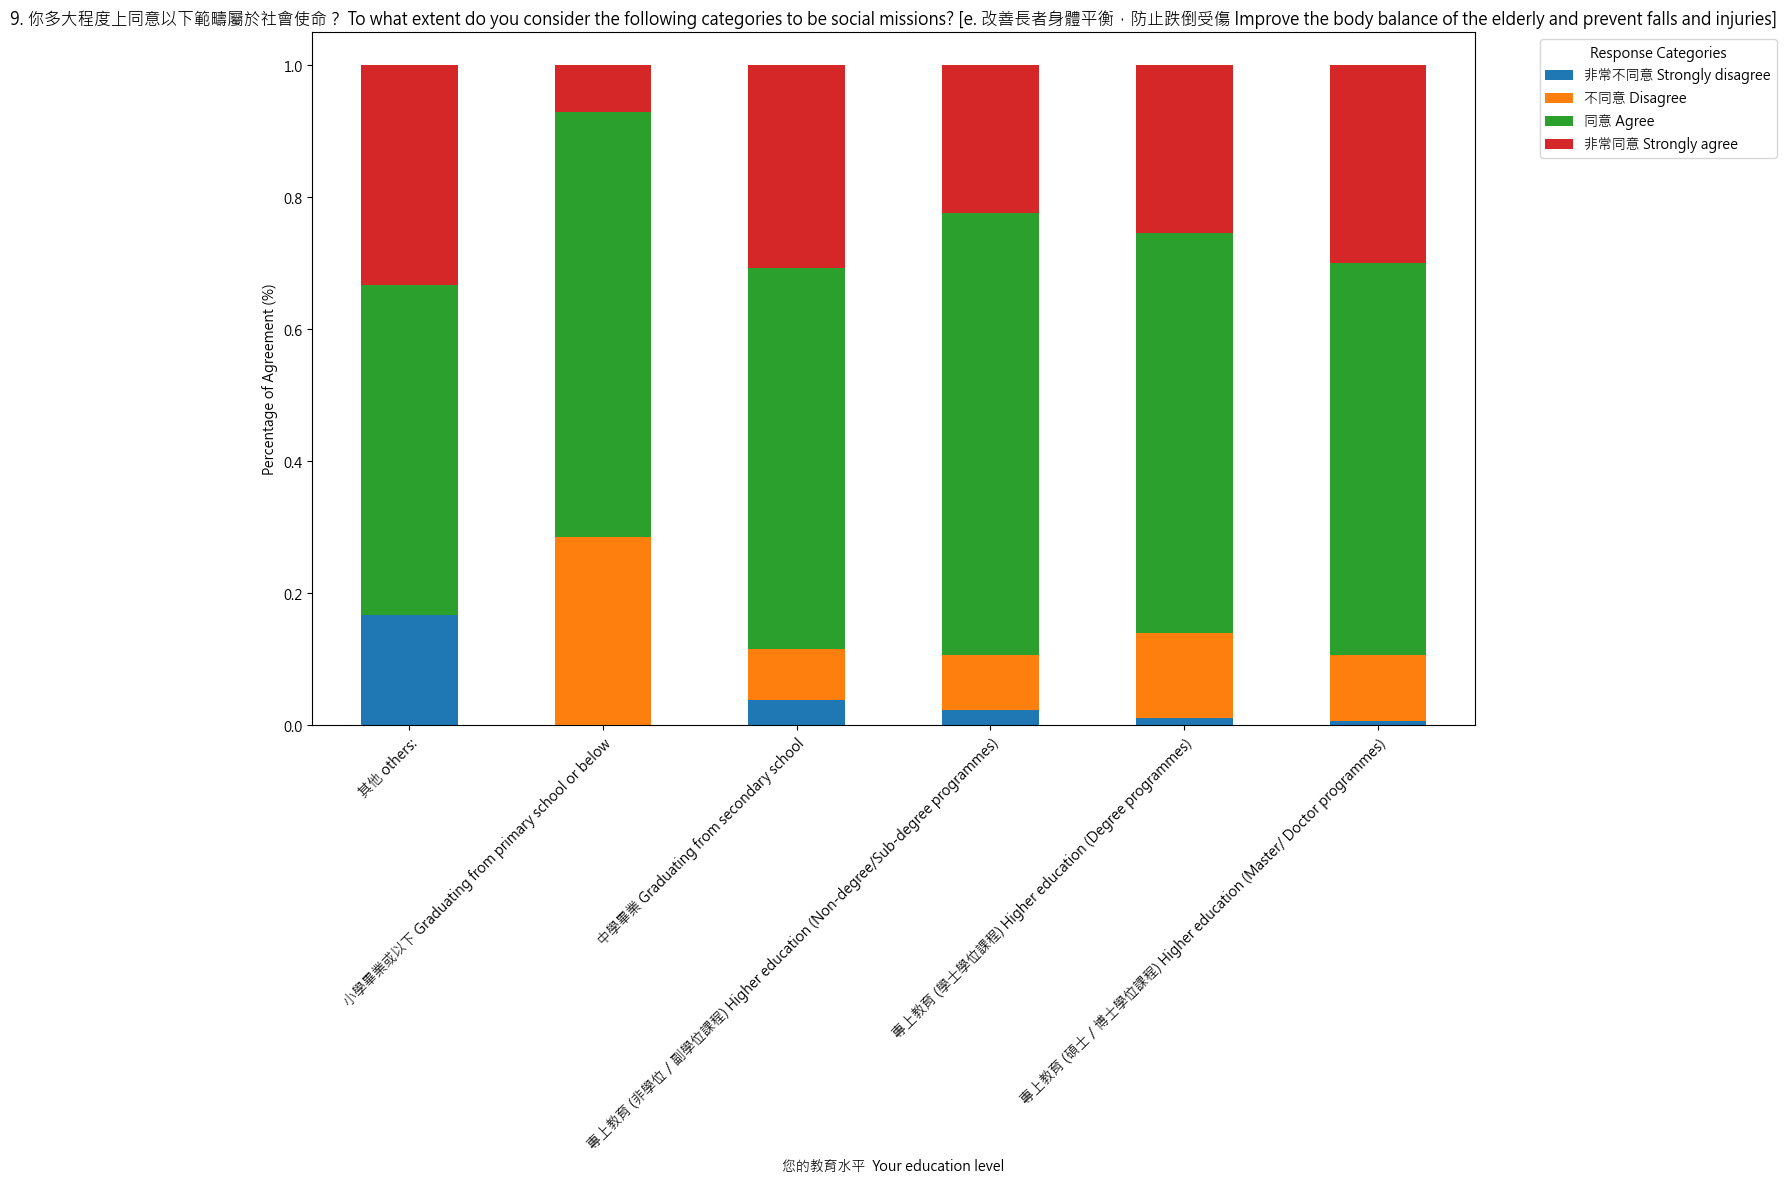

Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.


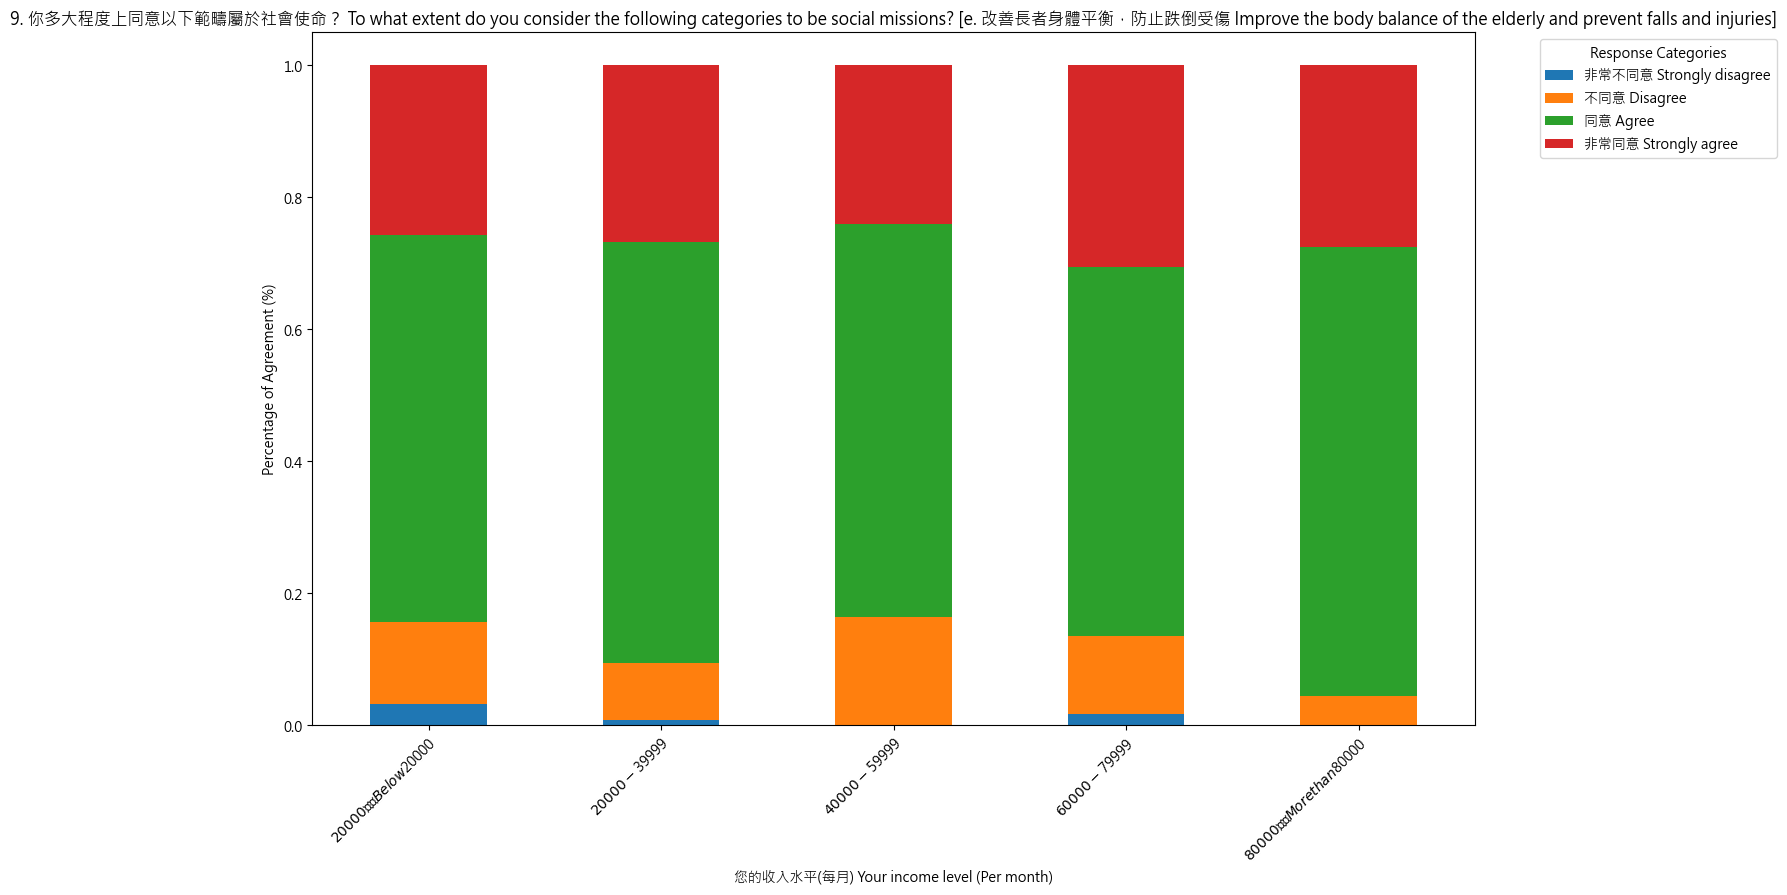

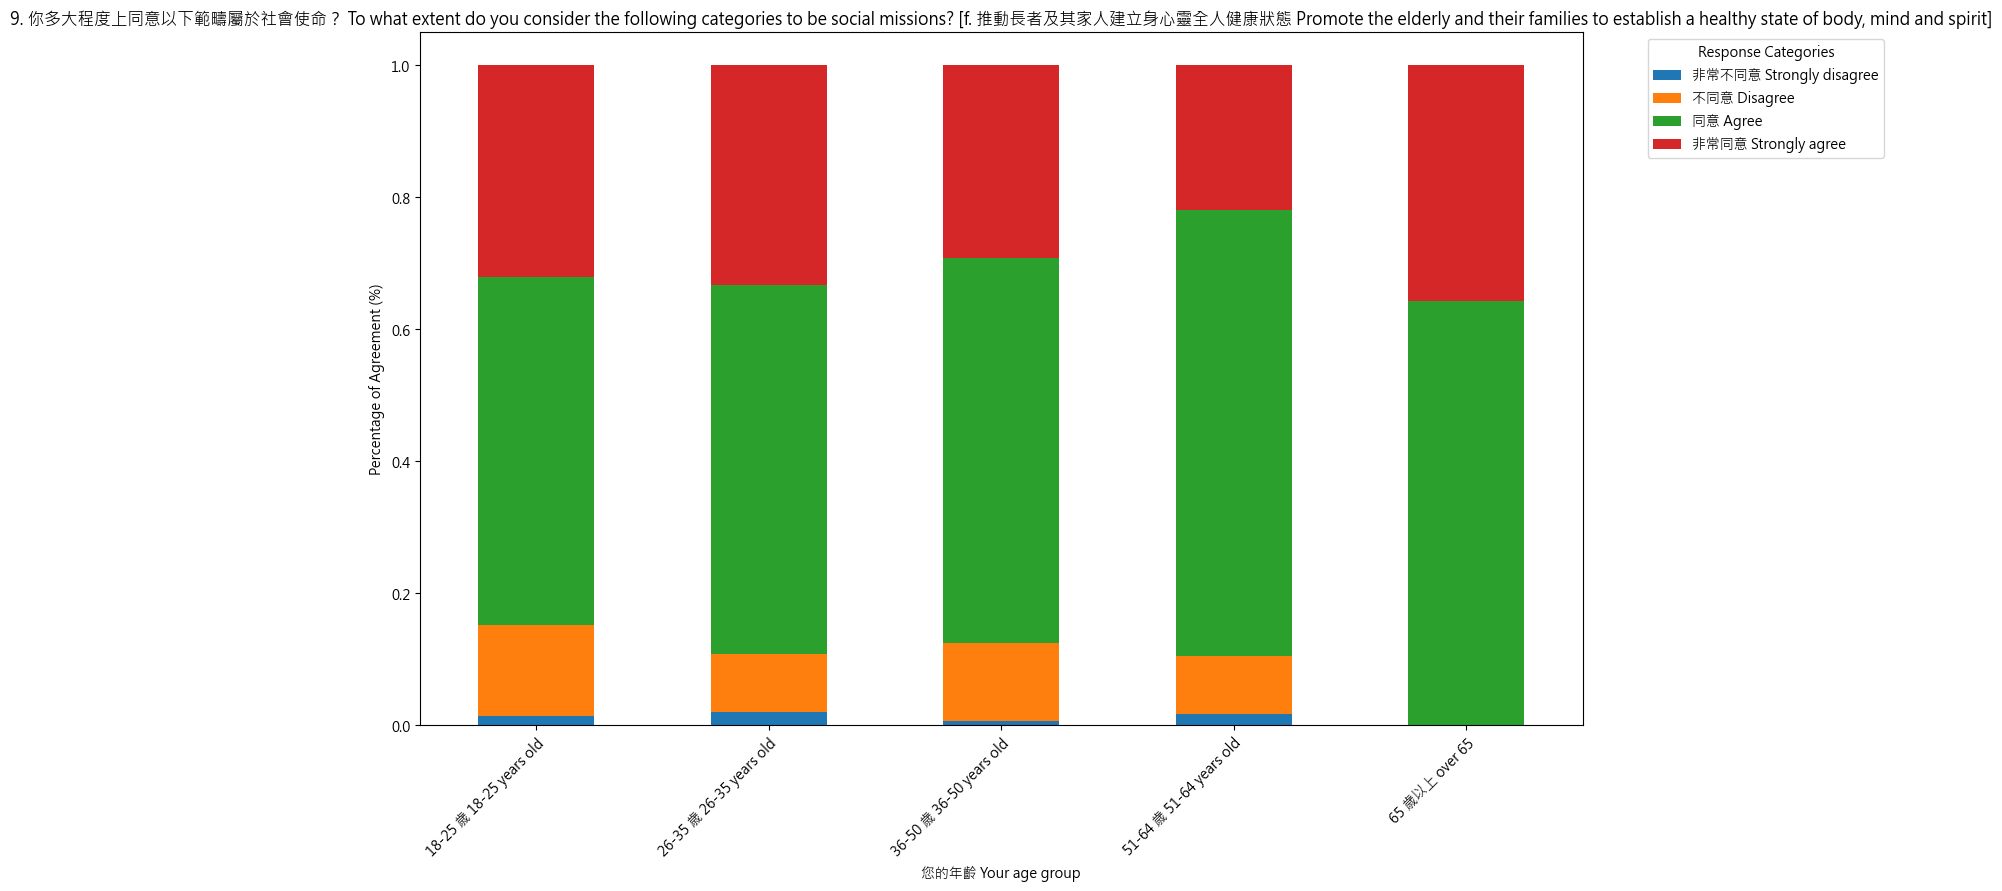

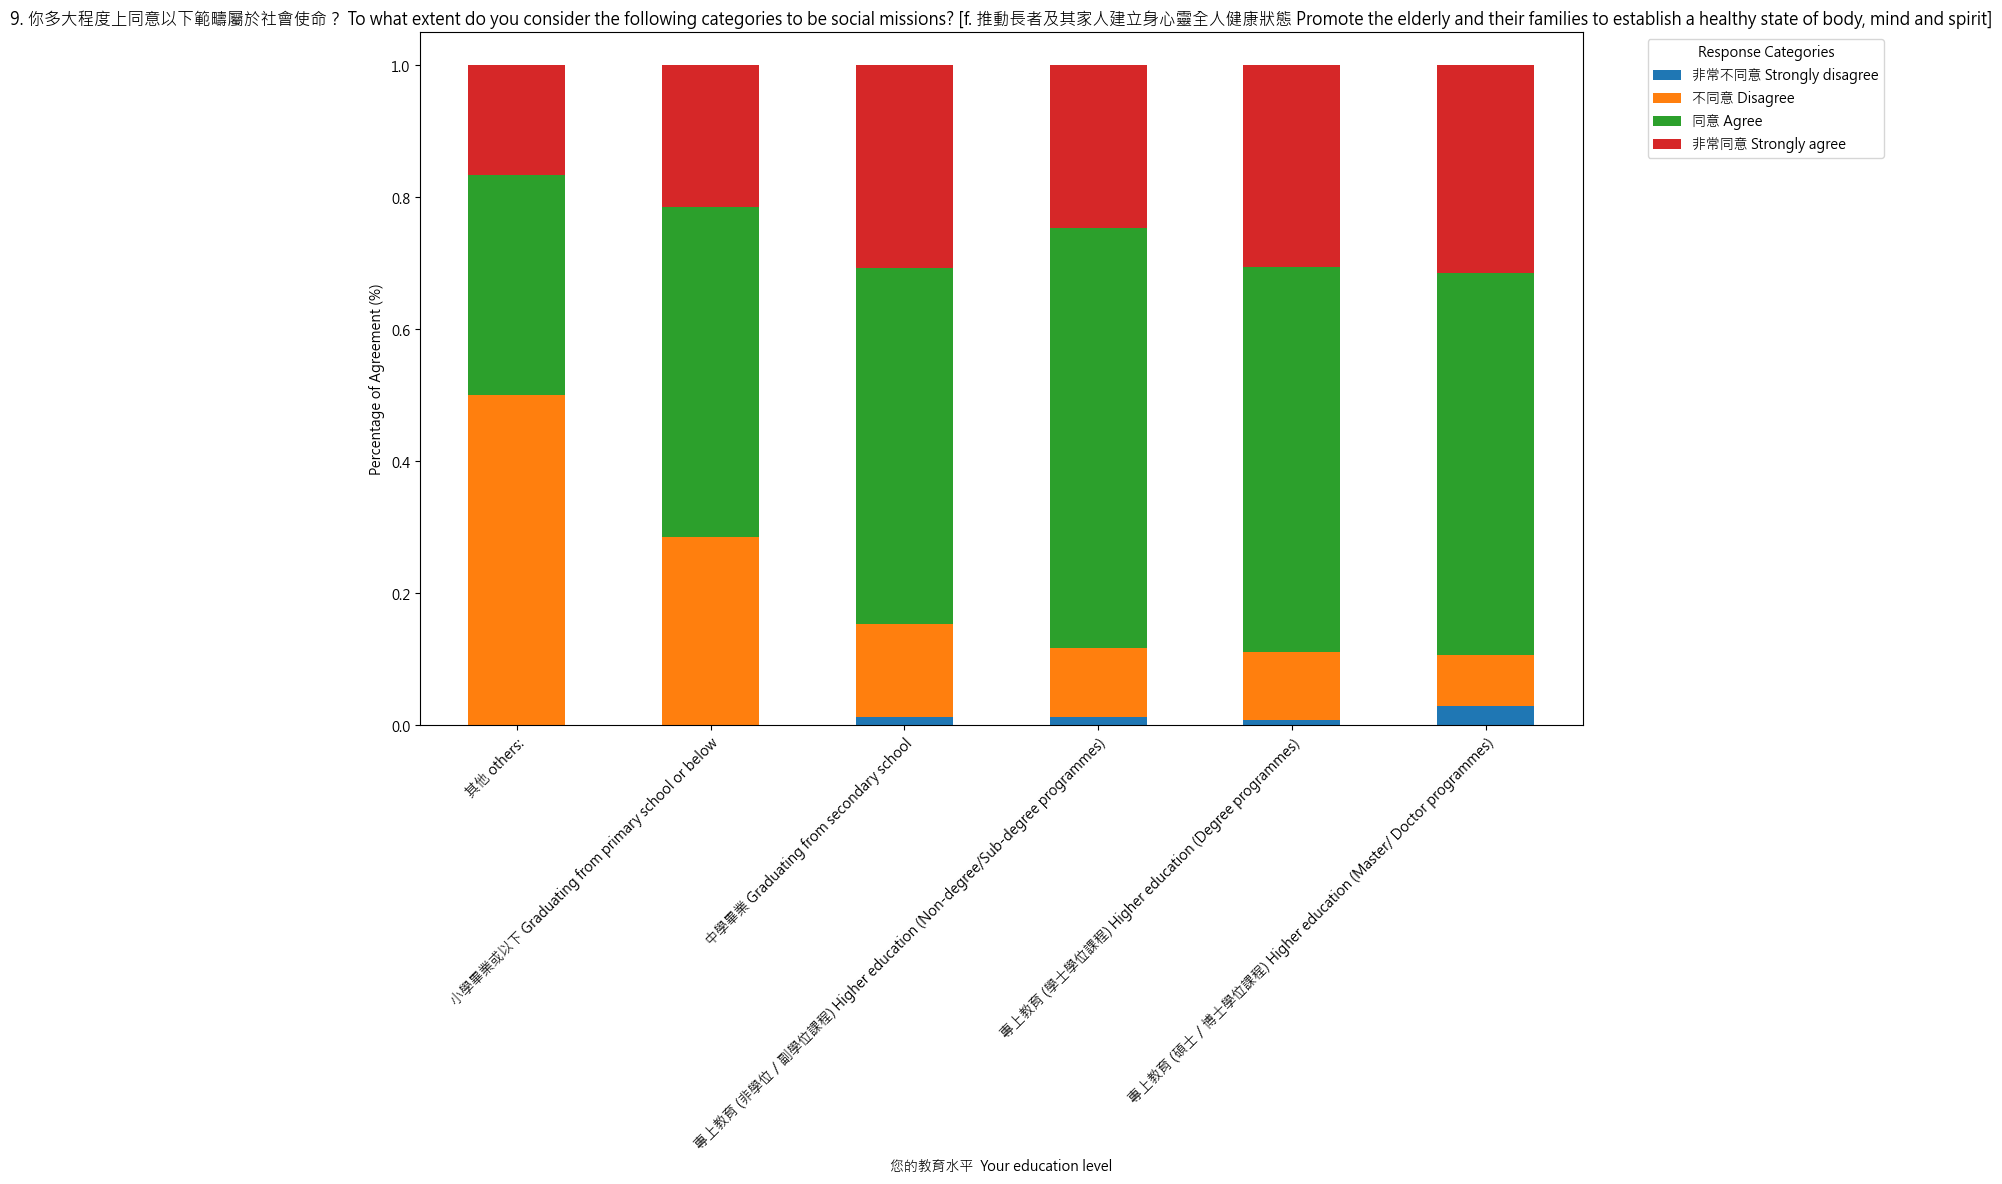

Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.


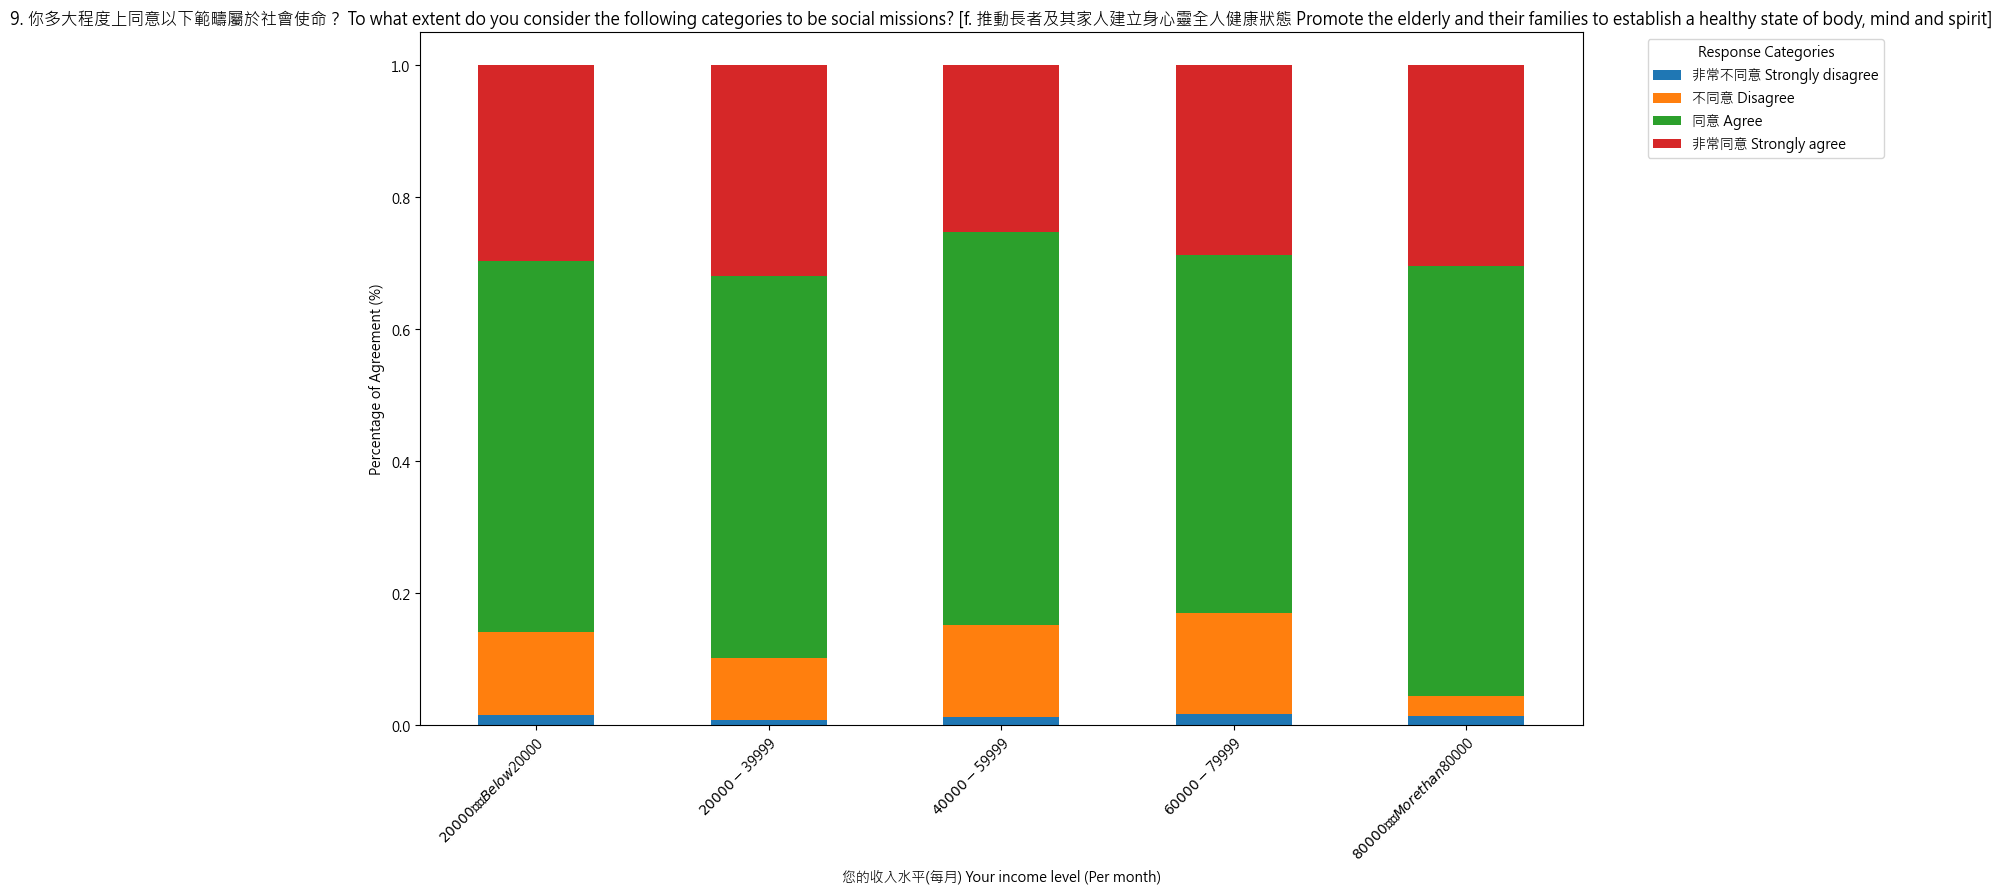

c:\Users\seacc\OneDrive\文件\gcse_001\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8203 (\N{ZERO WIDTH SPACE}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


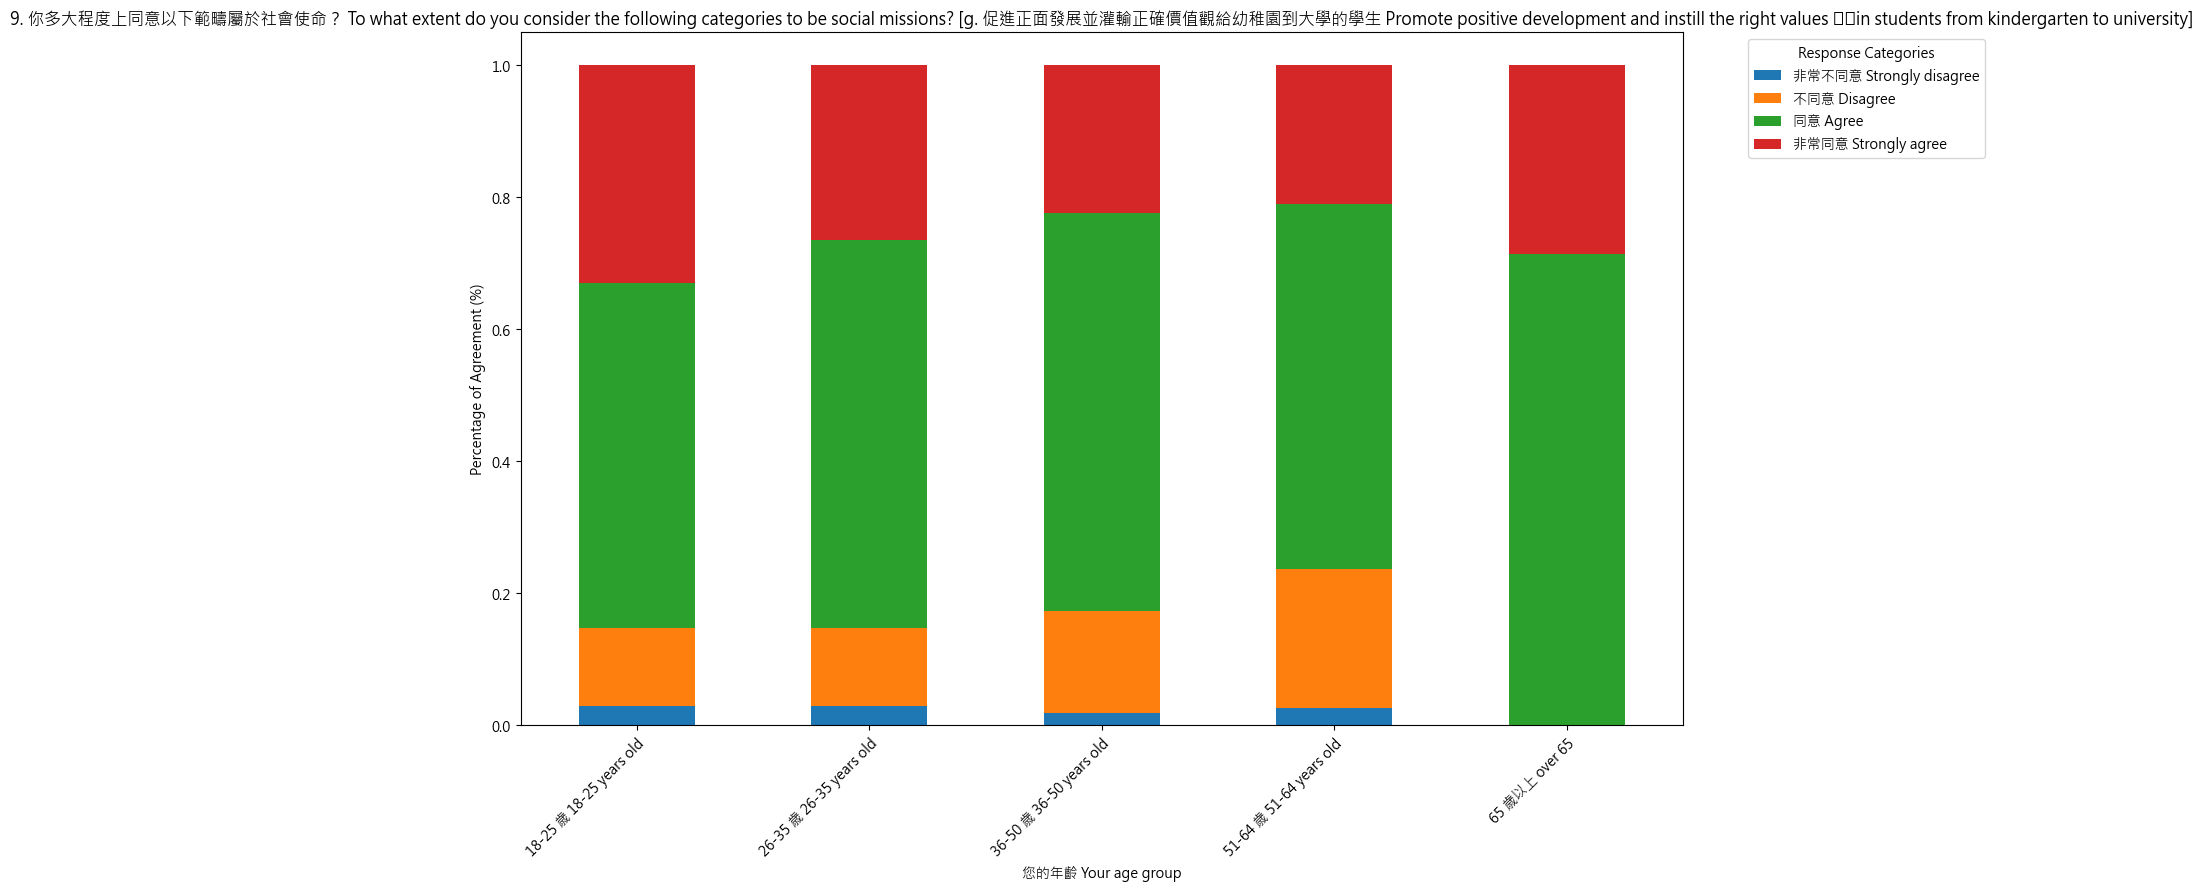

c:\Users\seacc\OneDrive\文件\gcse_001\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8203 (\N{ZERO WIDTH SPACE}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


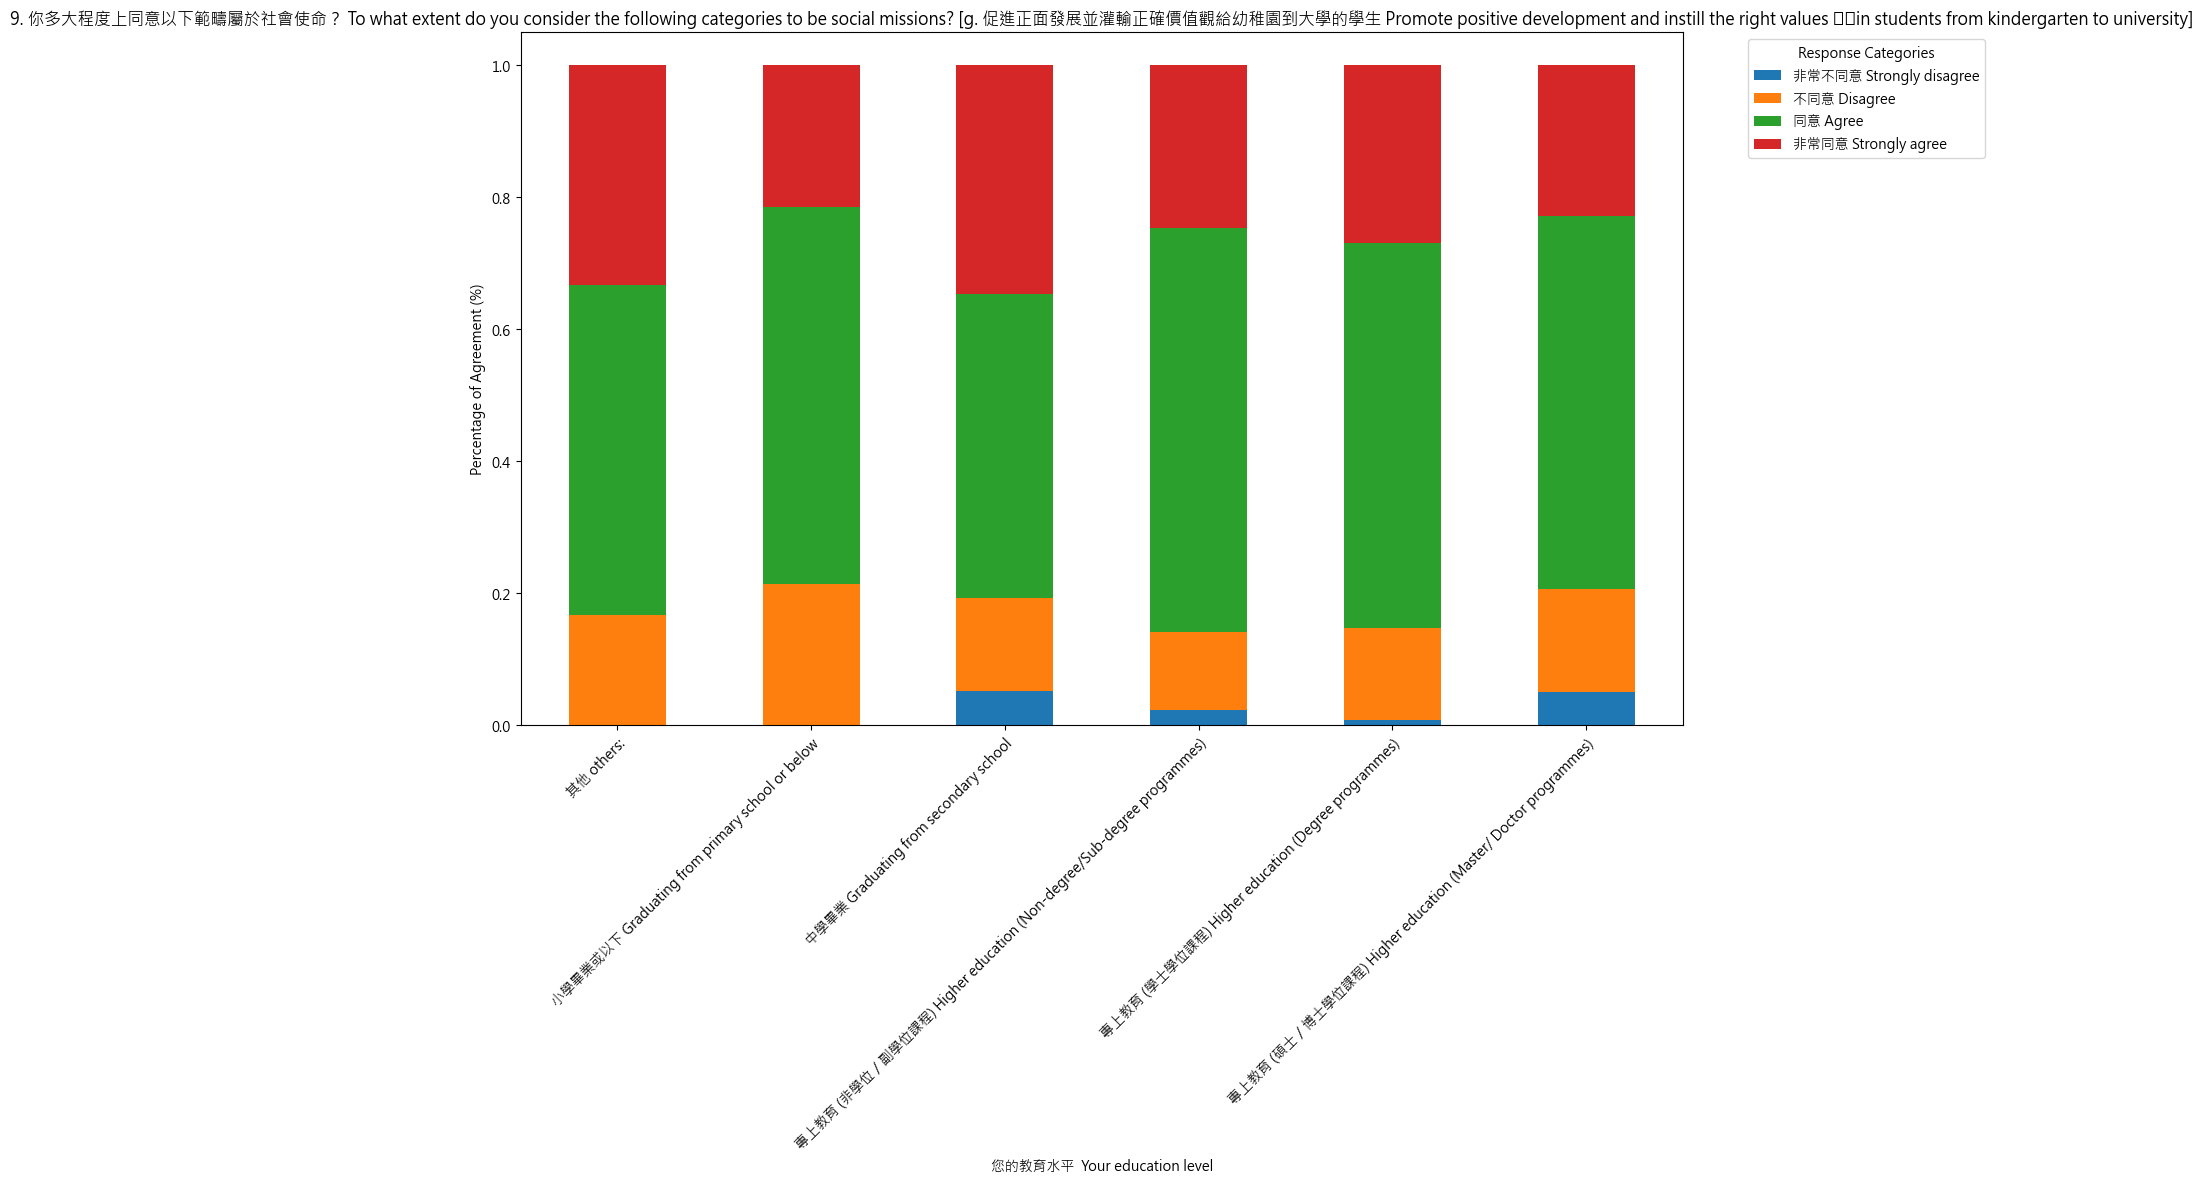

c:\Users\seacc\OneDrive\文件\gcse_001\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8203 (\N{ZERO WIDTH SPACE}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.


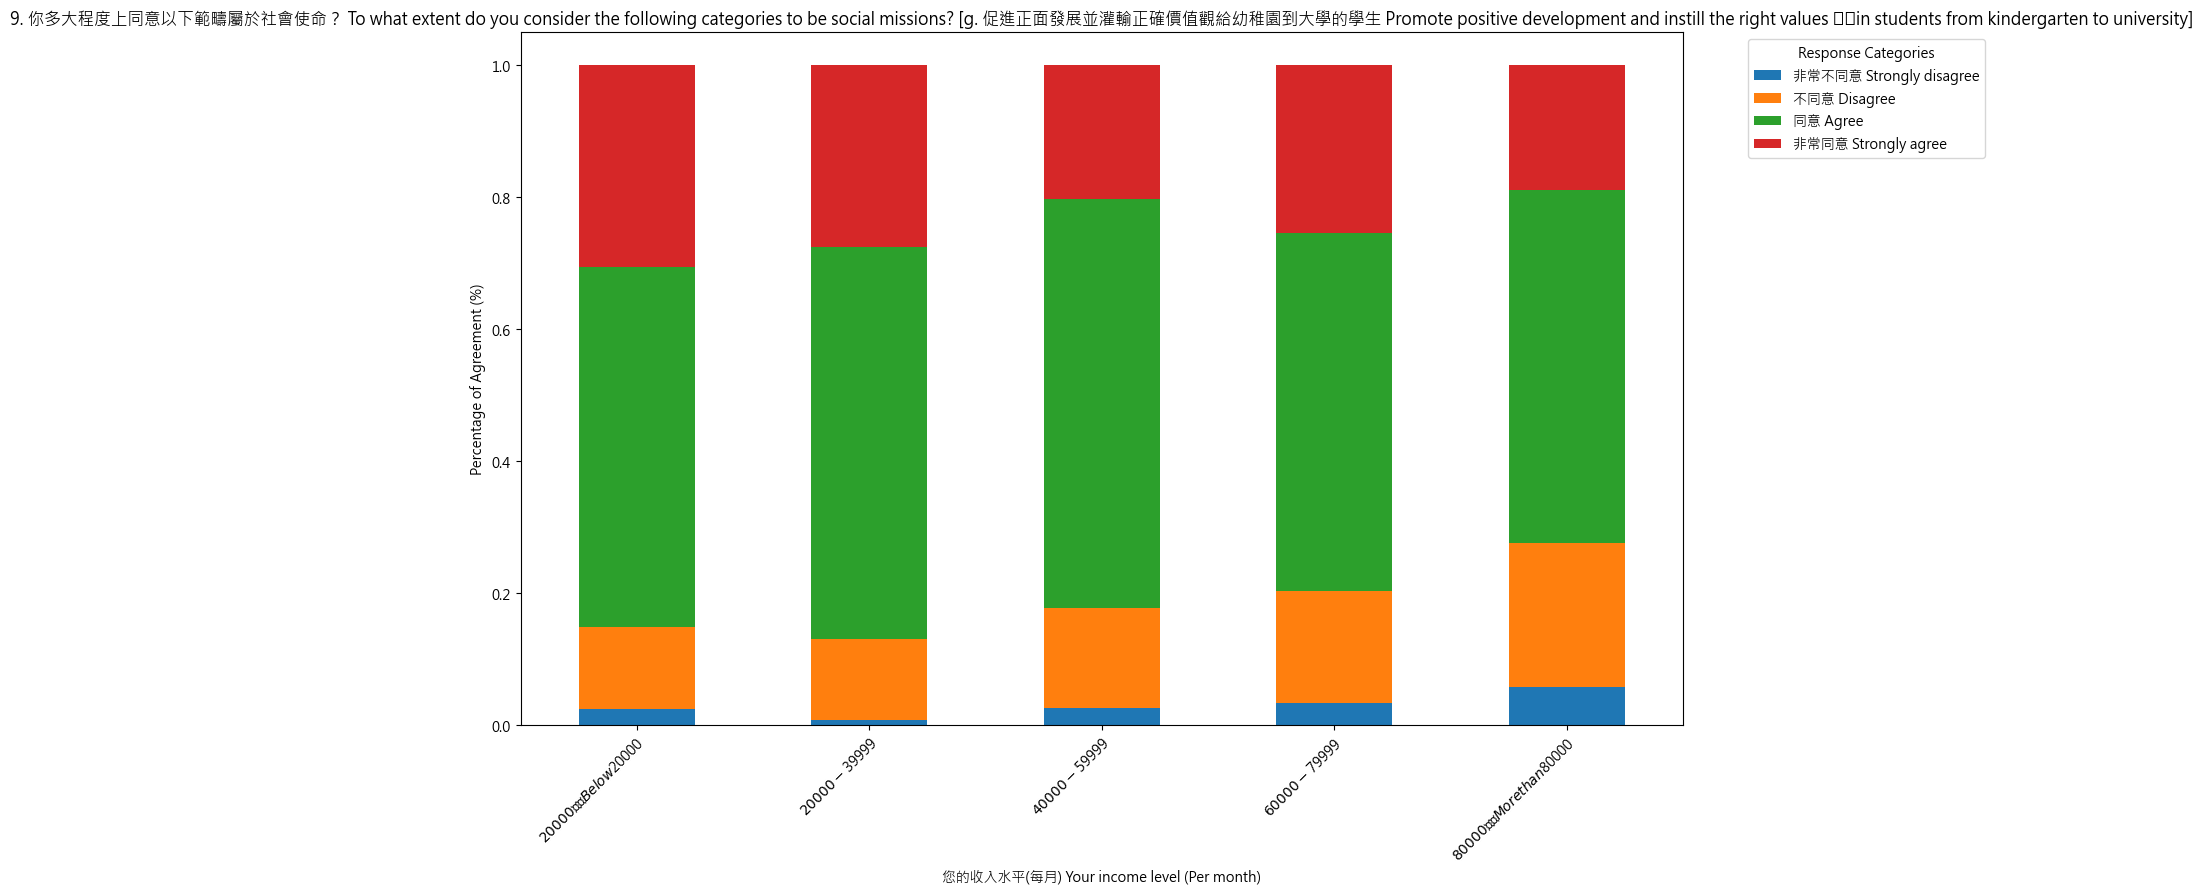

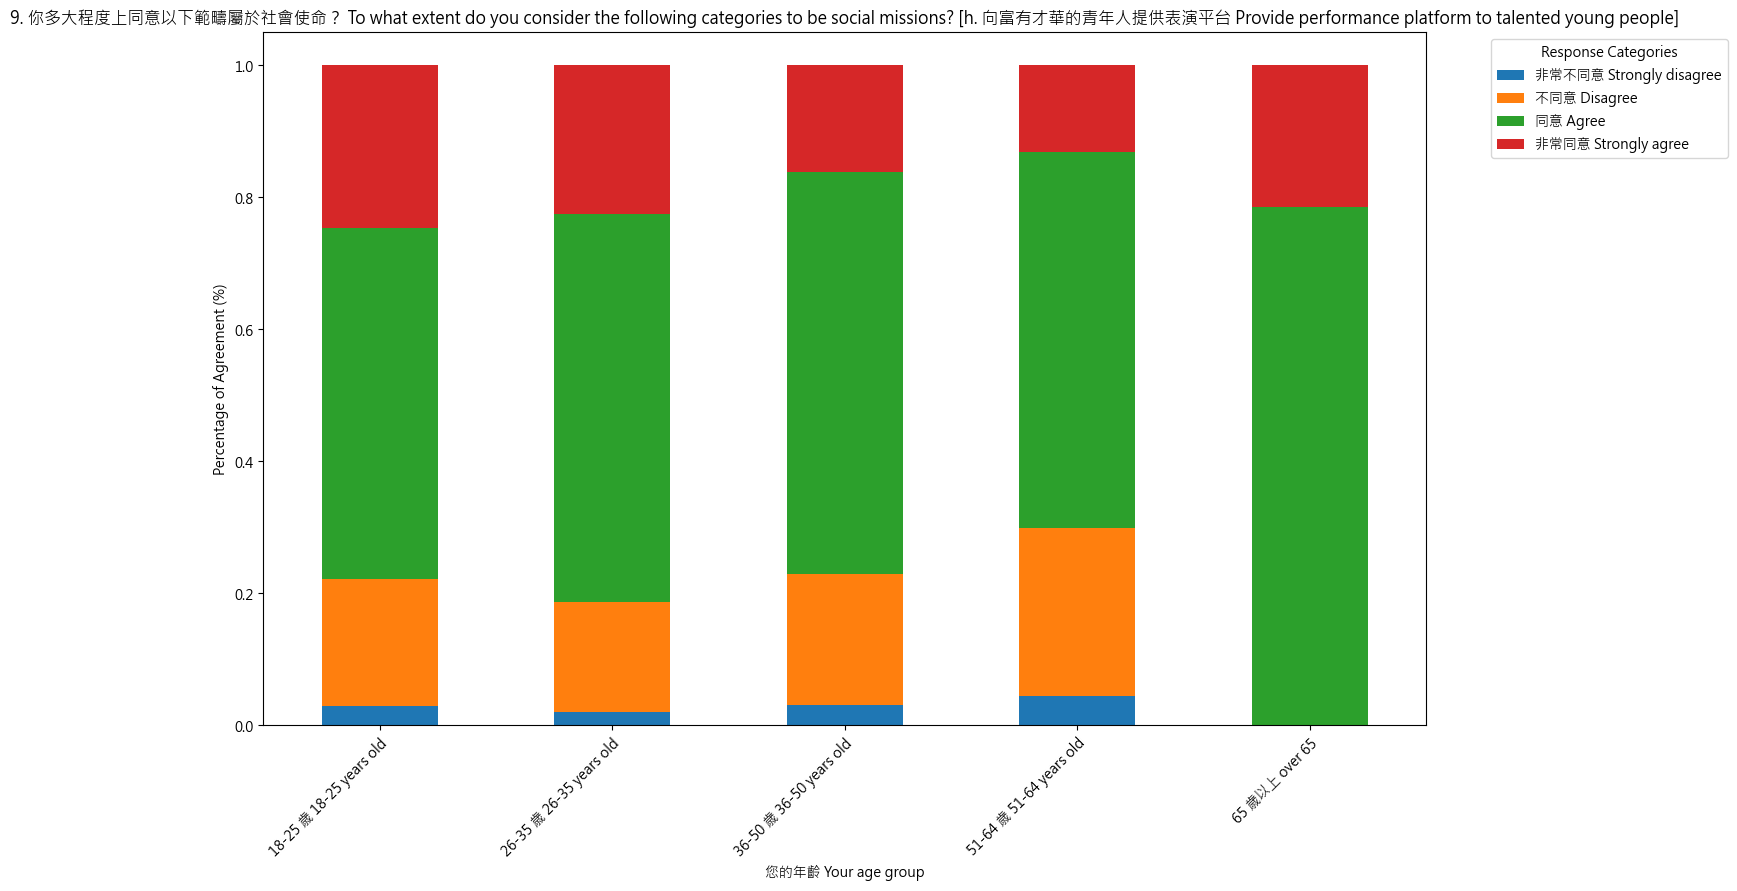

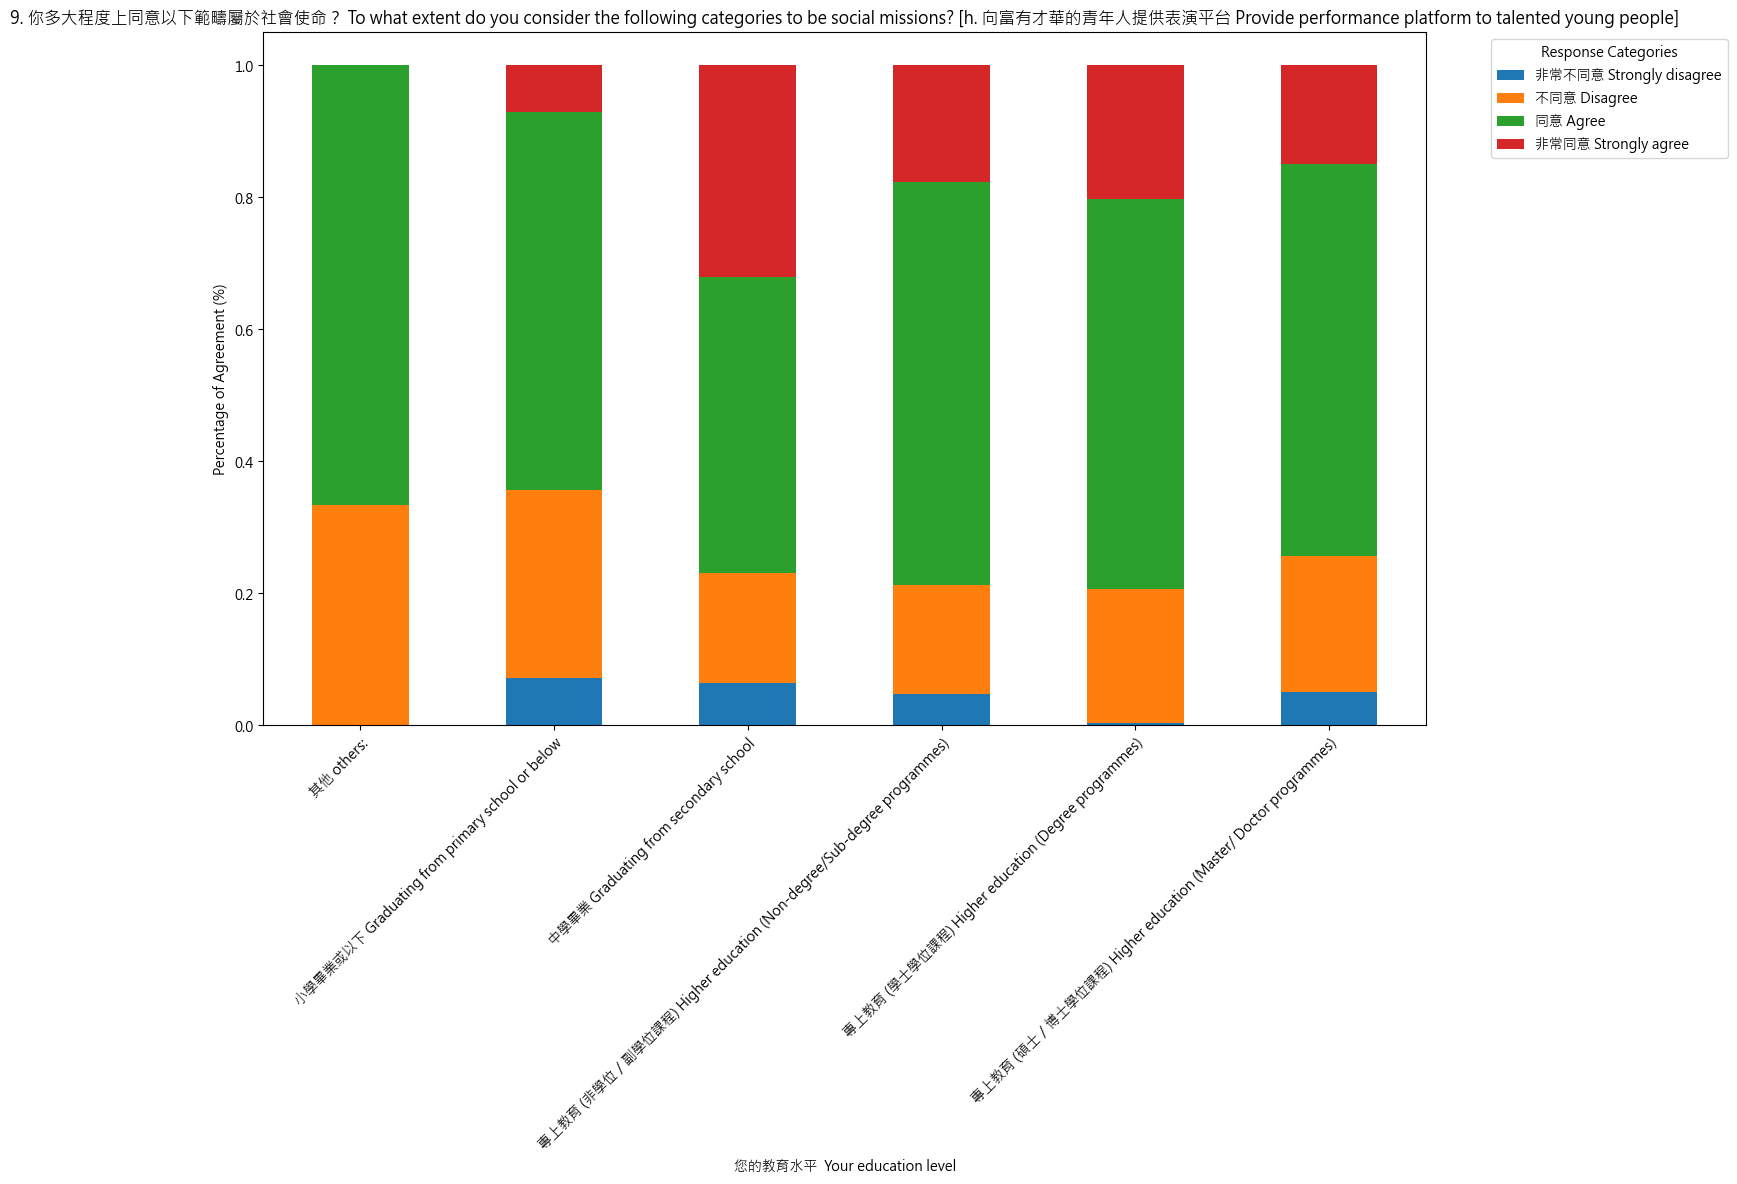

Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.


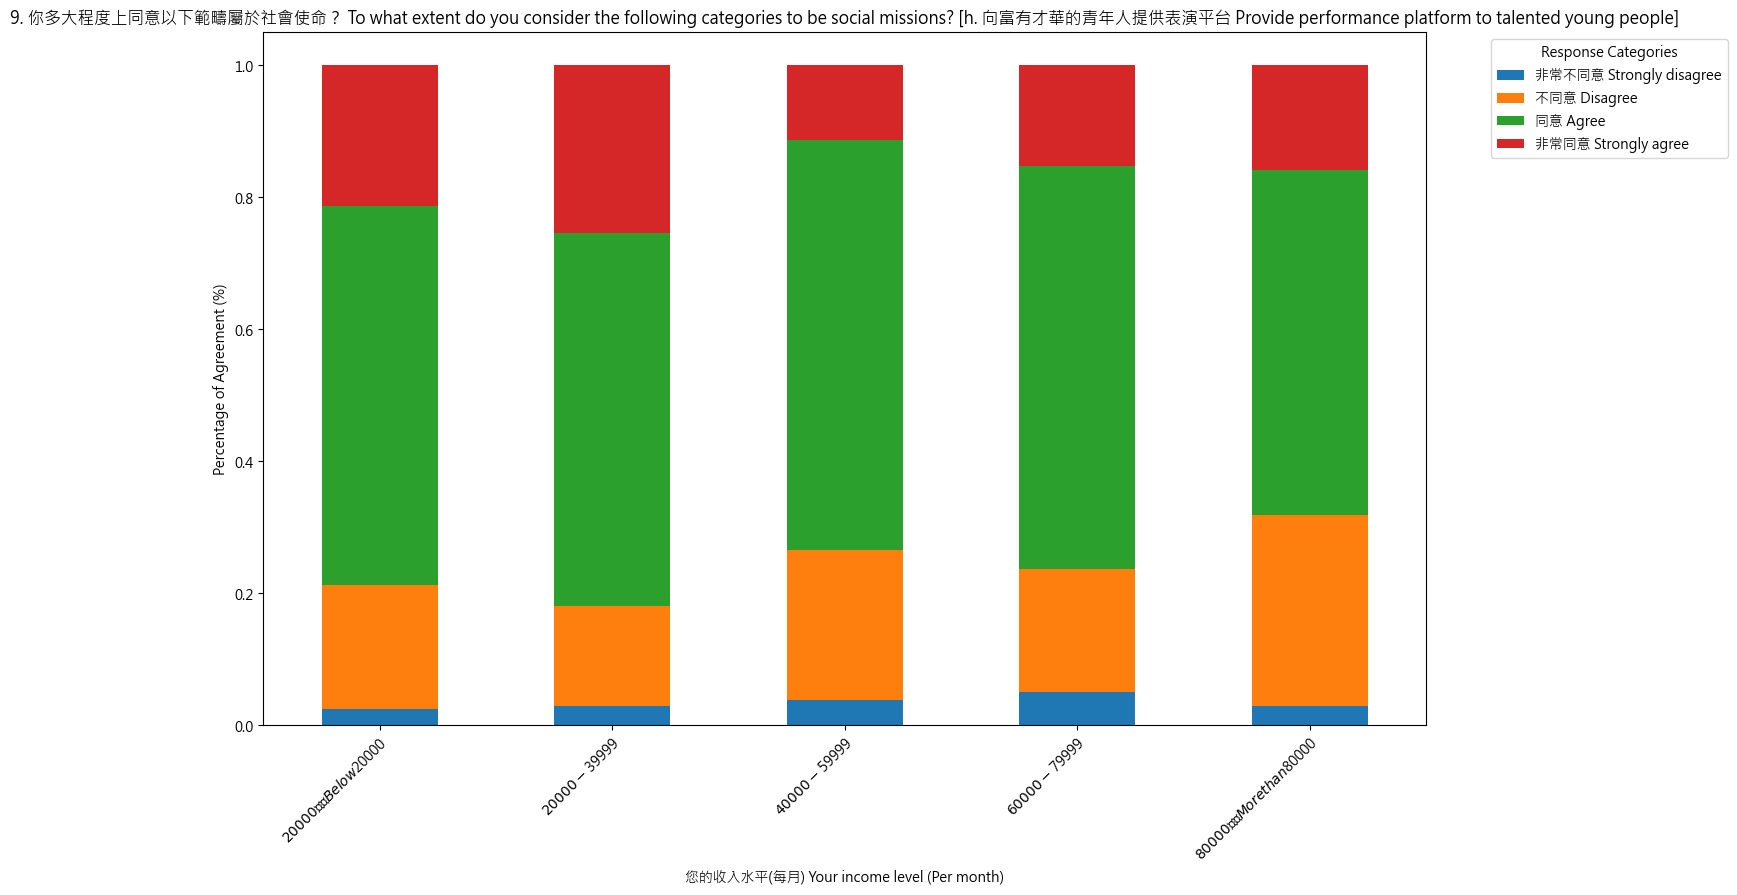

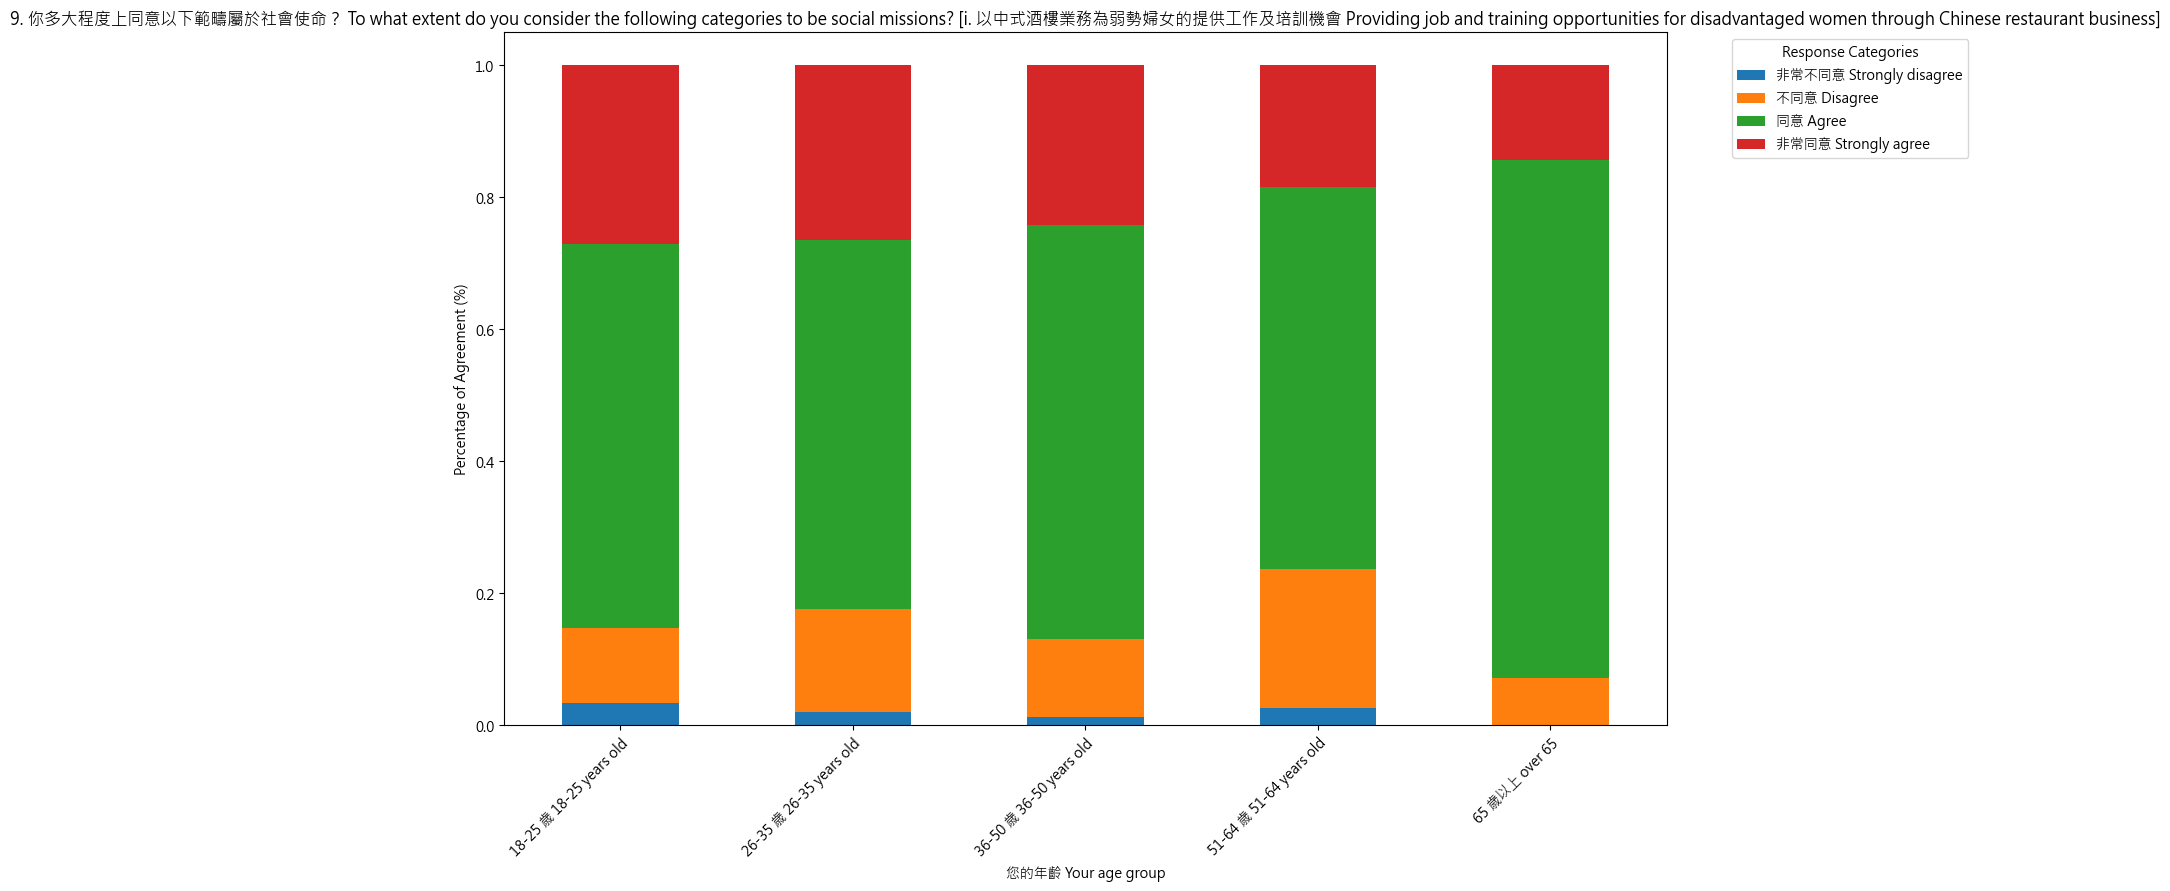

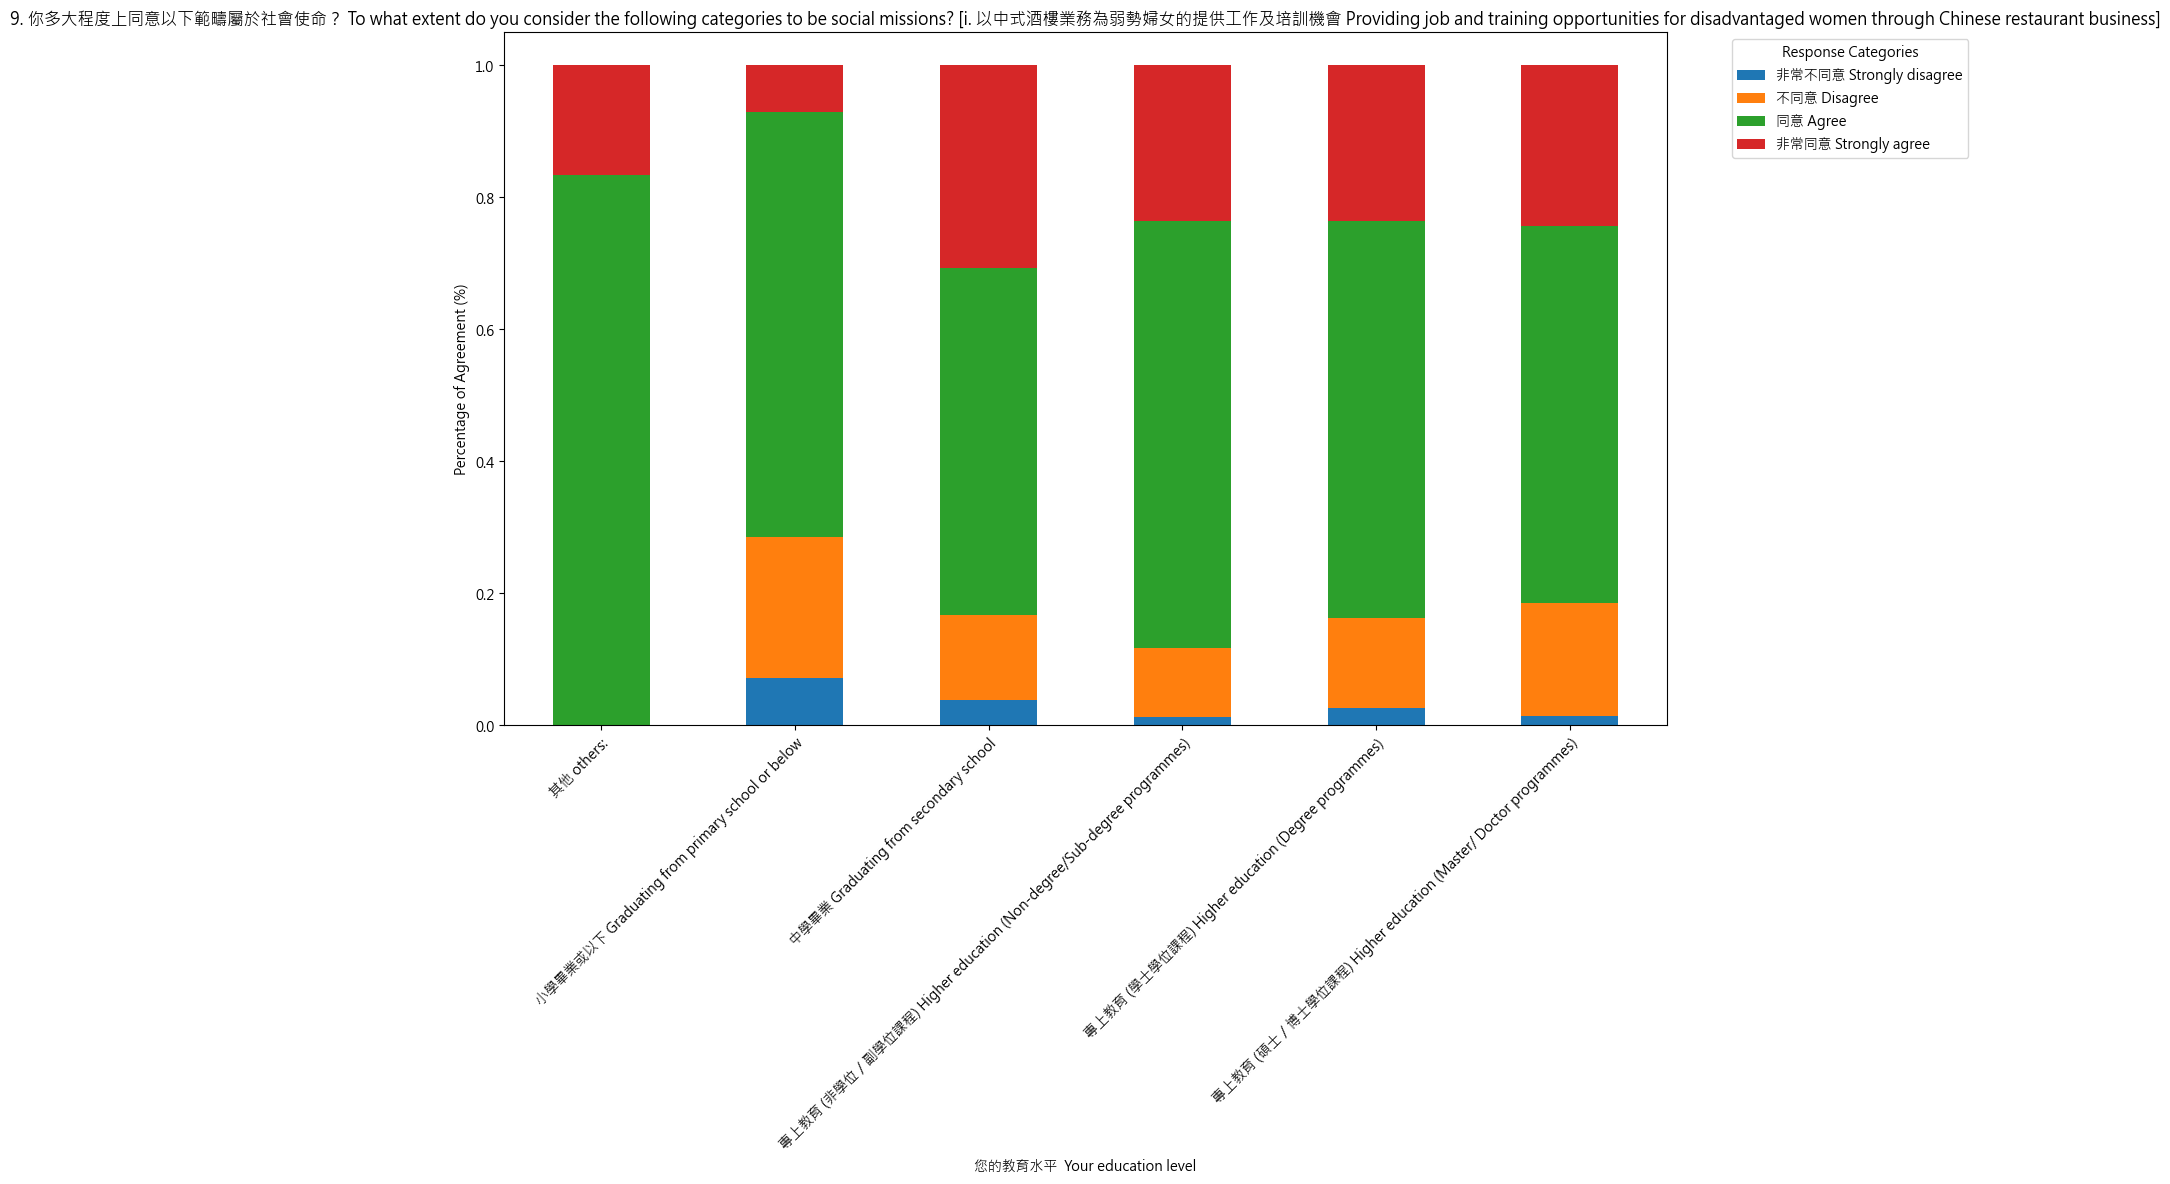

Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.


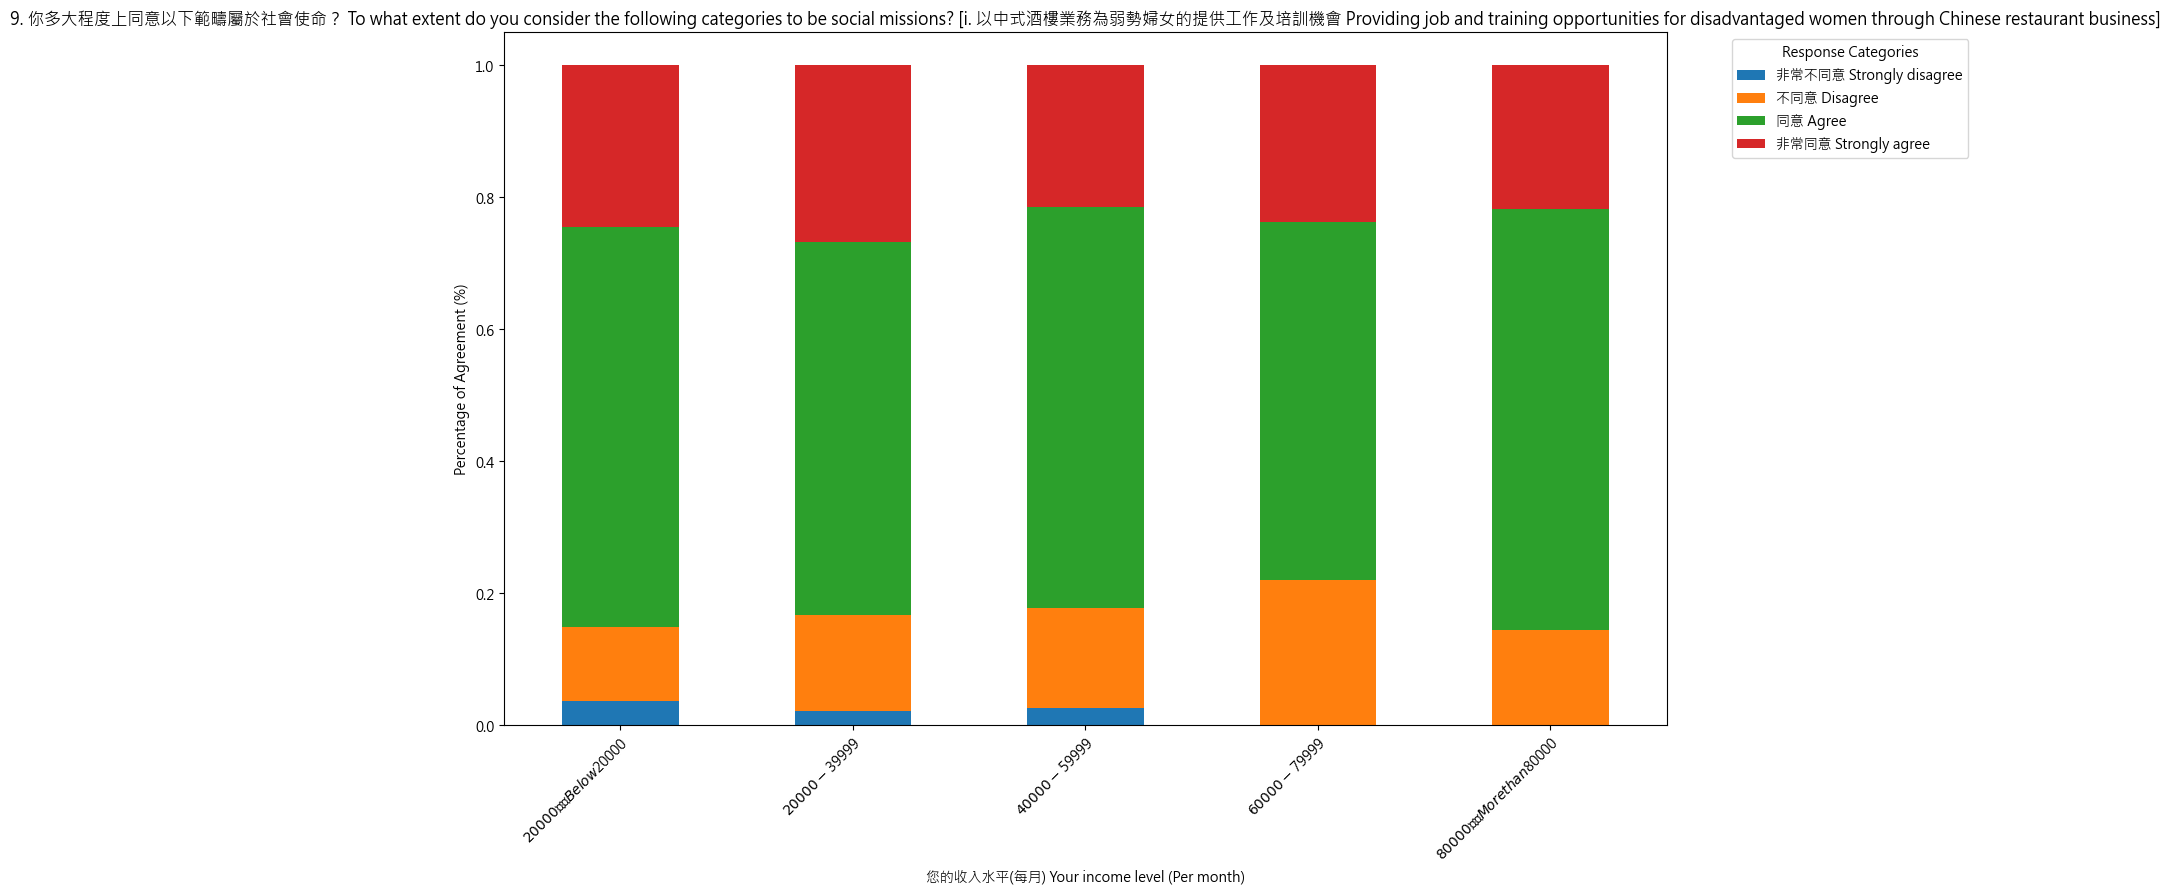

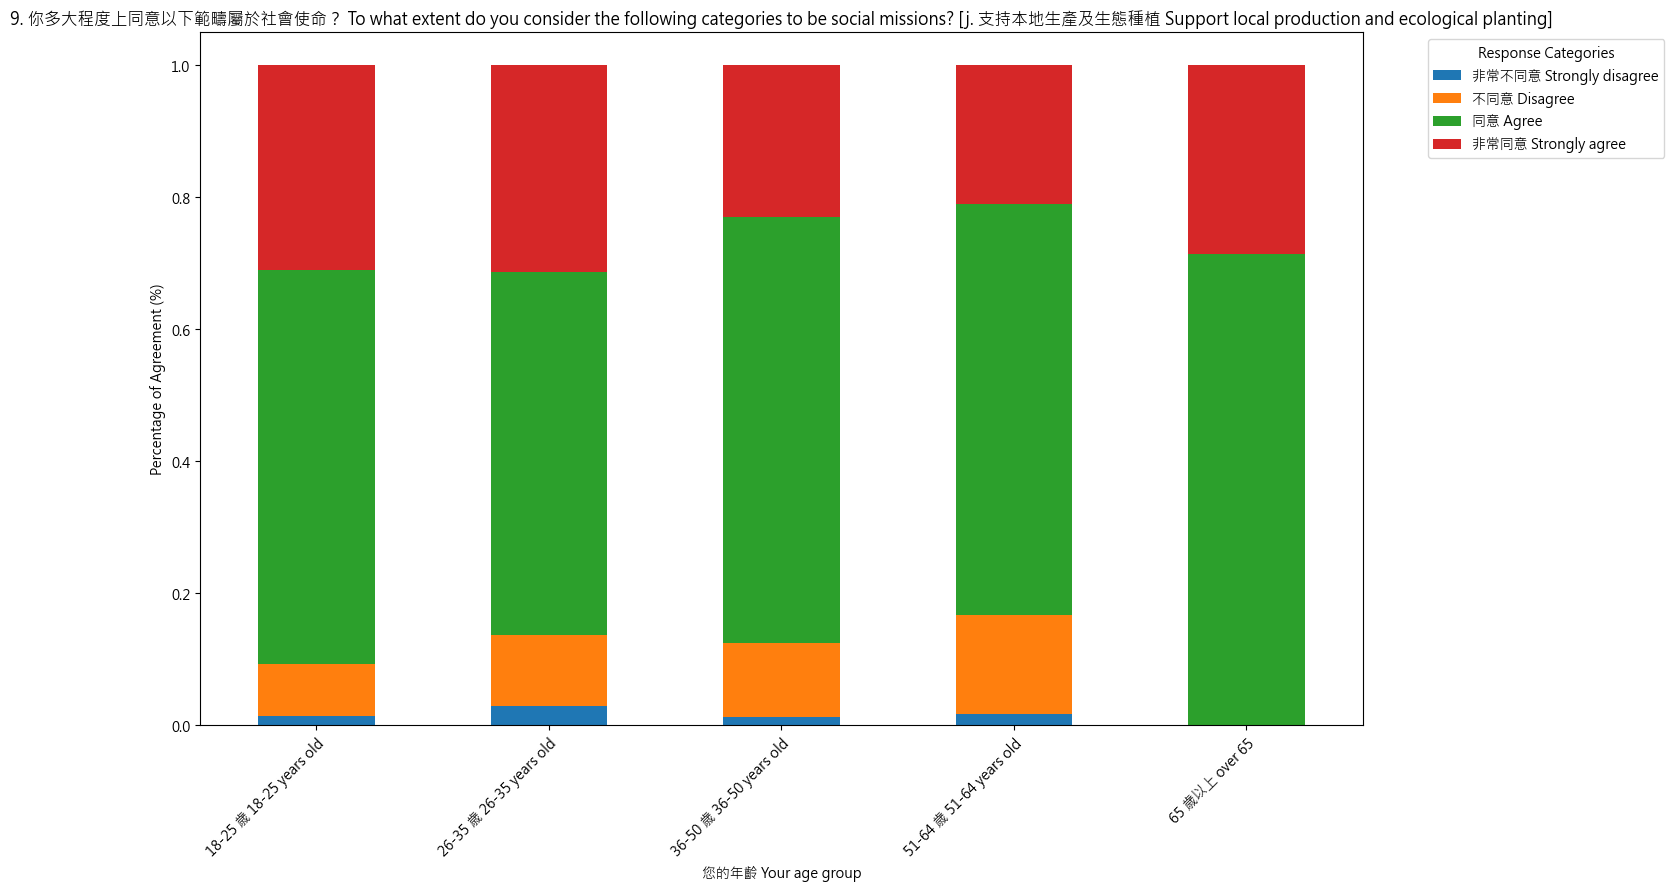

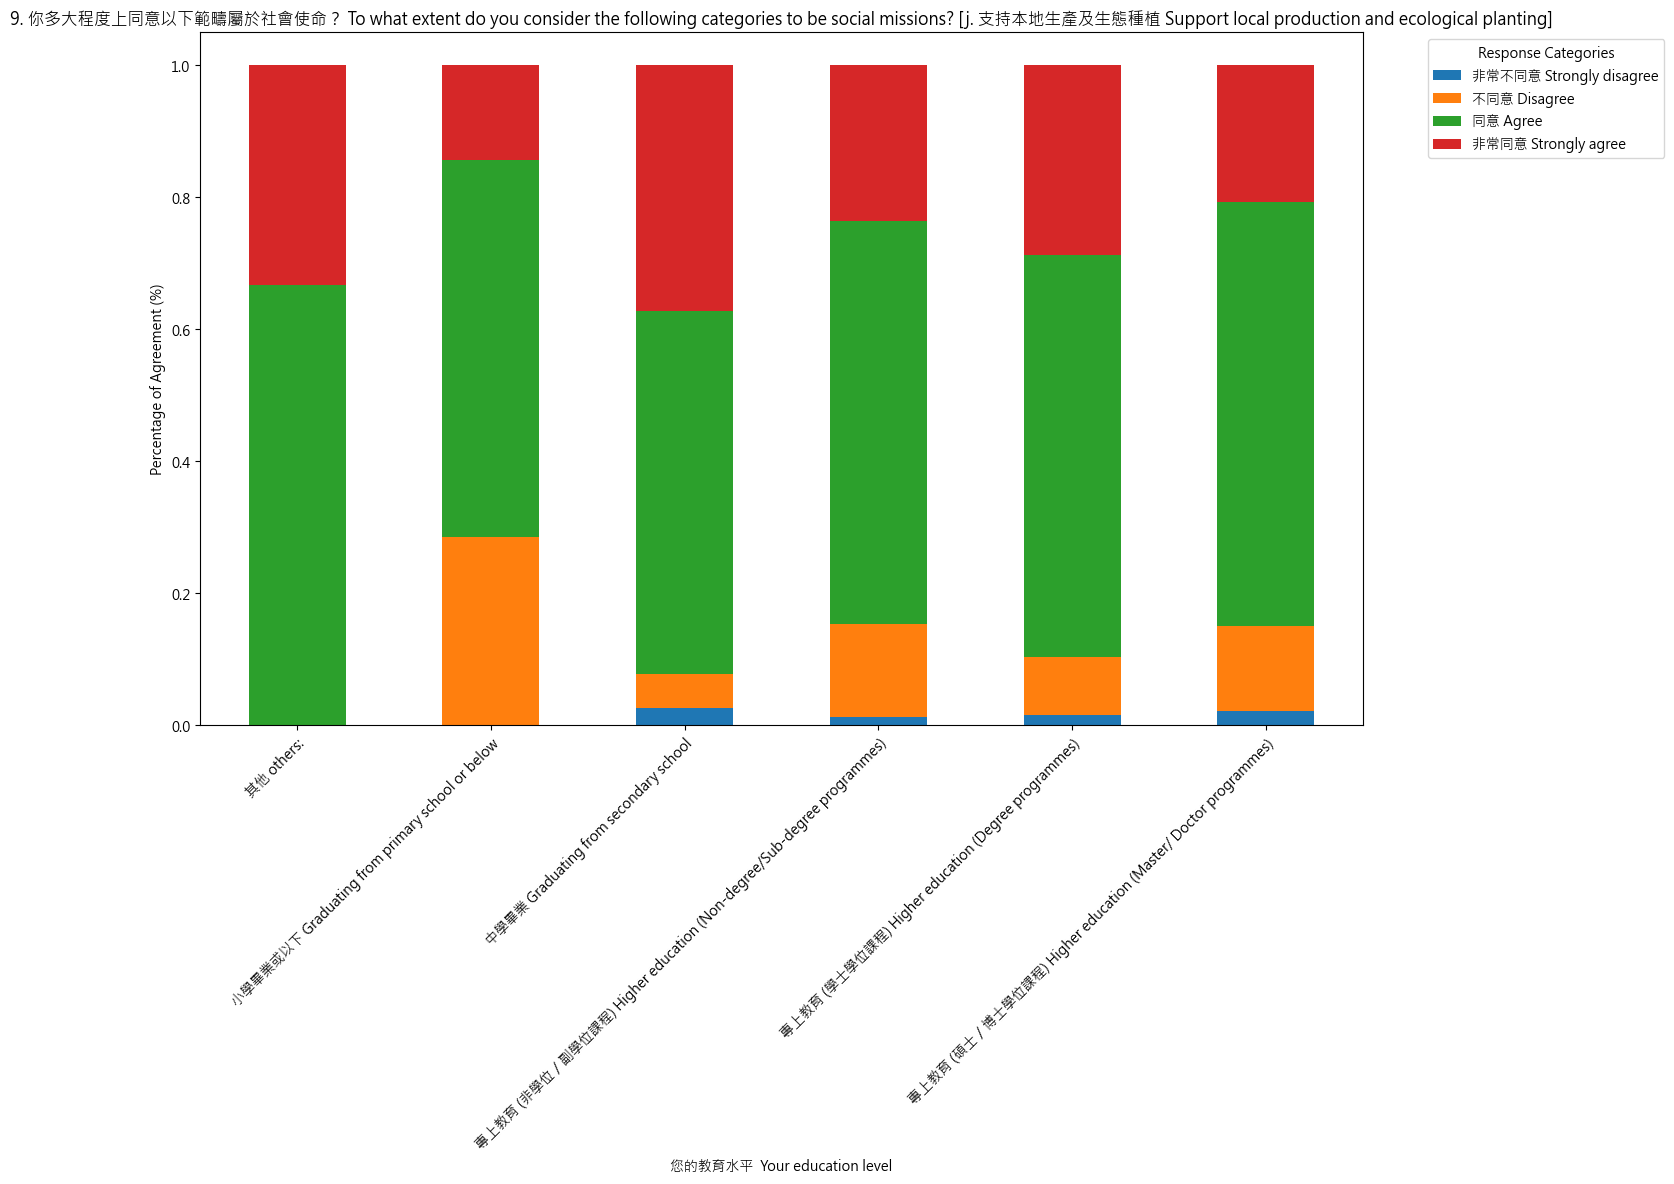

Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.


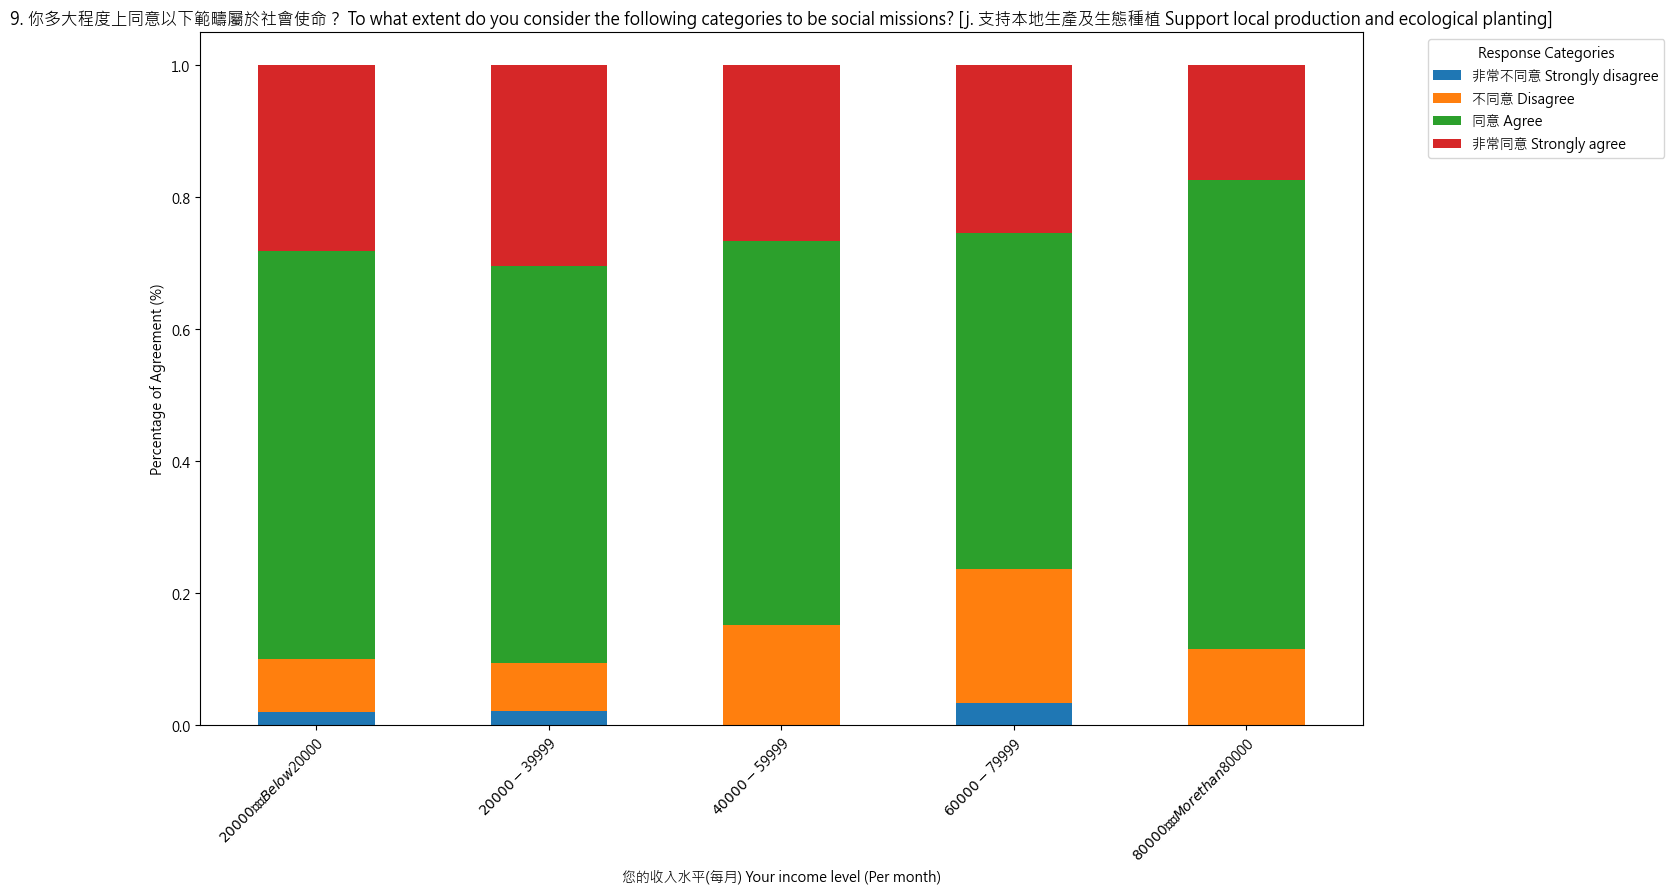

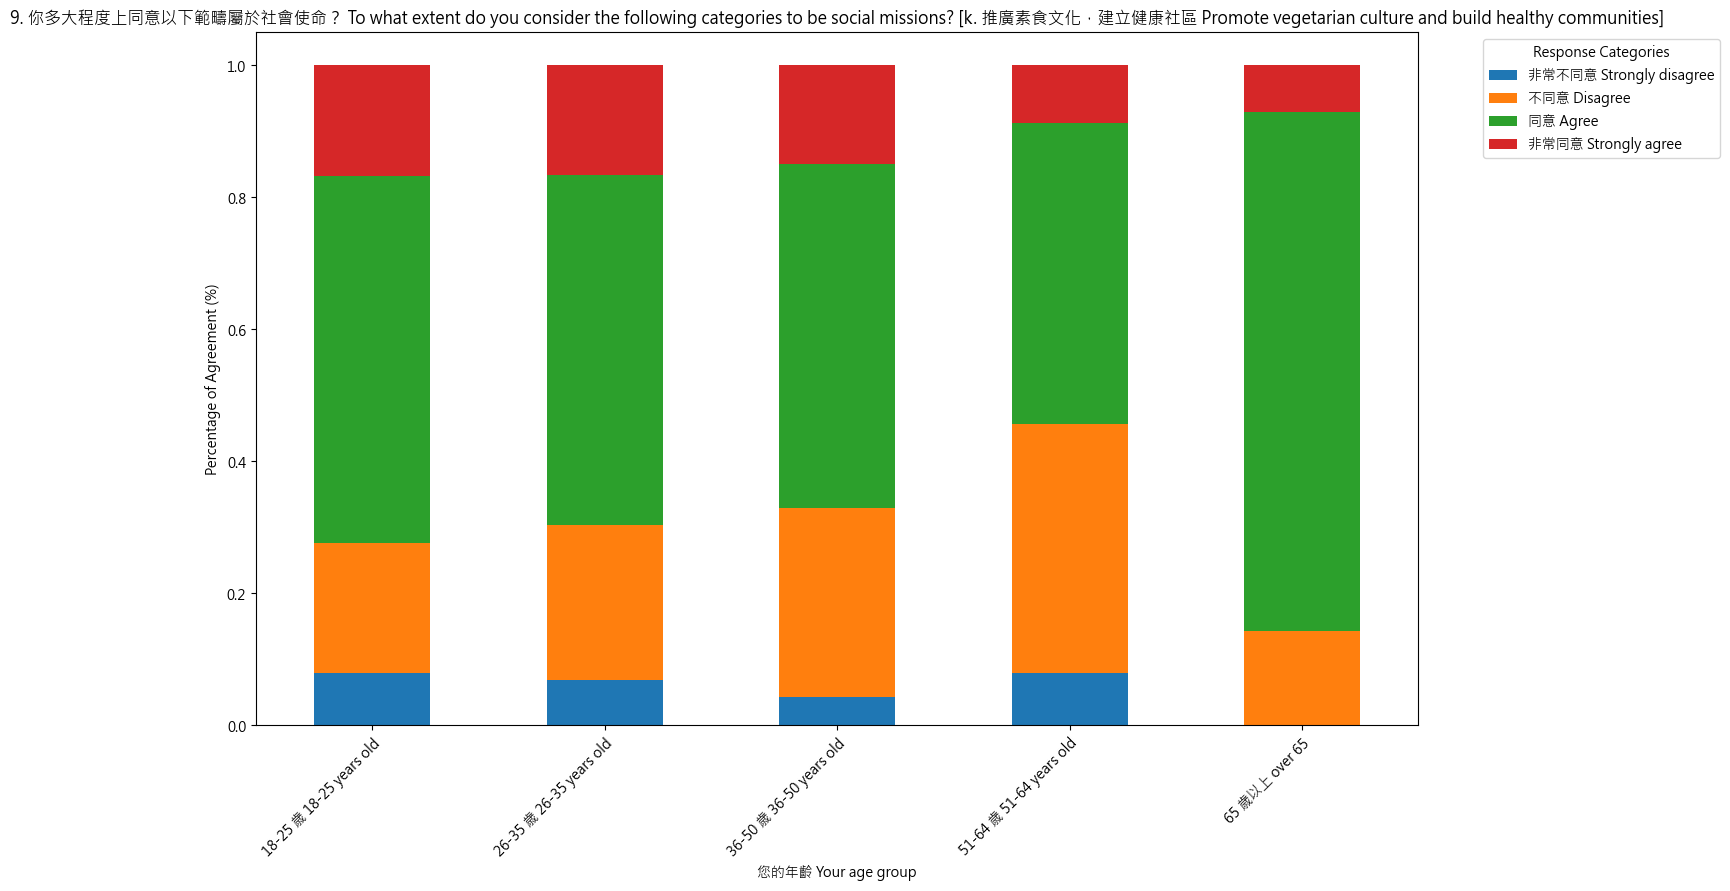

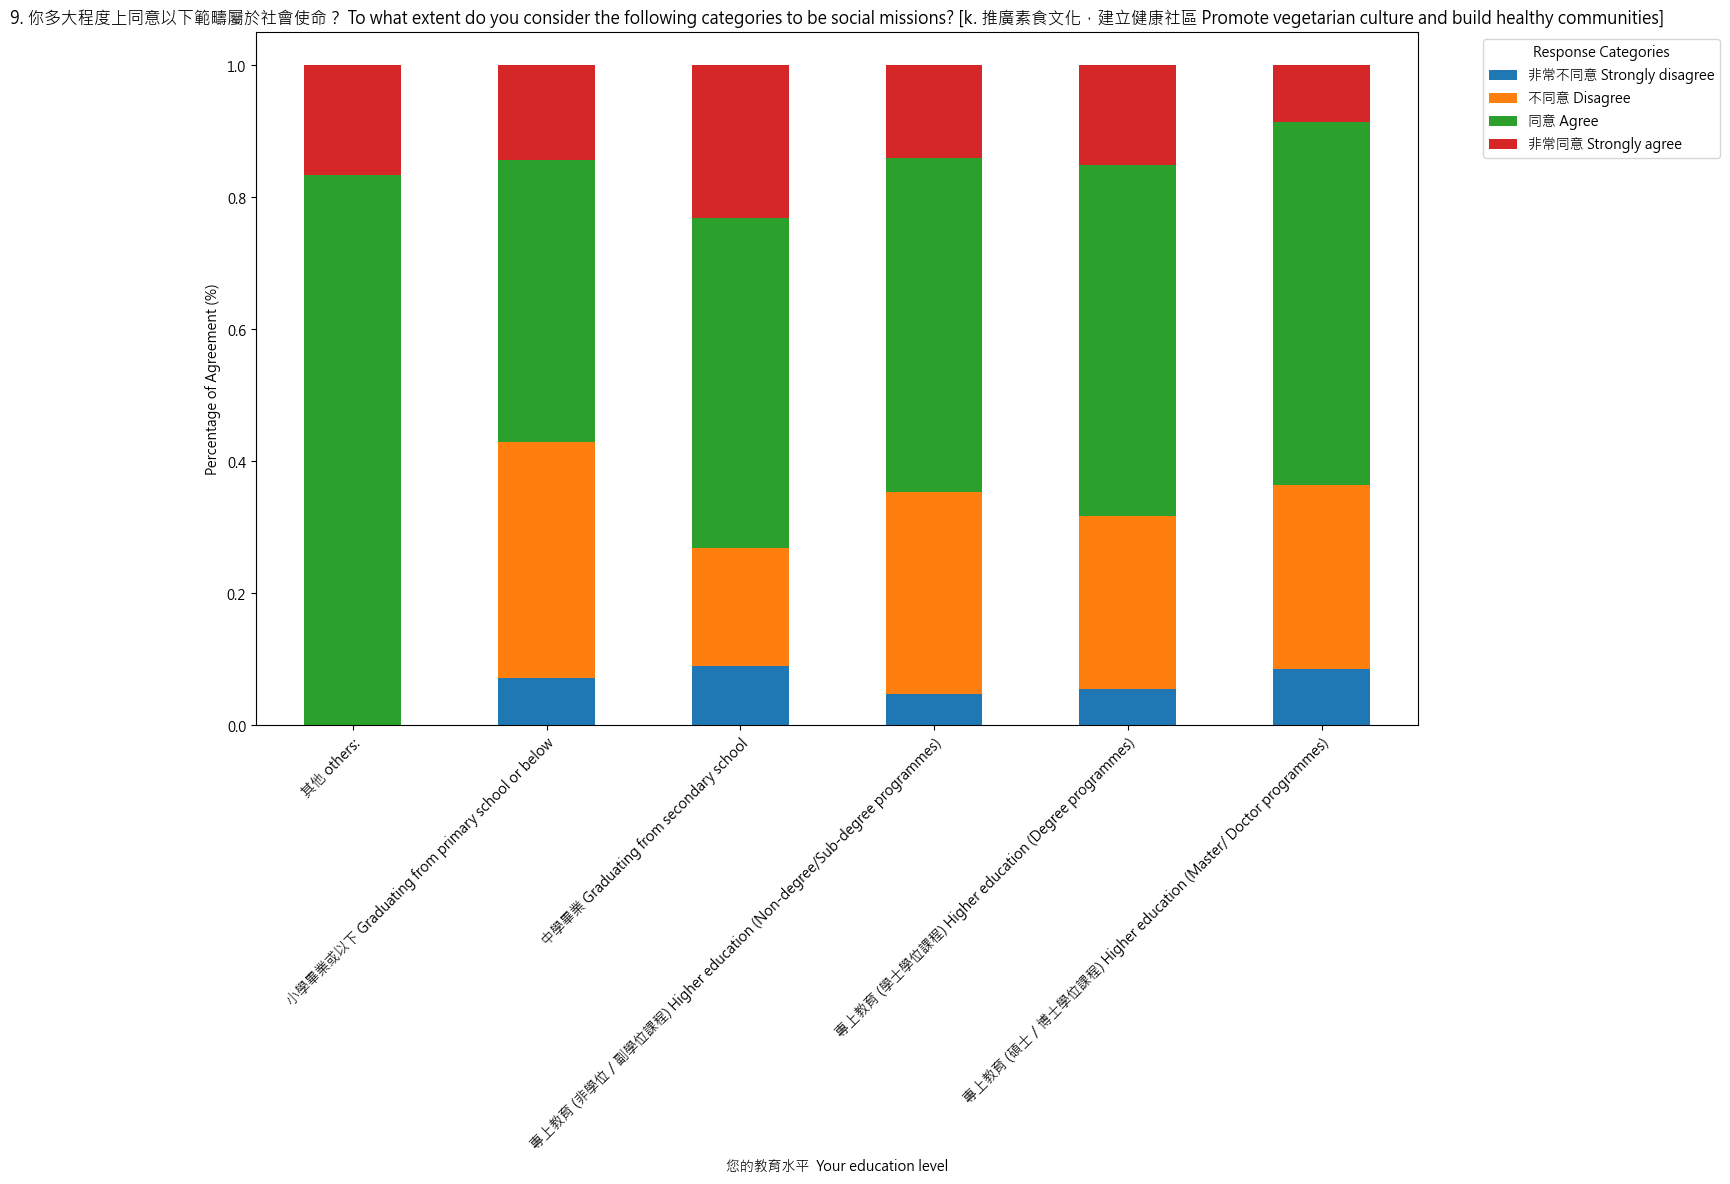

Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.


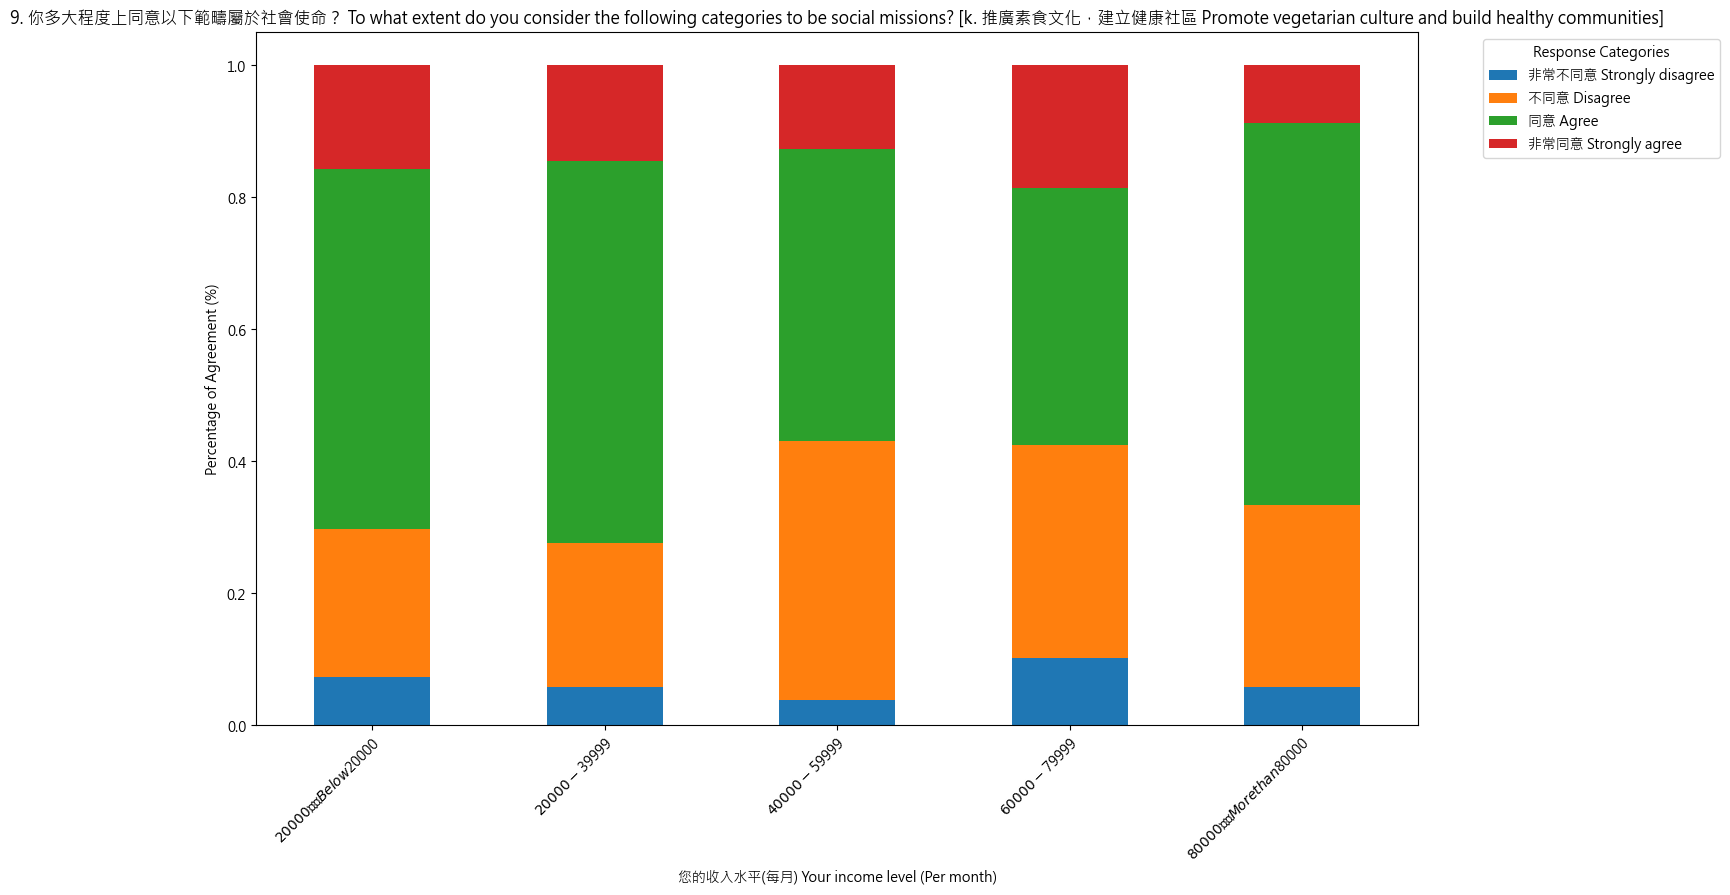

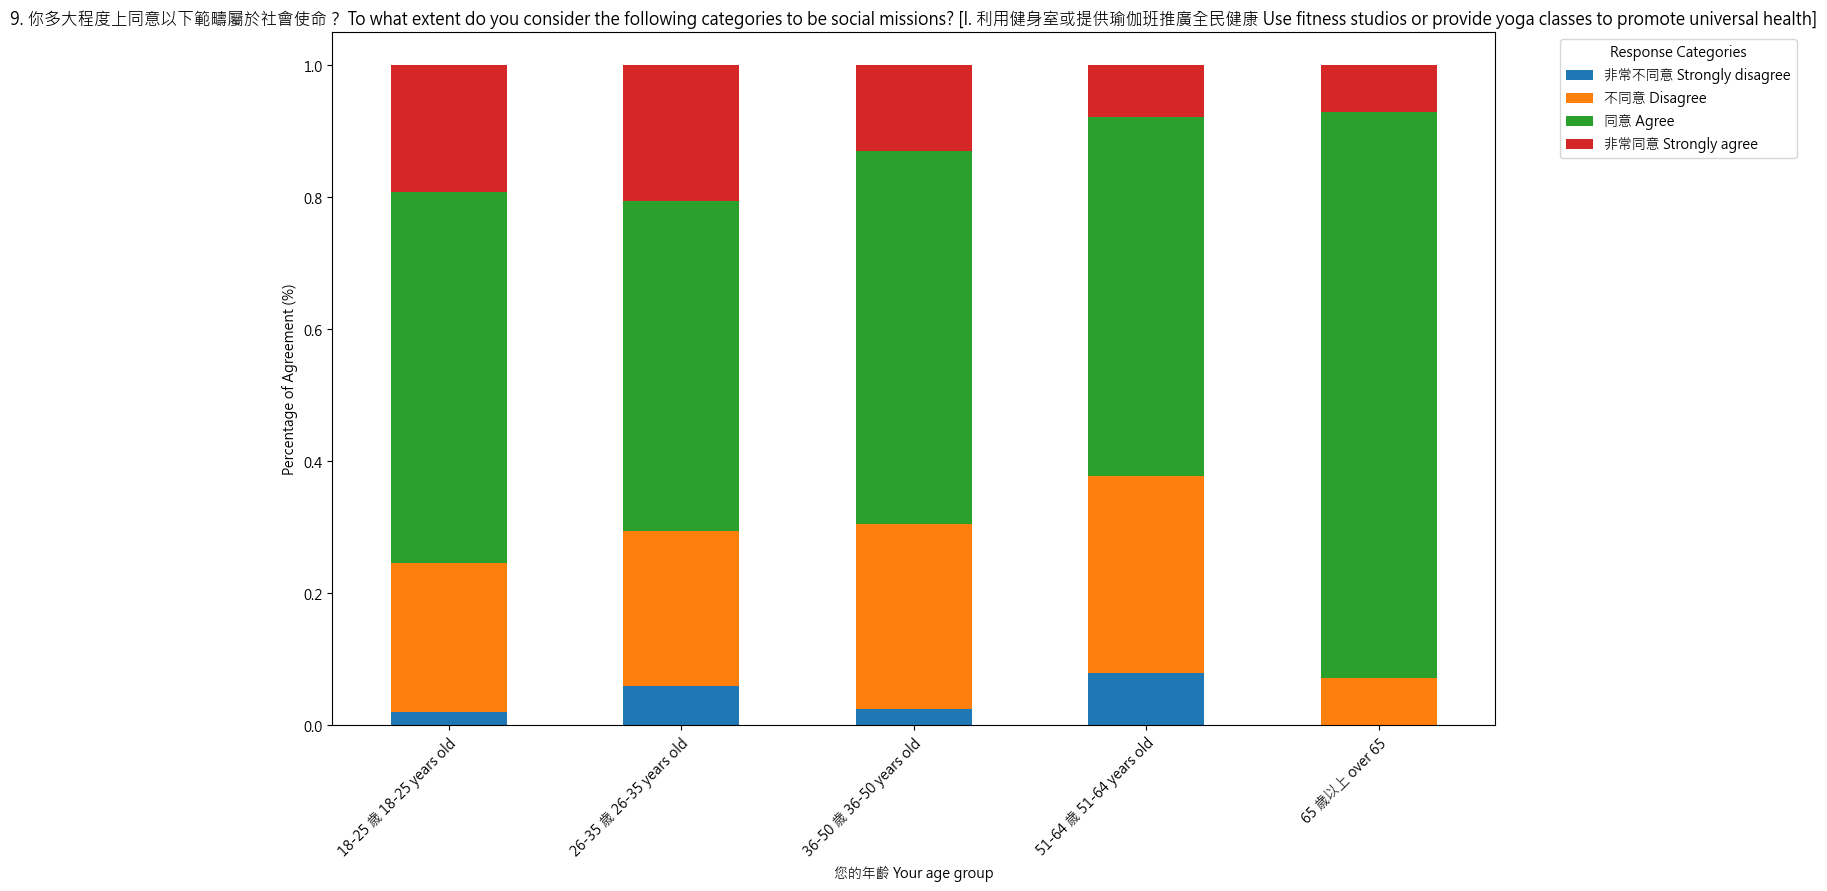

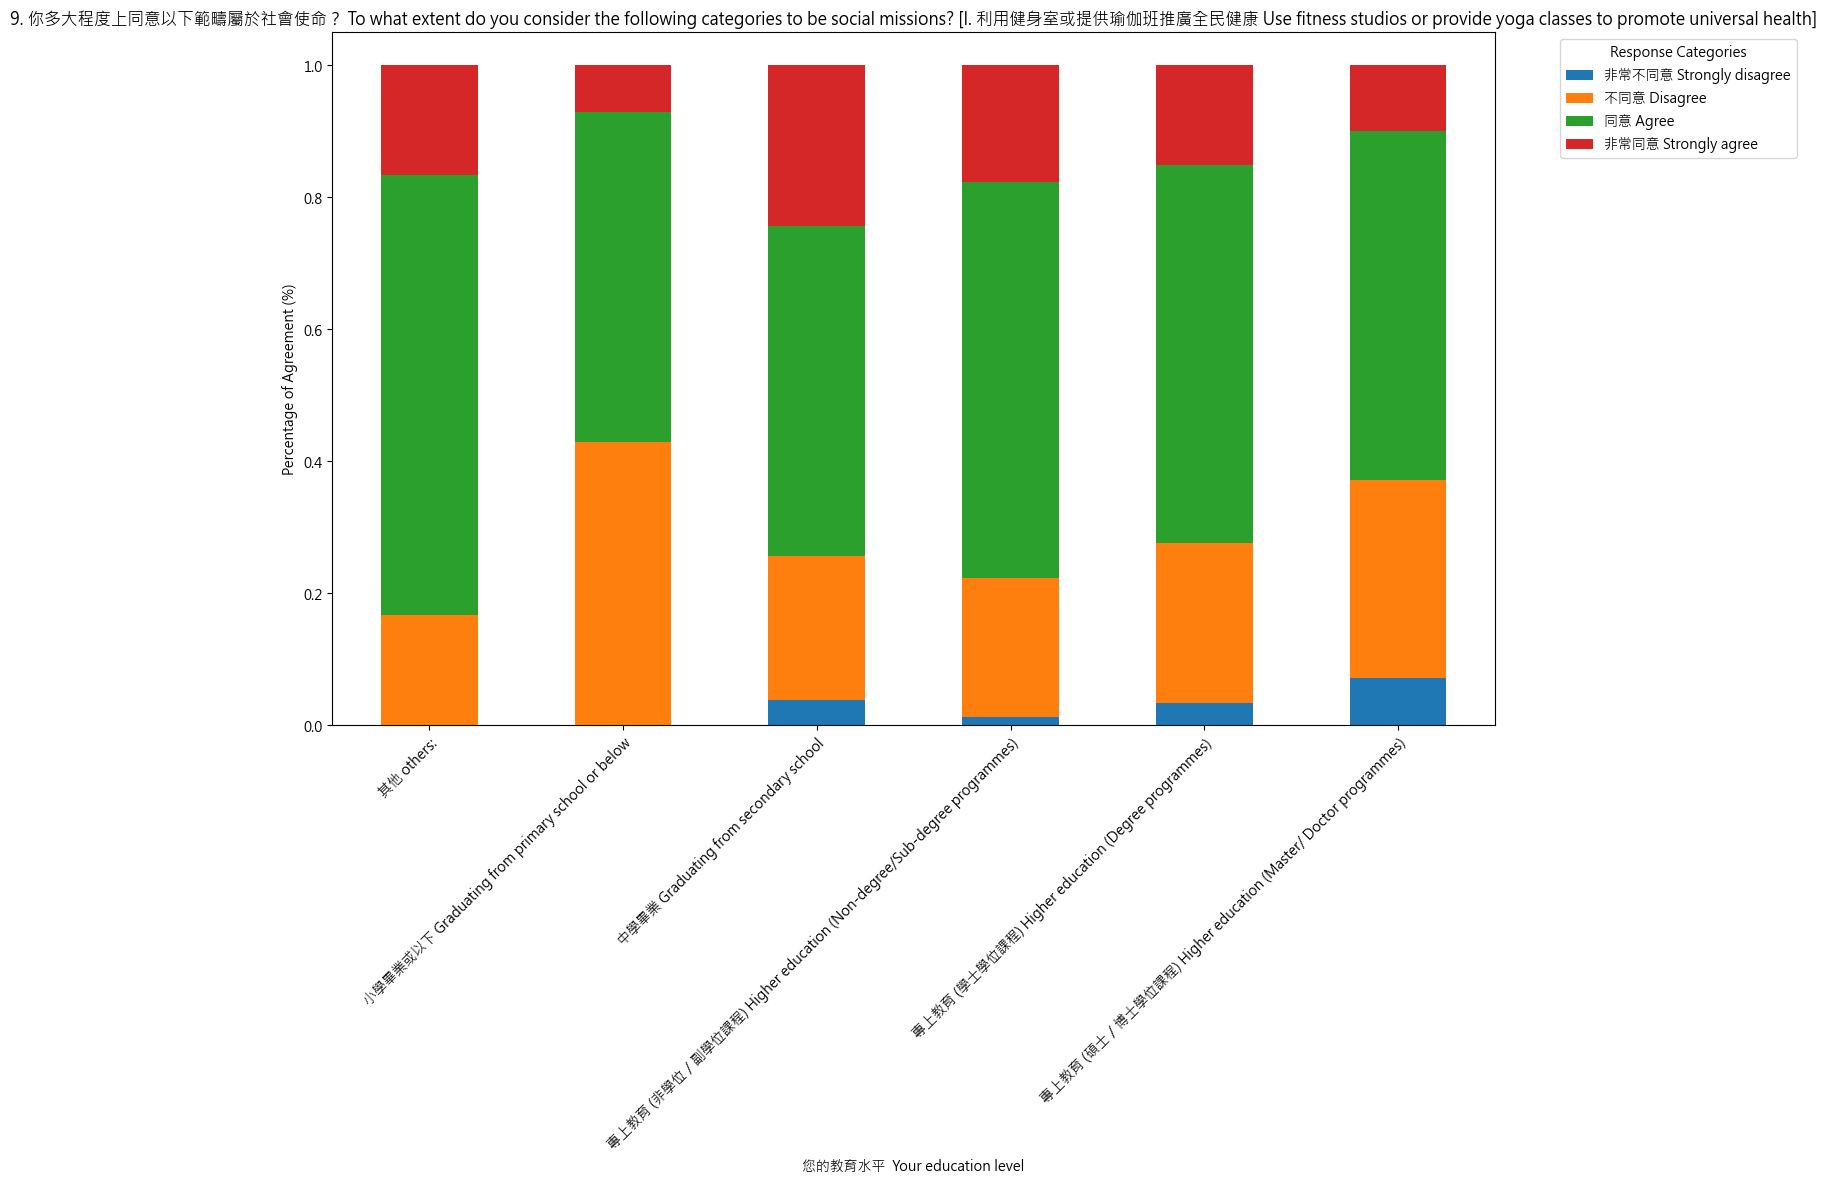

Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.


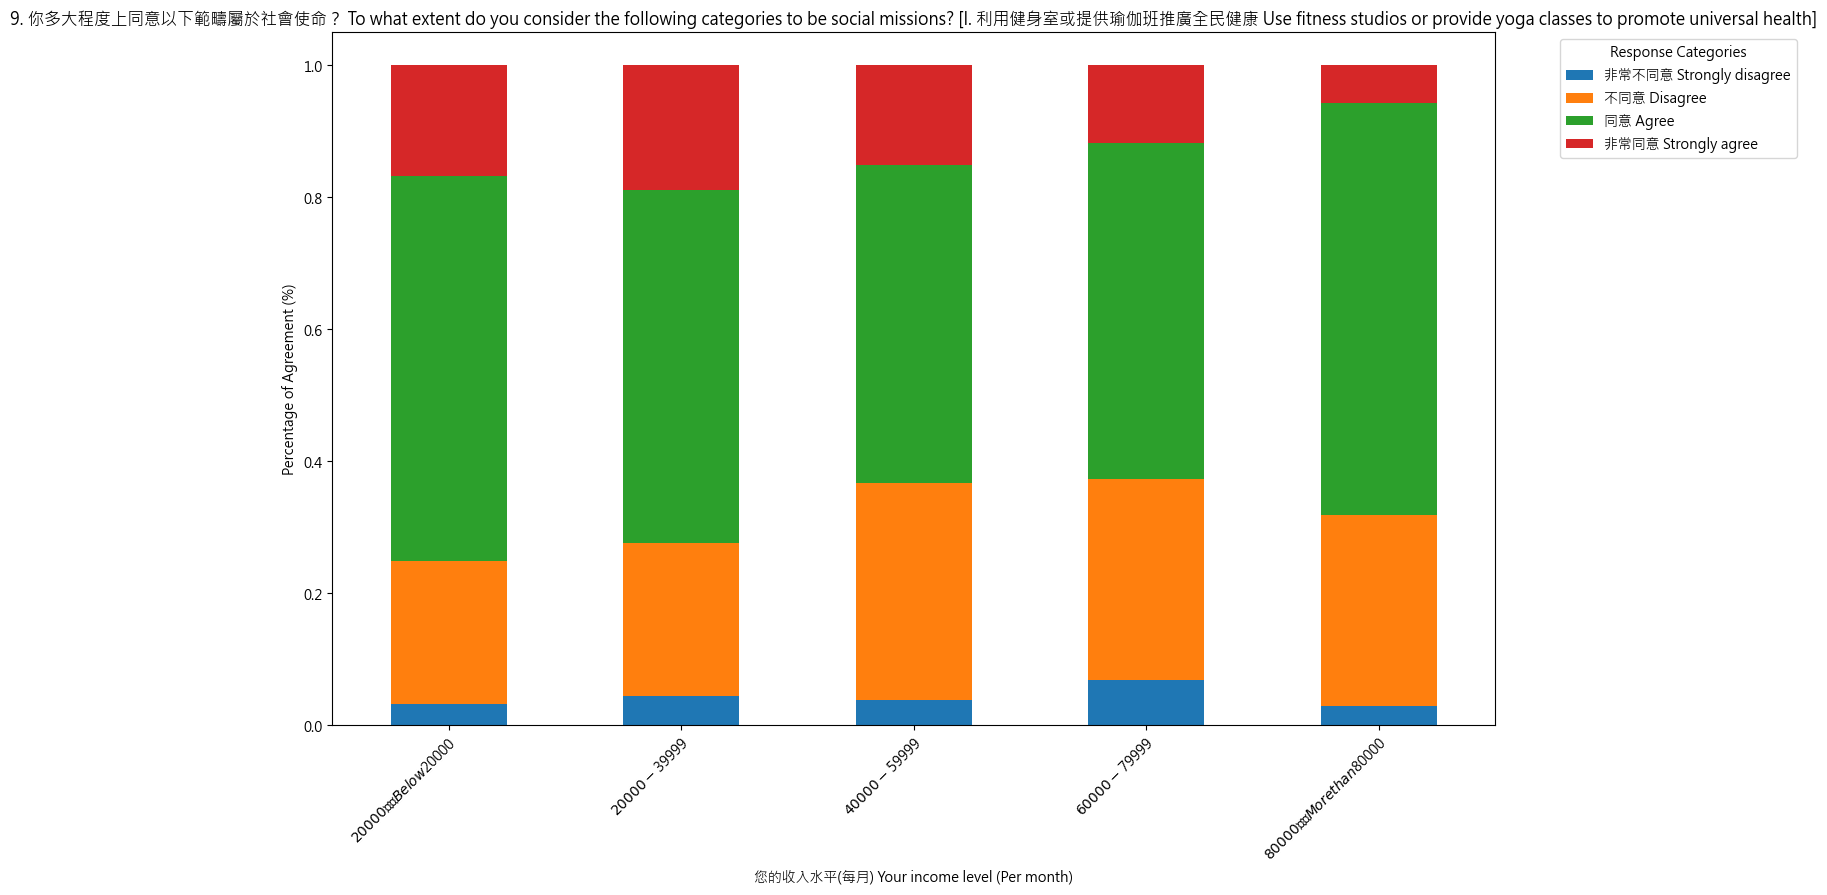

In [13]:
for question in  map_registry['map_cols']['cols_simple_map']['cols_q9'] :
    for x_columns in ['Agegroup', 'Education', 'Income']:
            cross_tab_bar_chart(df, question, x_columns, f'map_{x_columns}', 'columns', q_type='Response Categories', legend_map=reverse_map(map_registry['map_q9']))

# Question 1, 3, 4, 5, 6, 11, 12

In [14]:
map_registry['map_cols']['cols_simple_map']['cols_yes_no']

['q1', 'q3', 'q4', 'q5', 'q6', 'q11', 'q12']

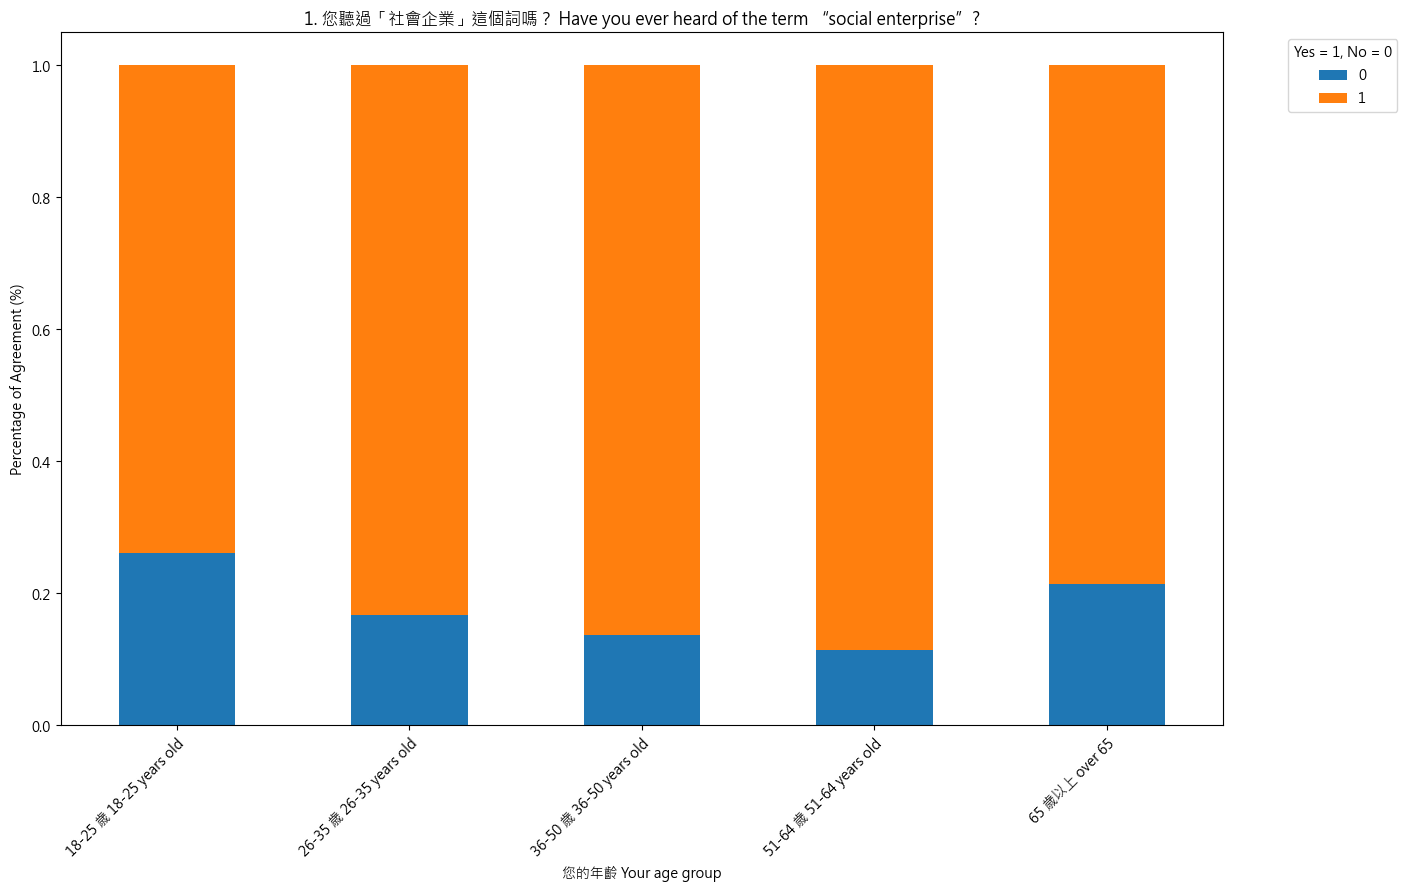

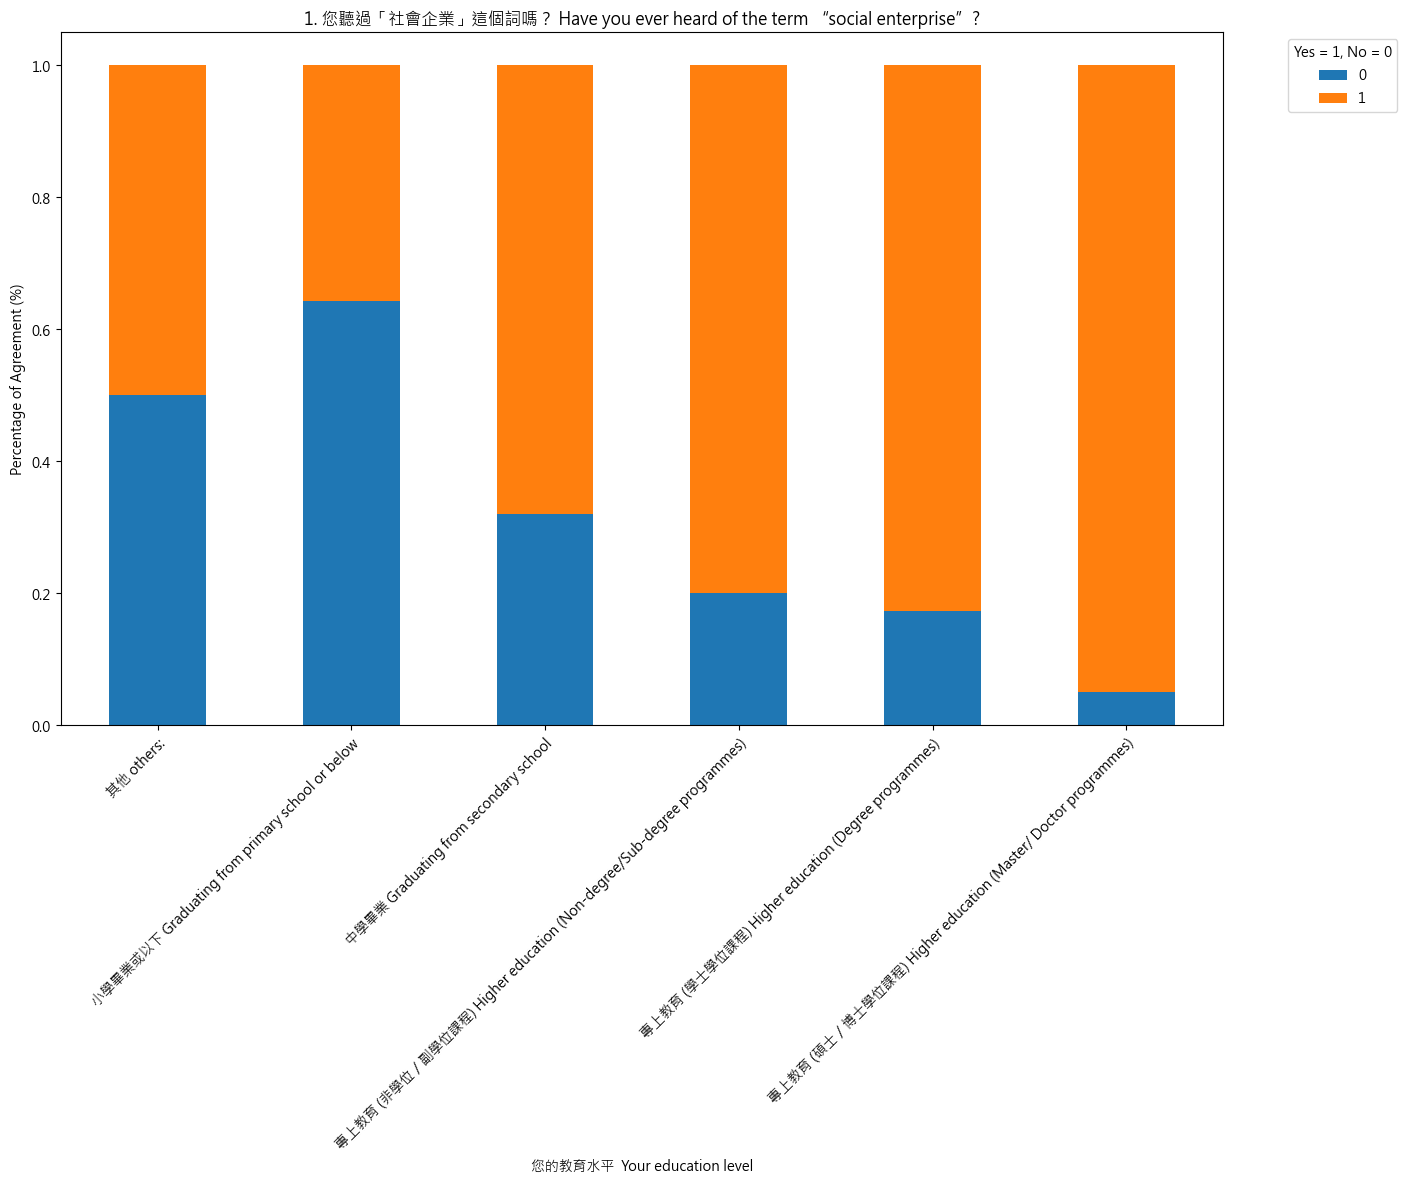

Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.


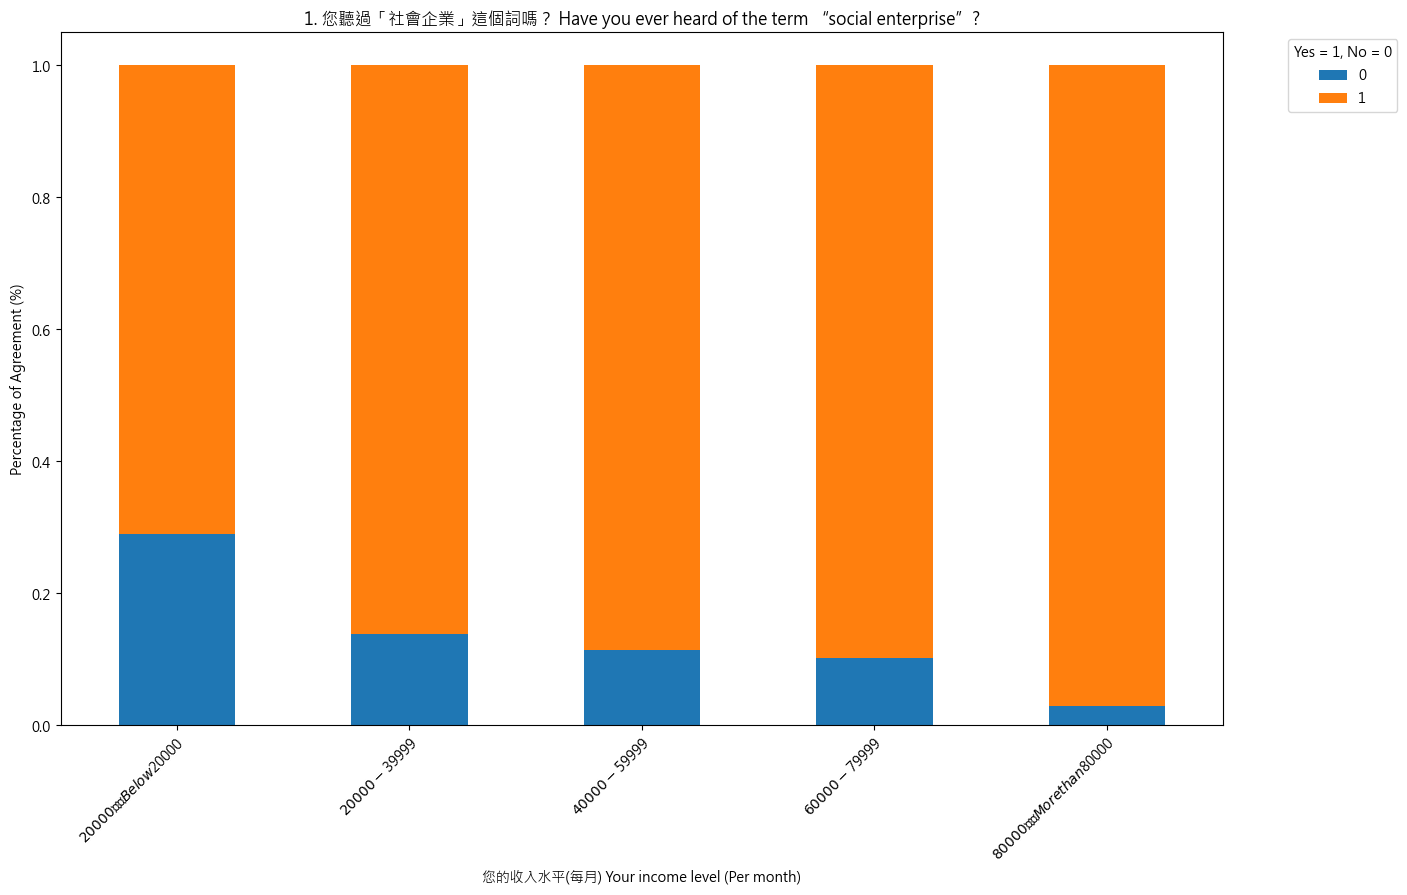

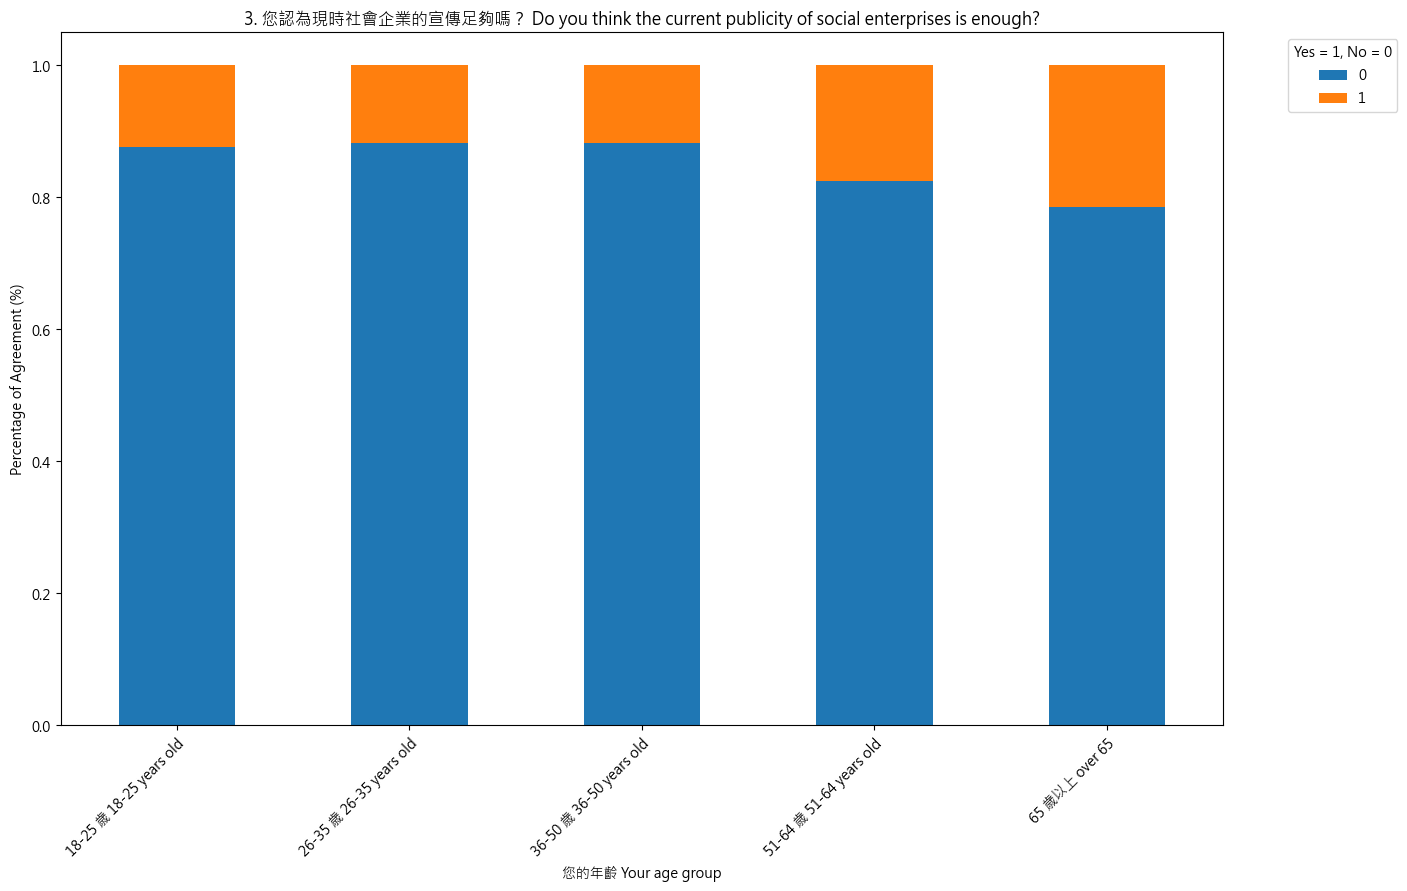

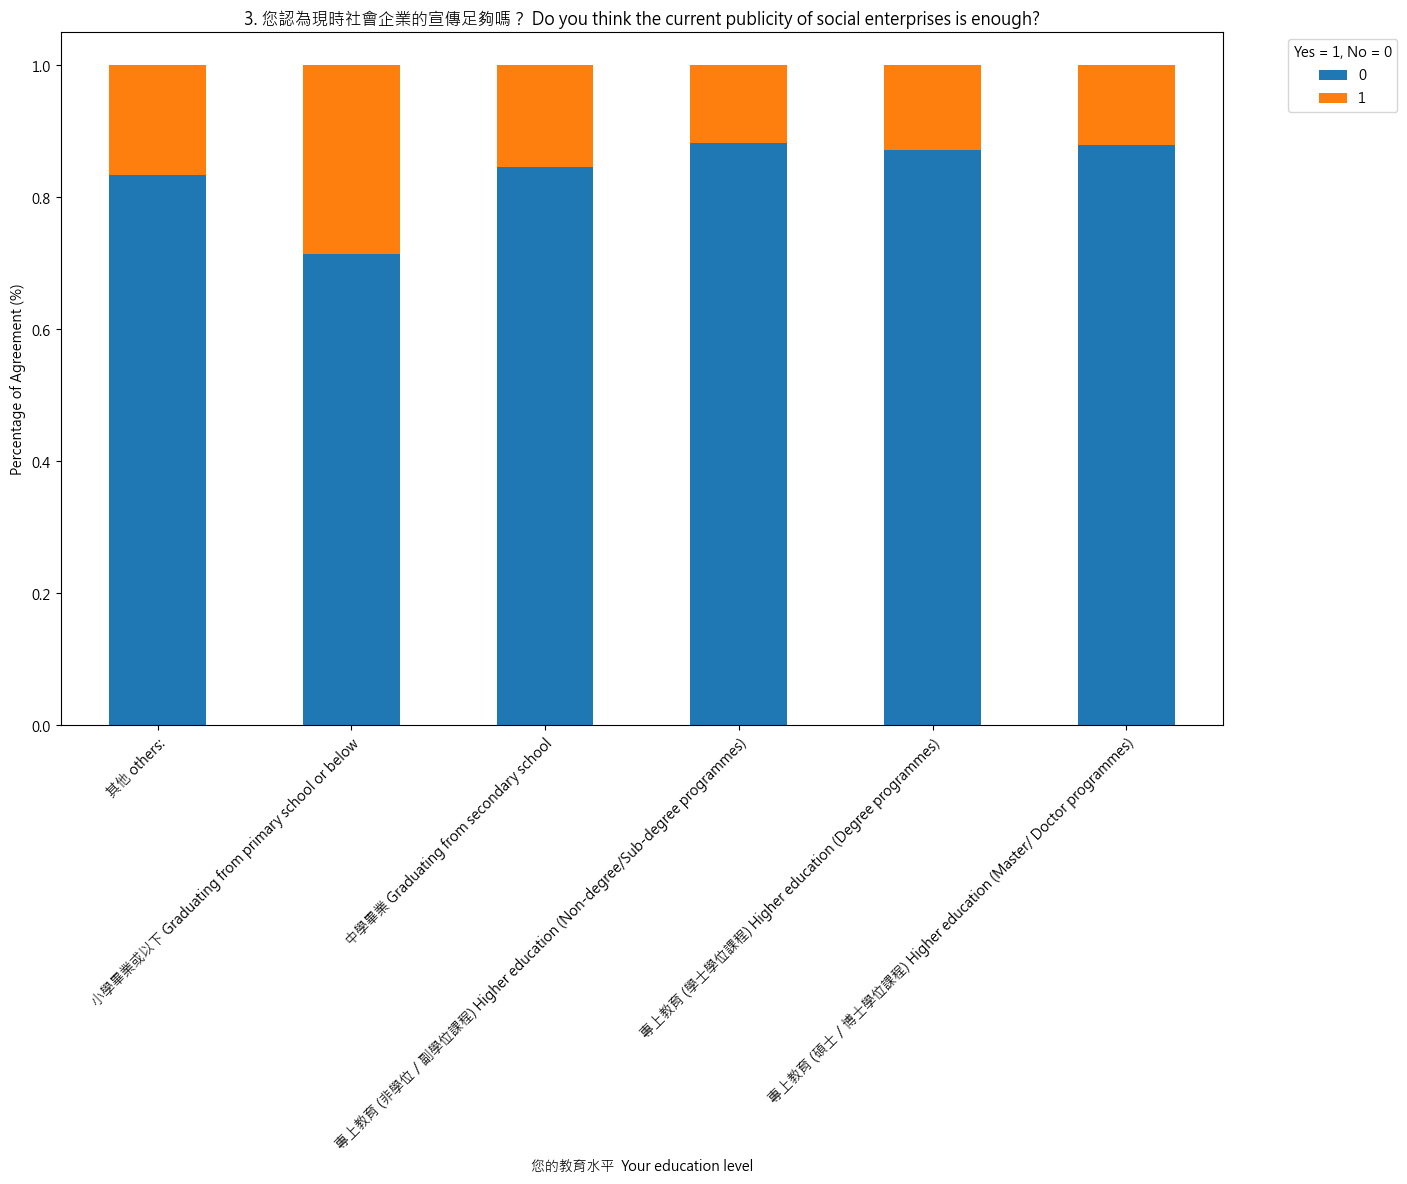

Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.


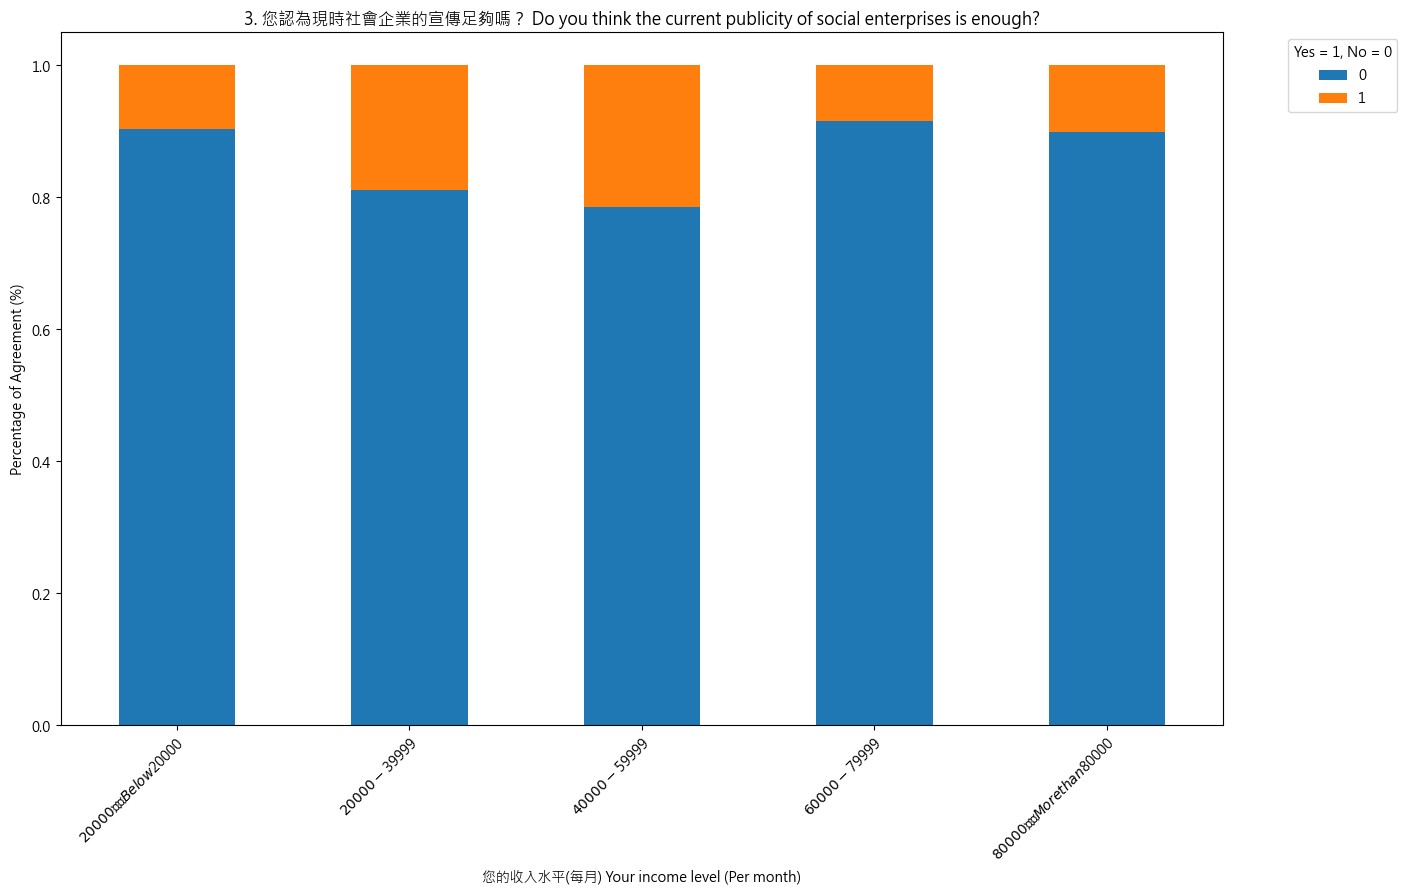

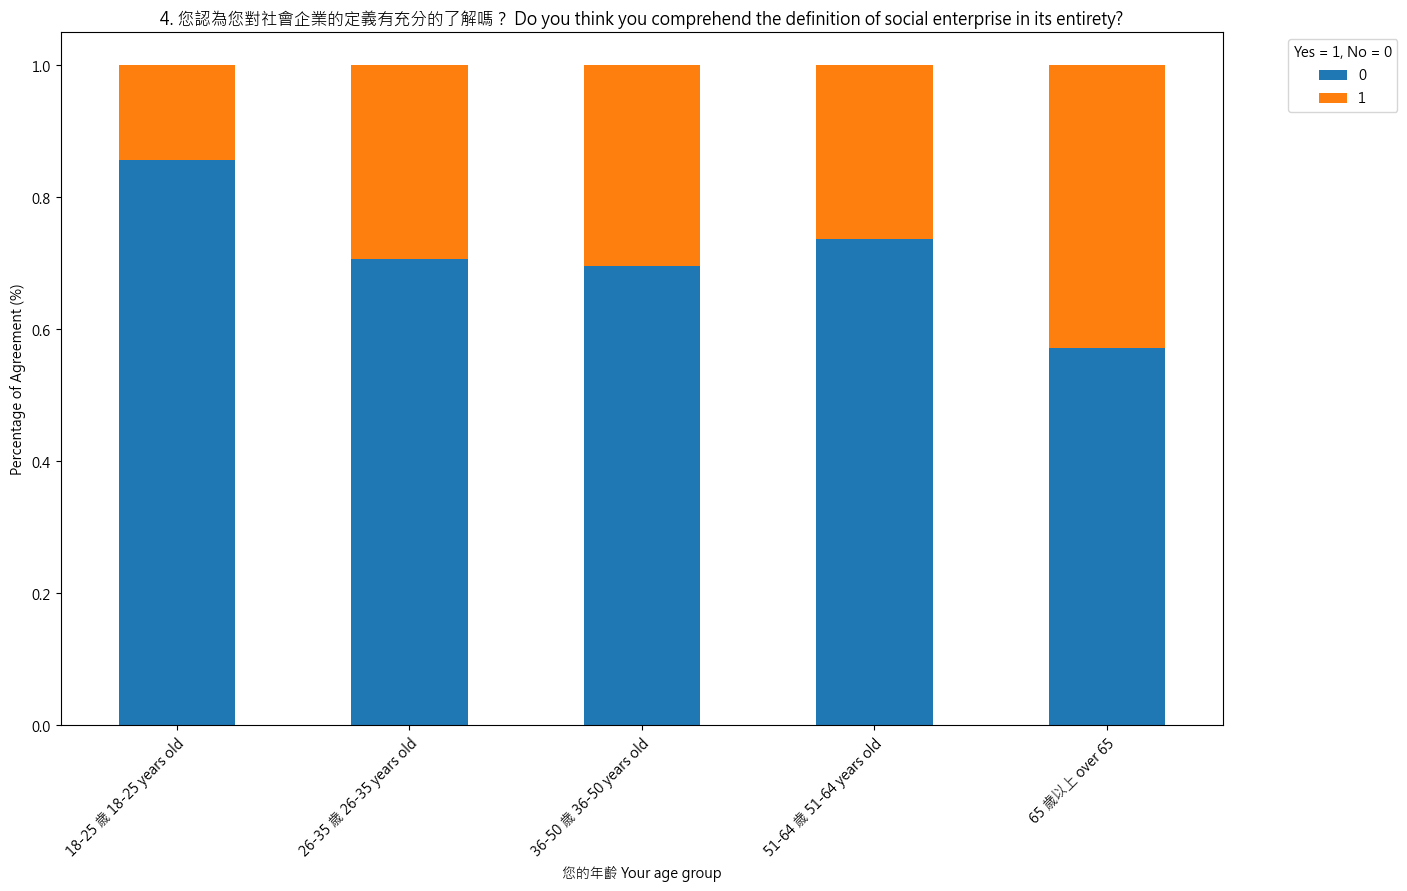

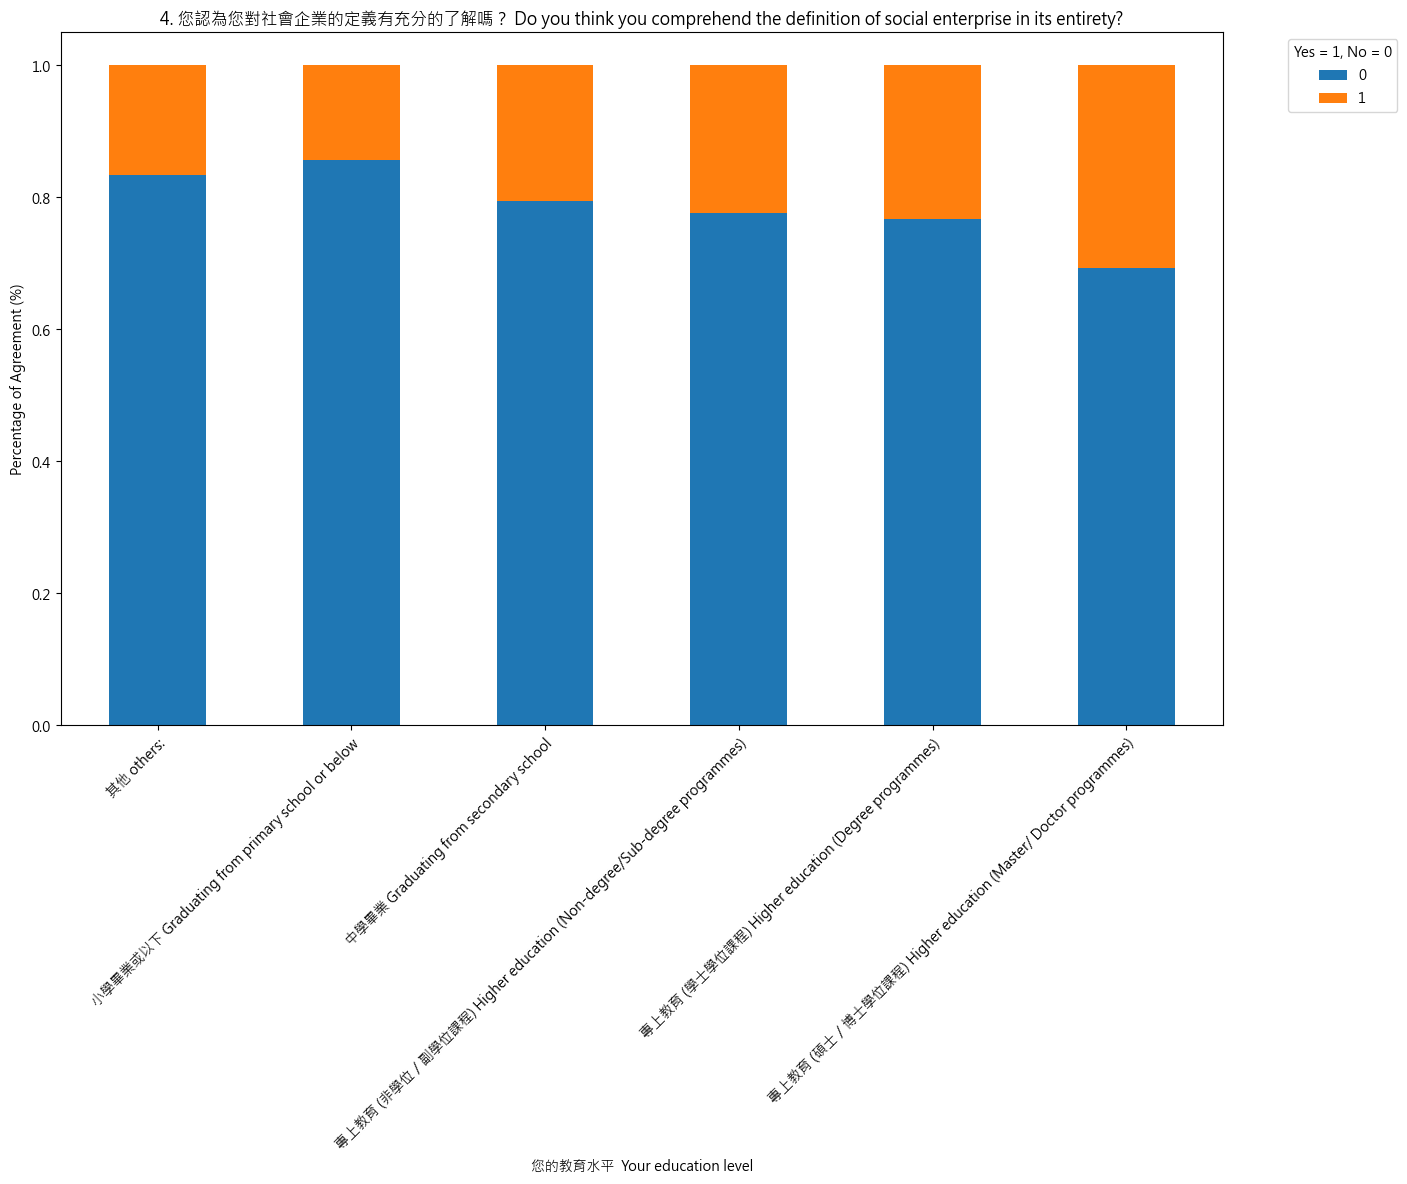

Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.


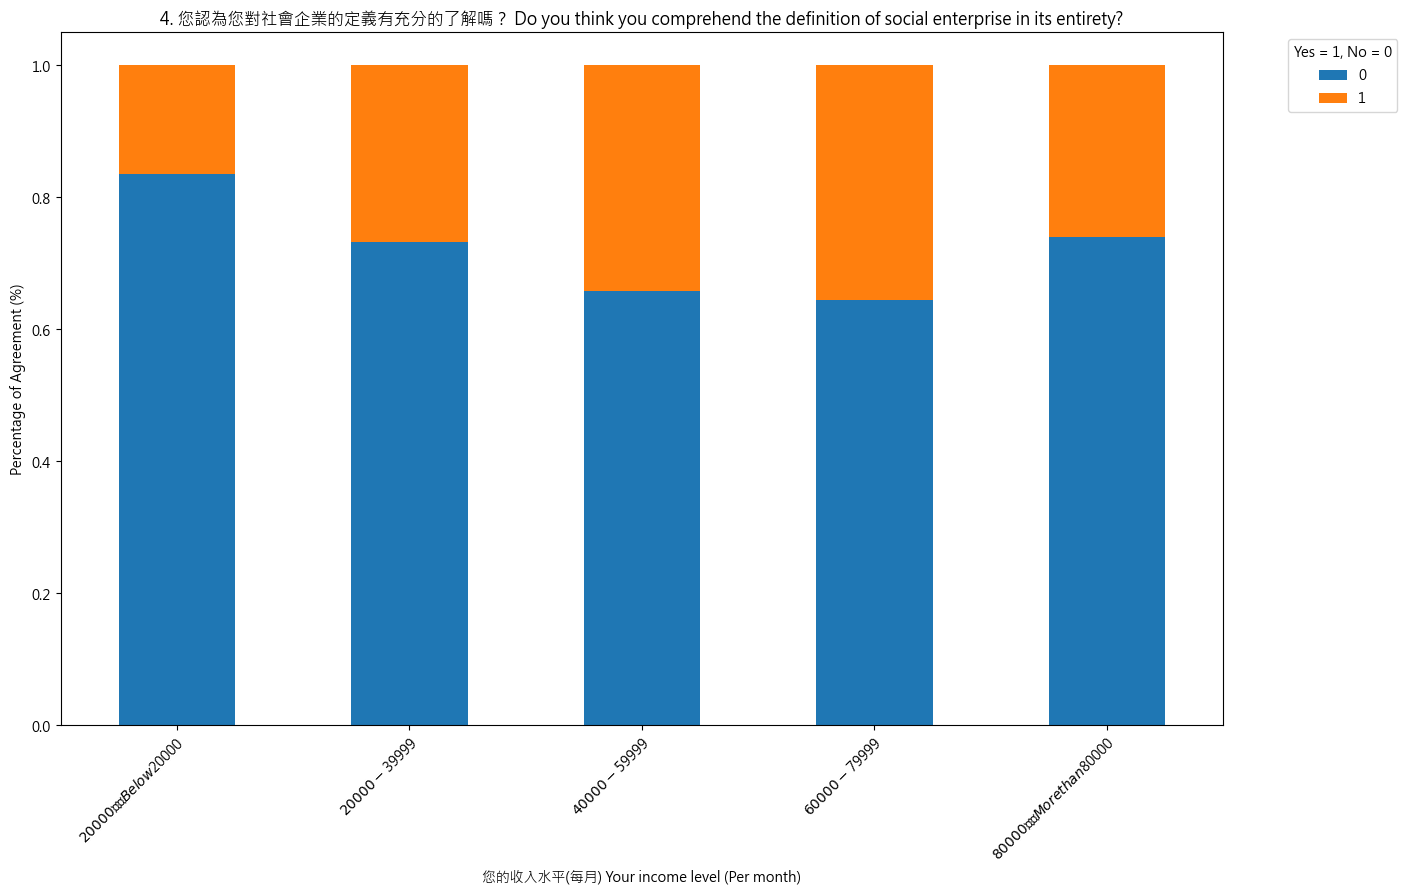

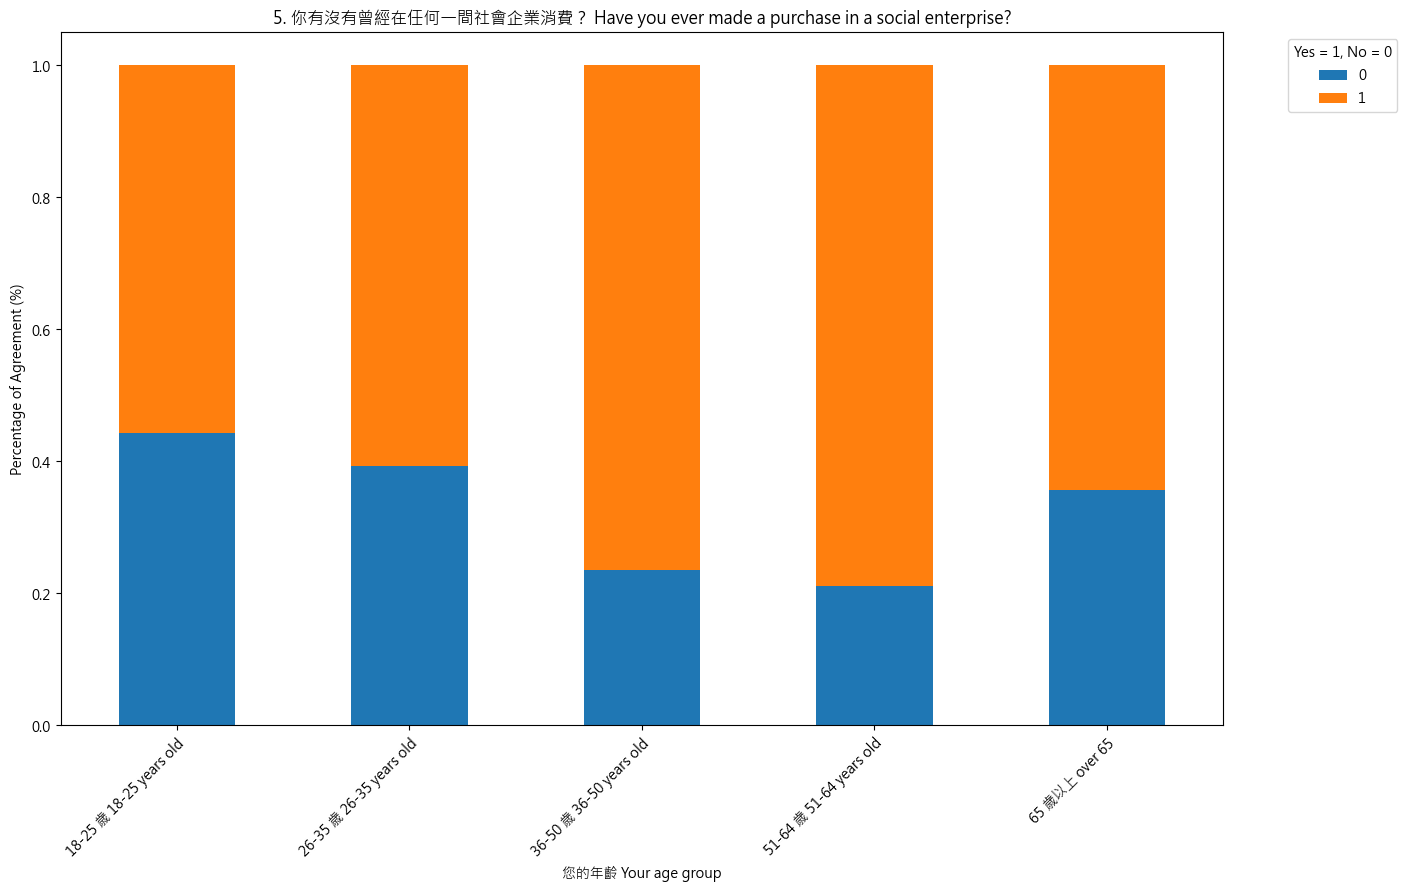

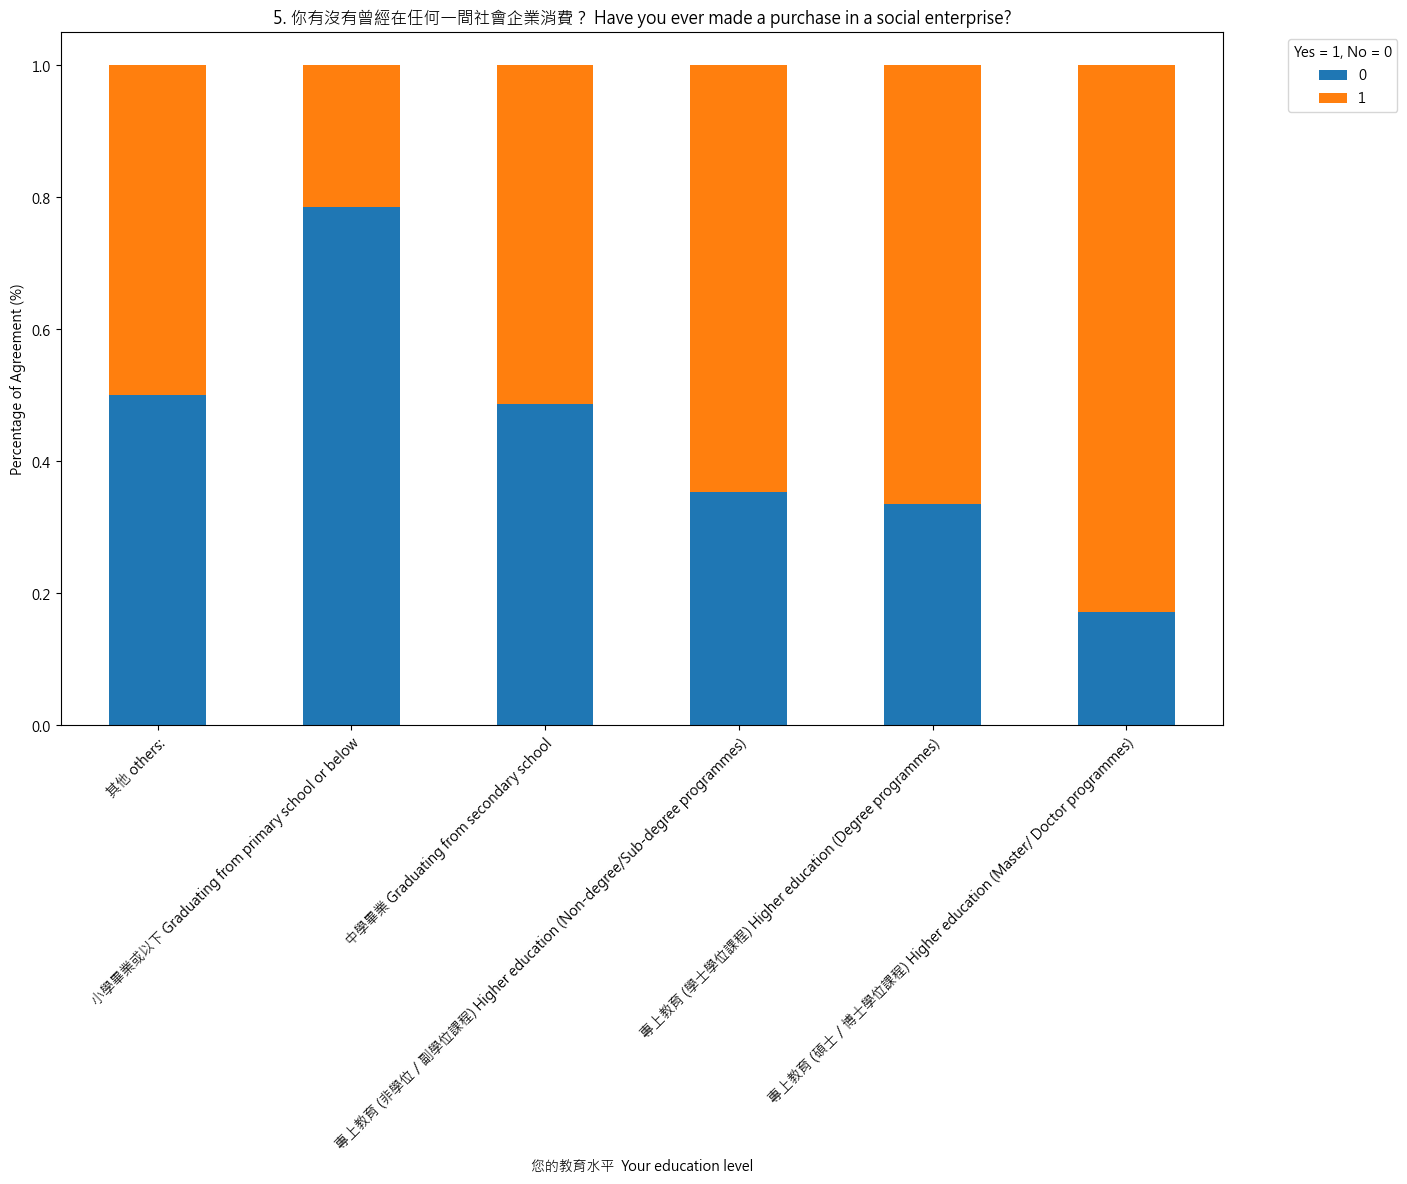

Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.


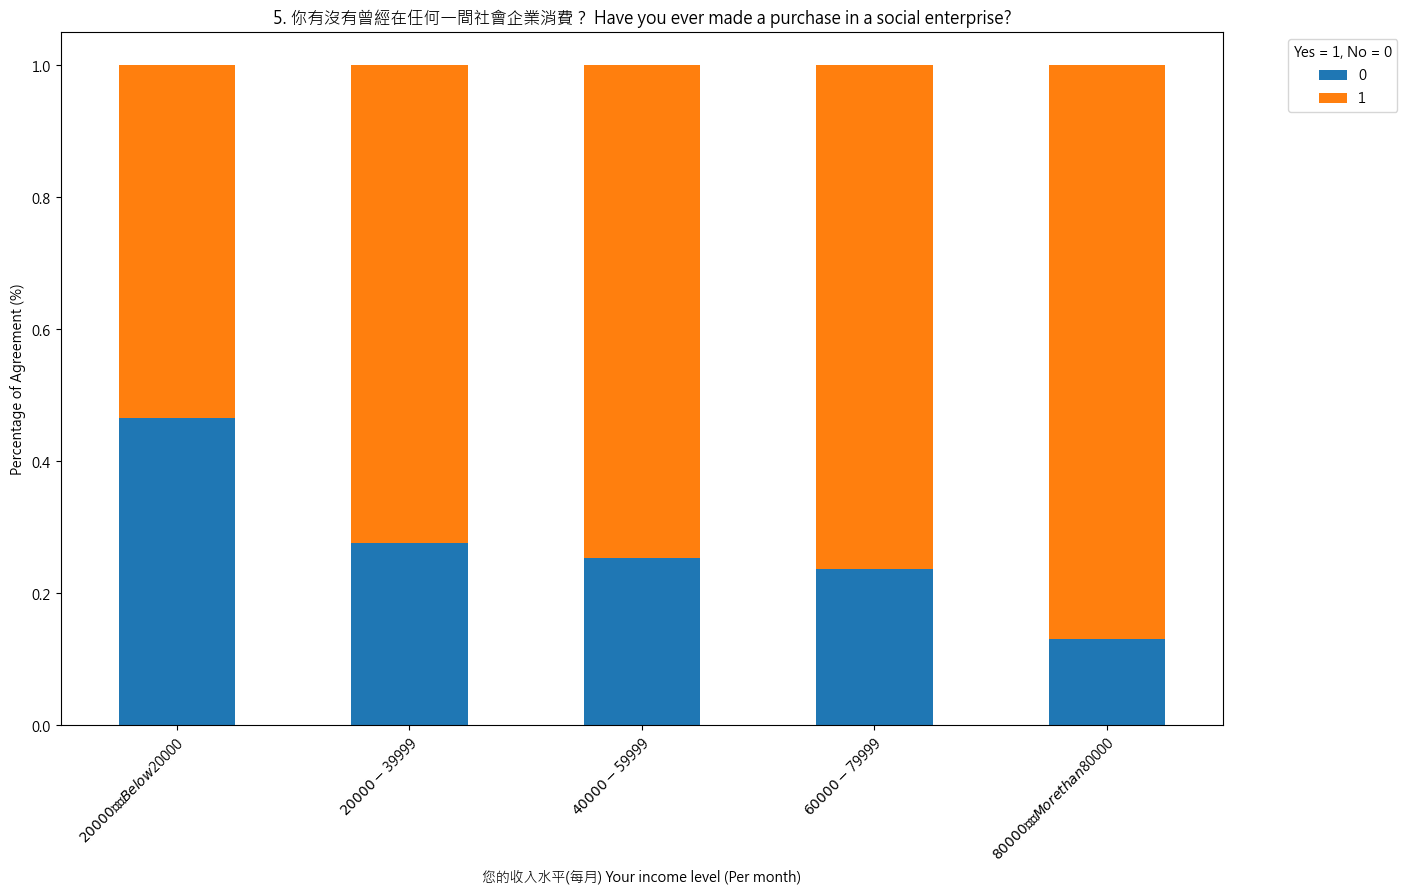

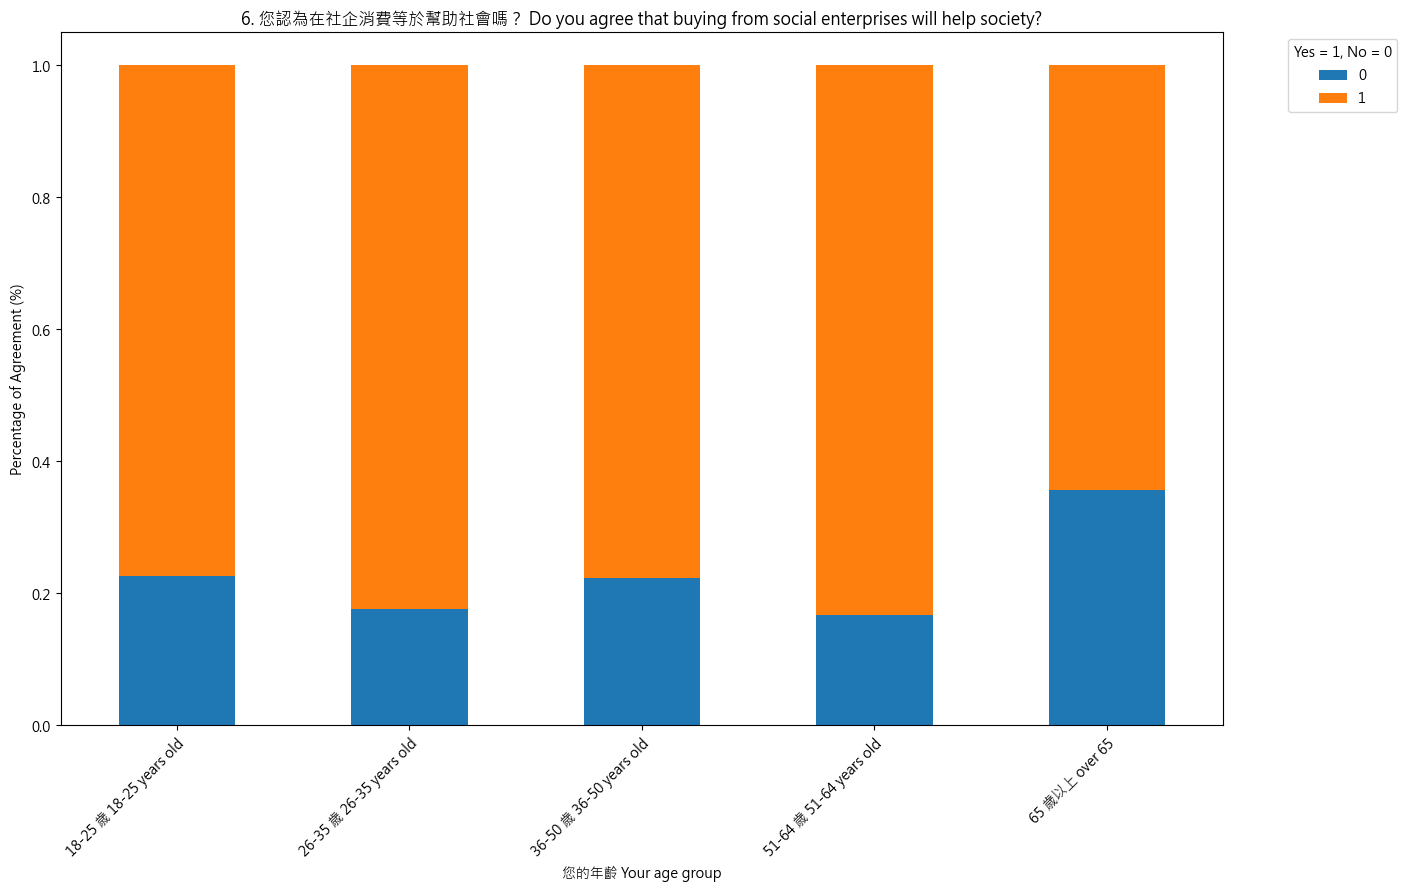

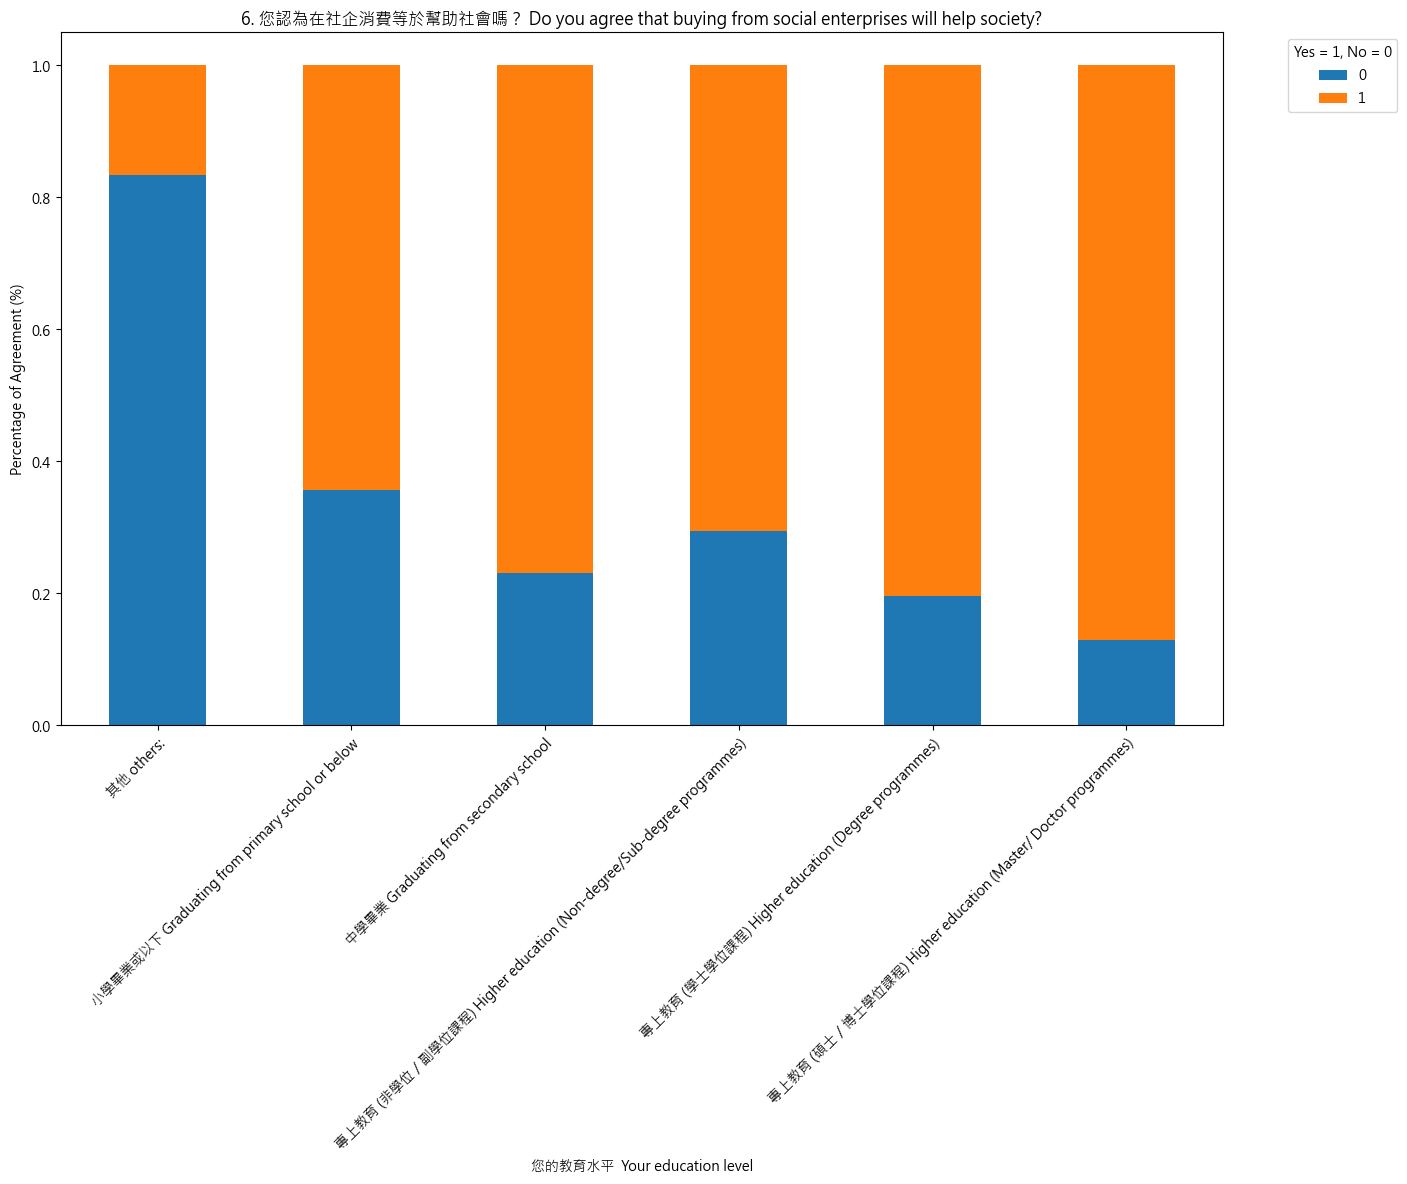

Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.


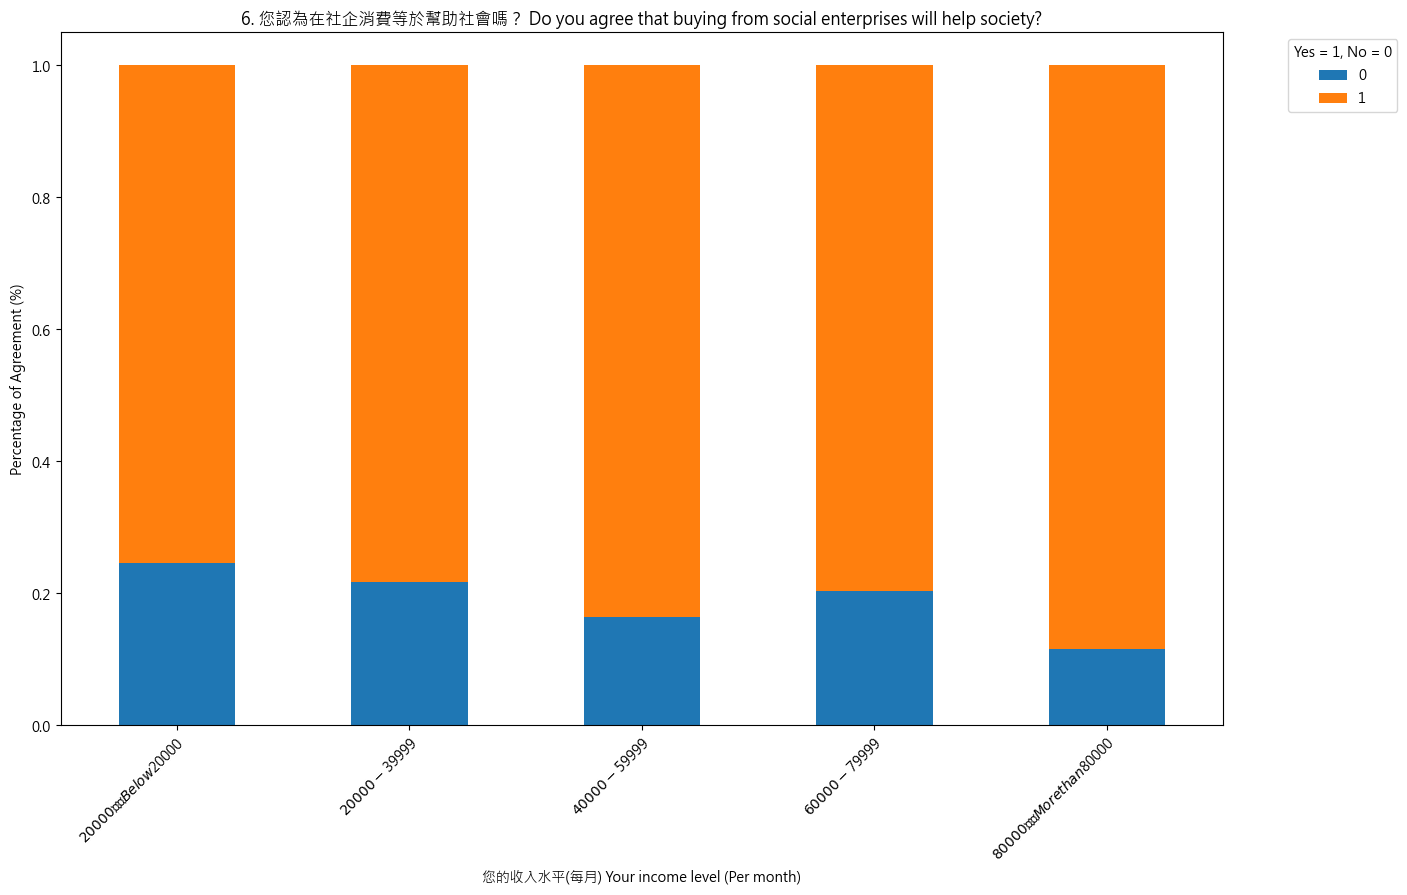

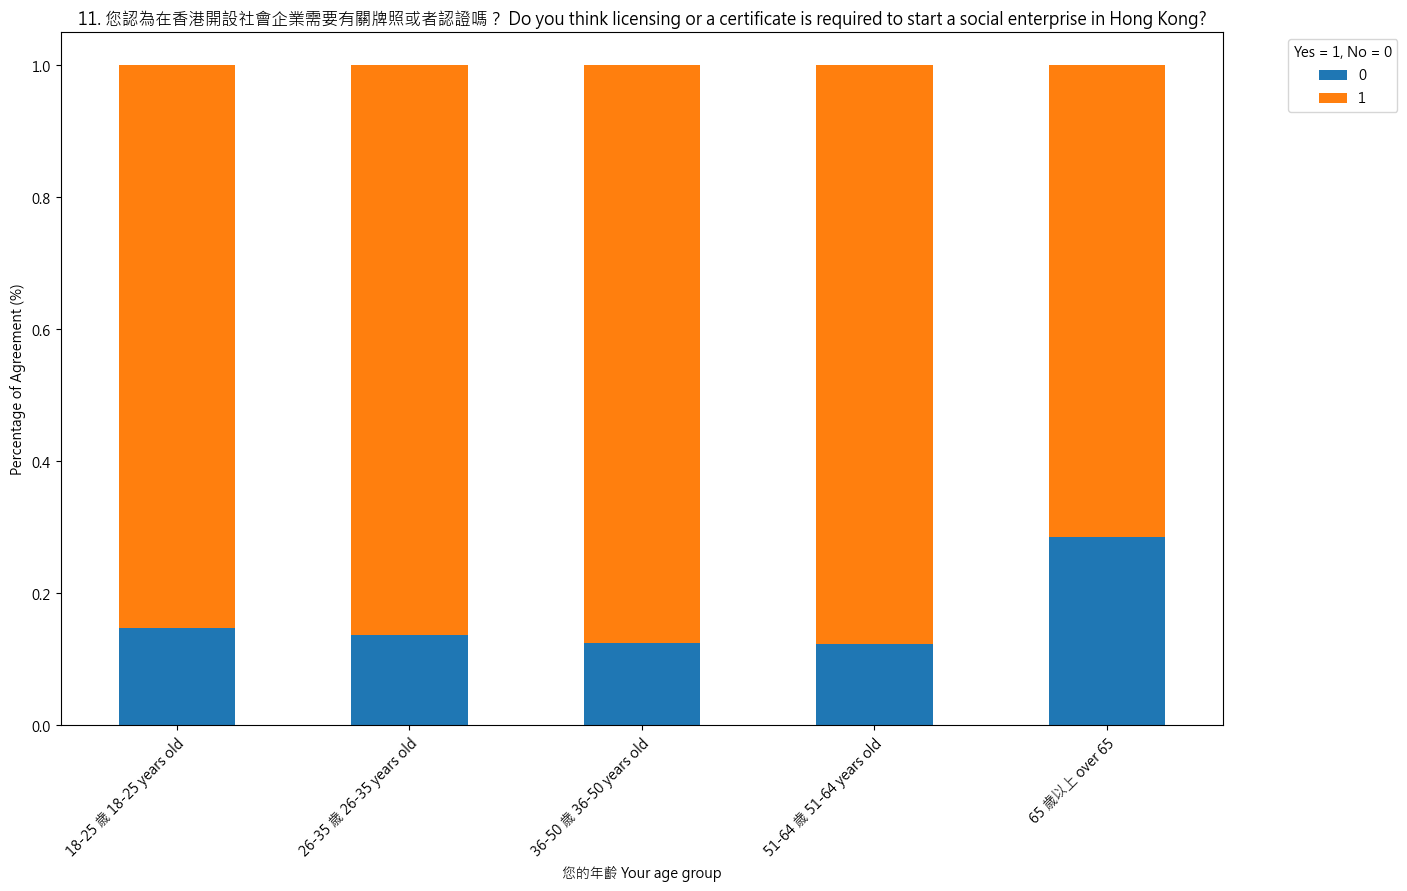

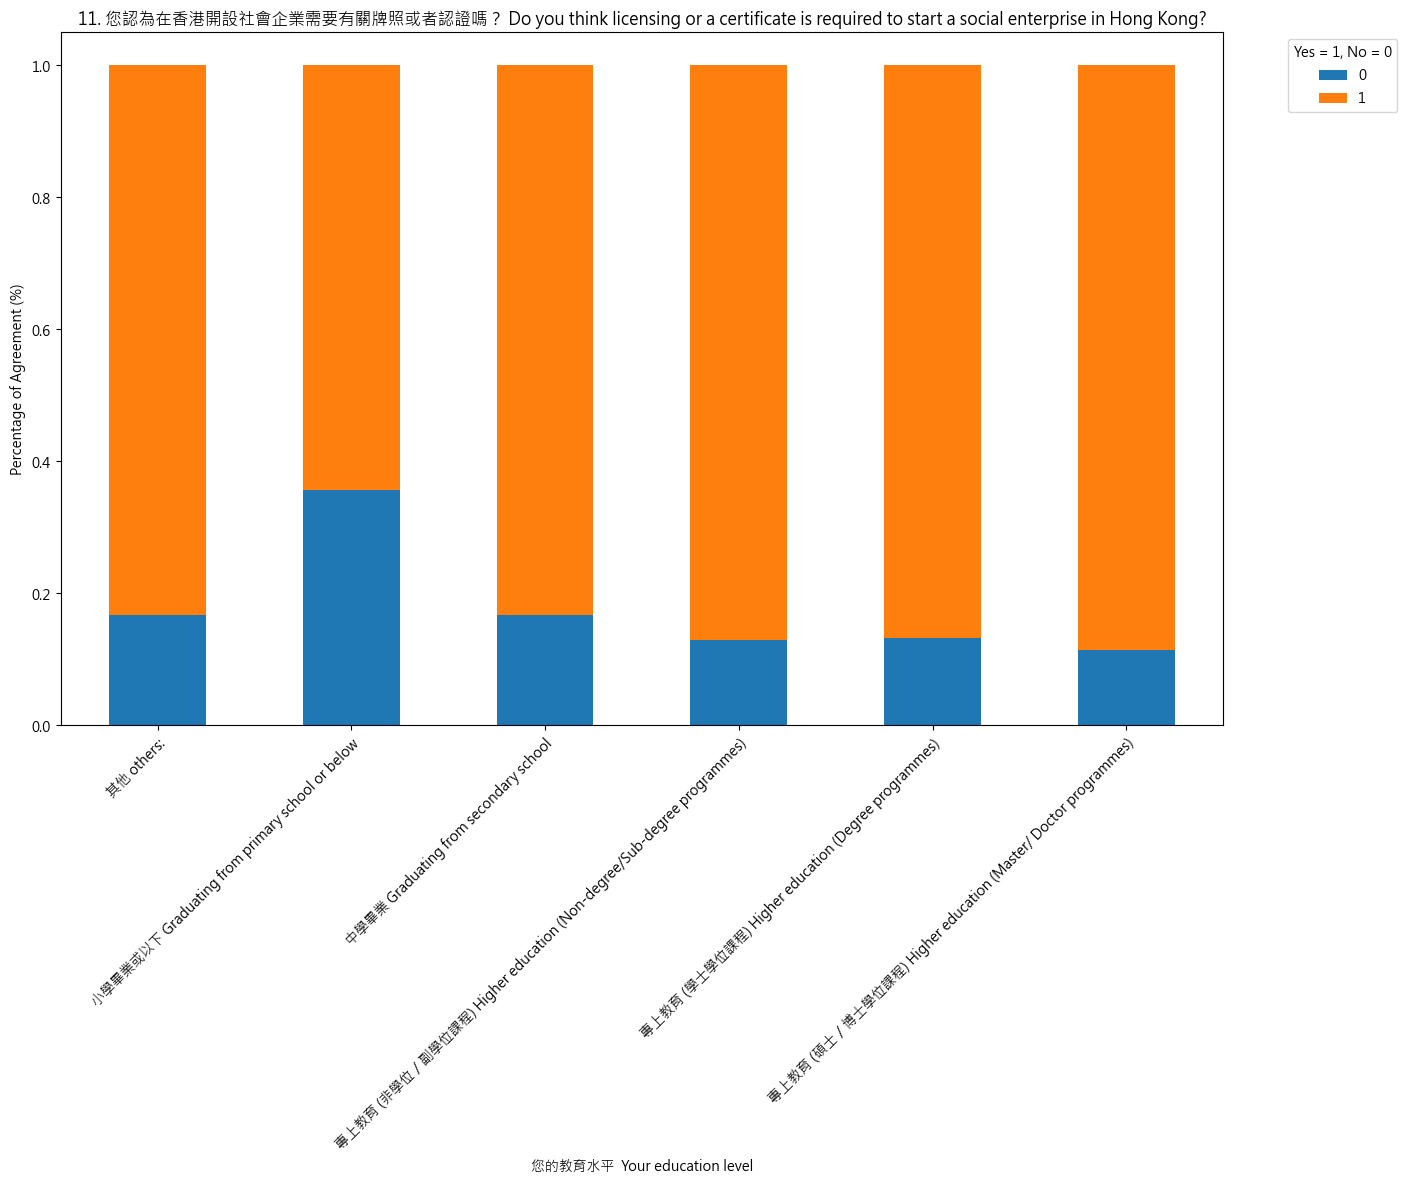

Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.


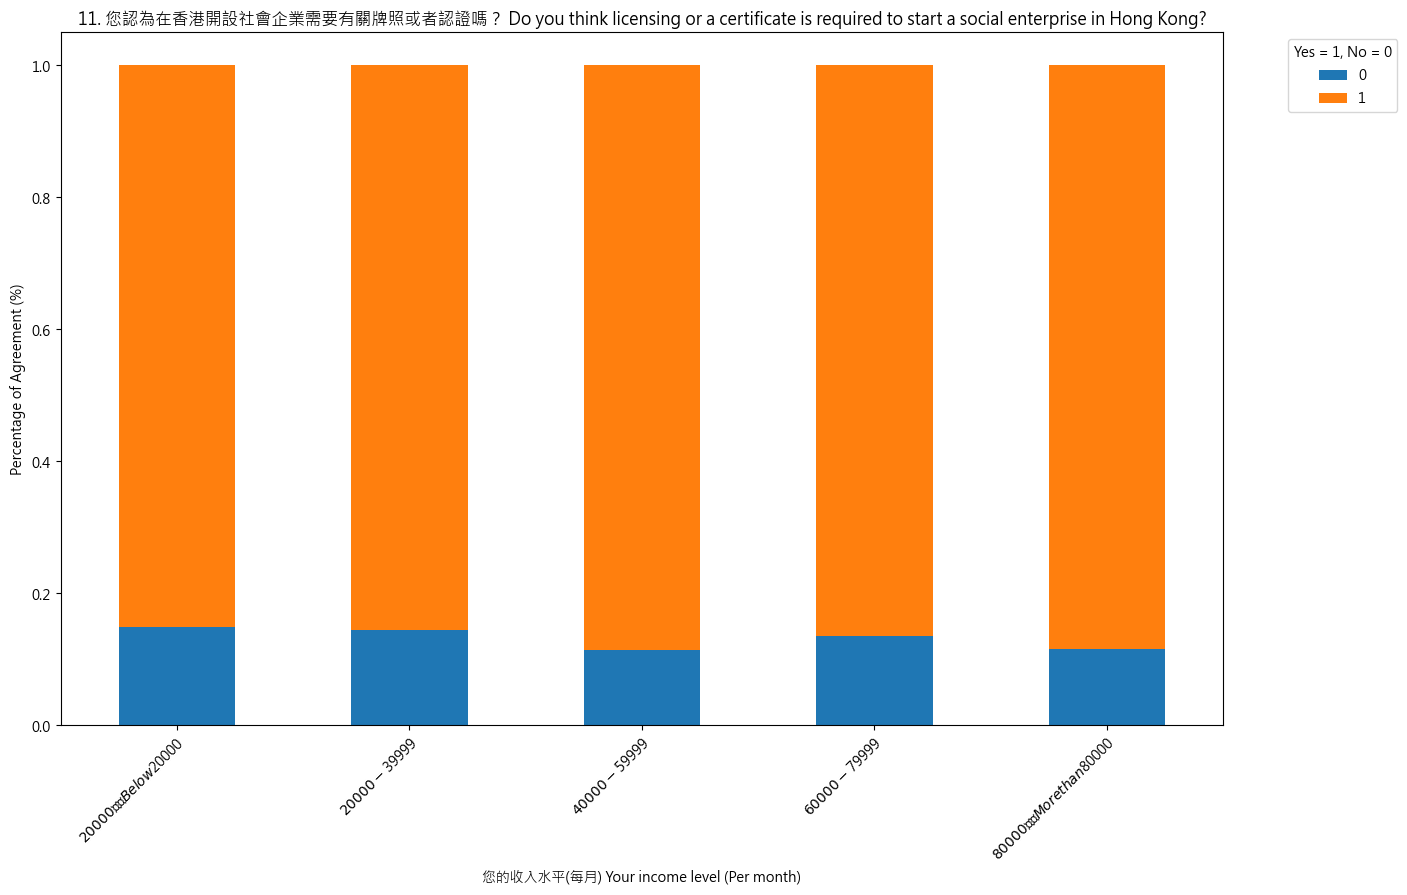

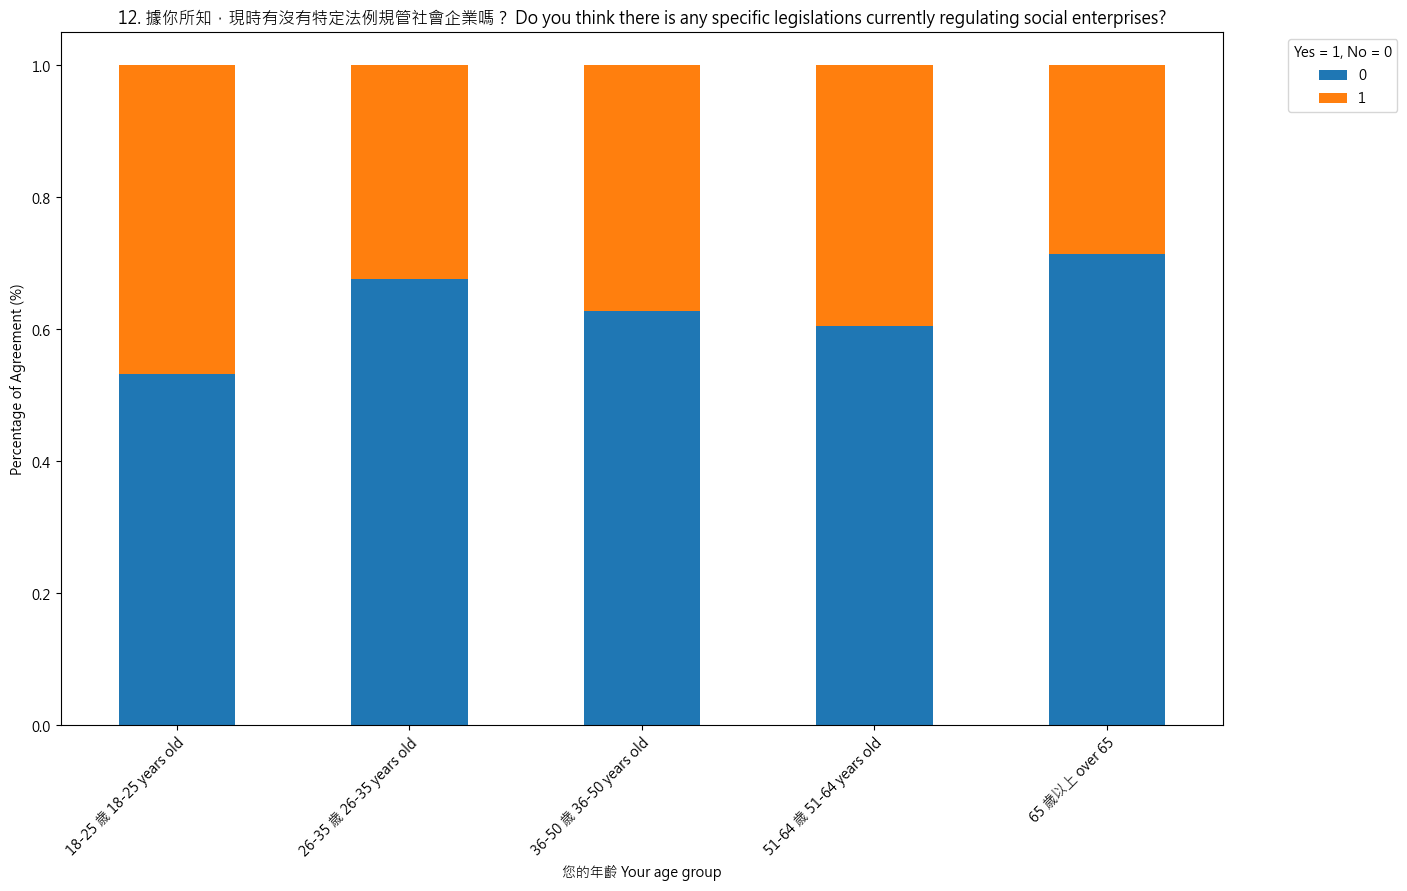

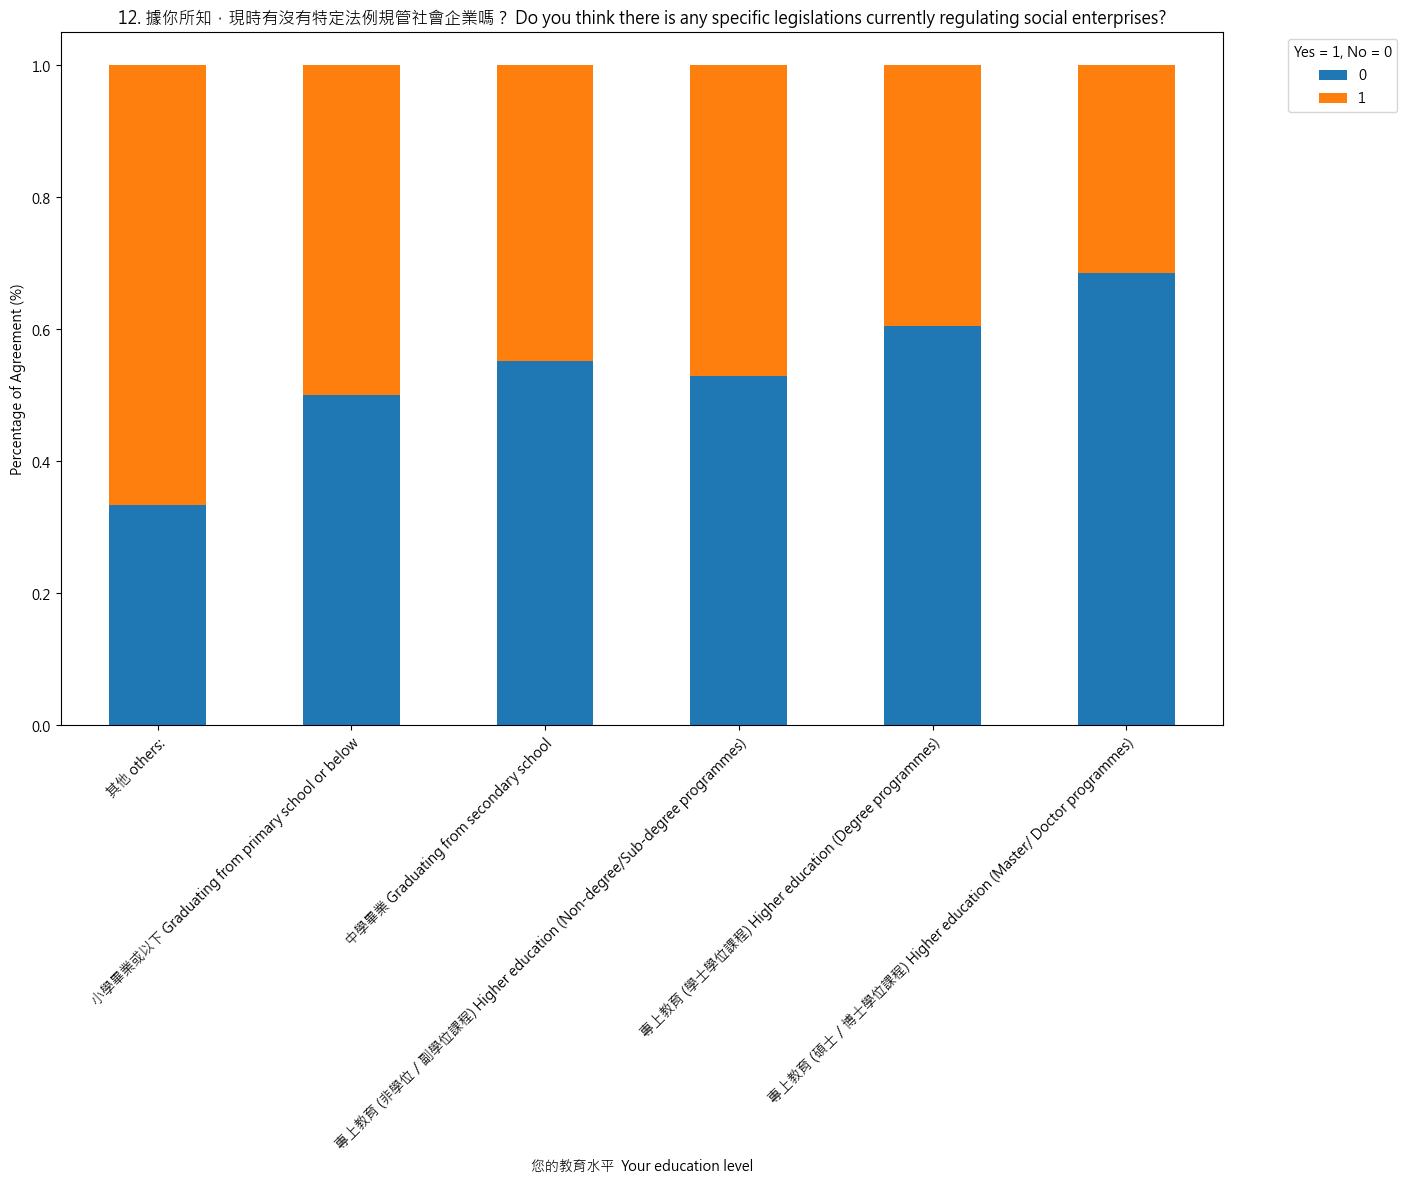

Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.


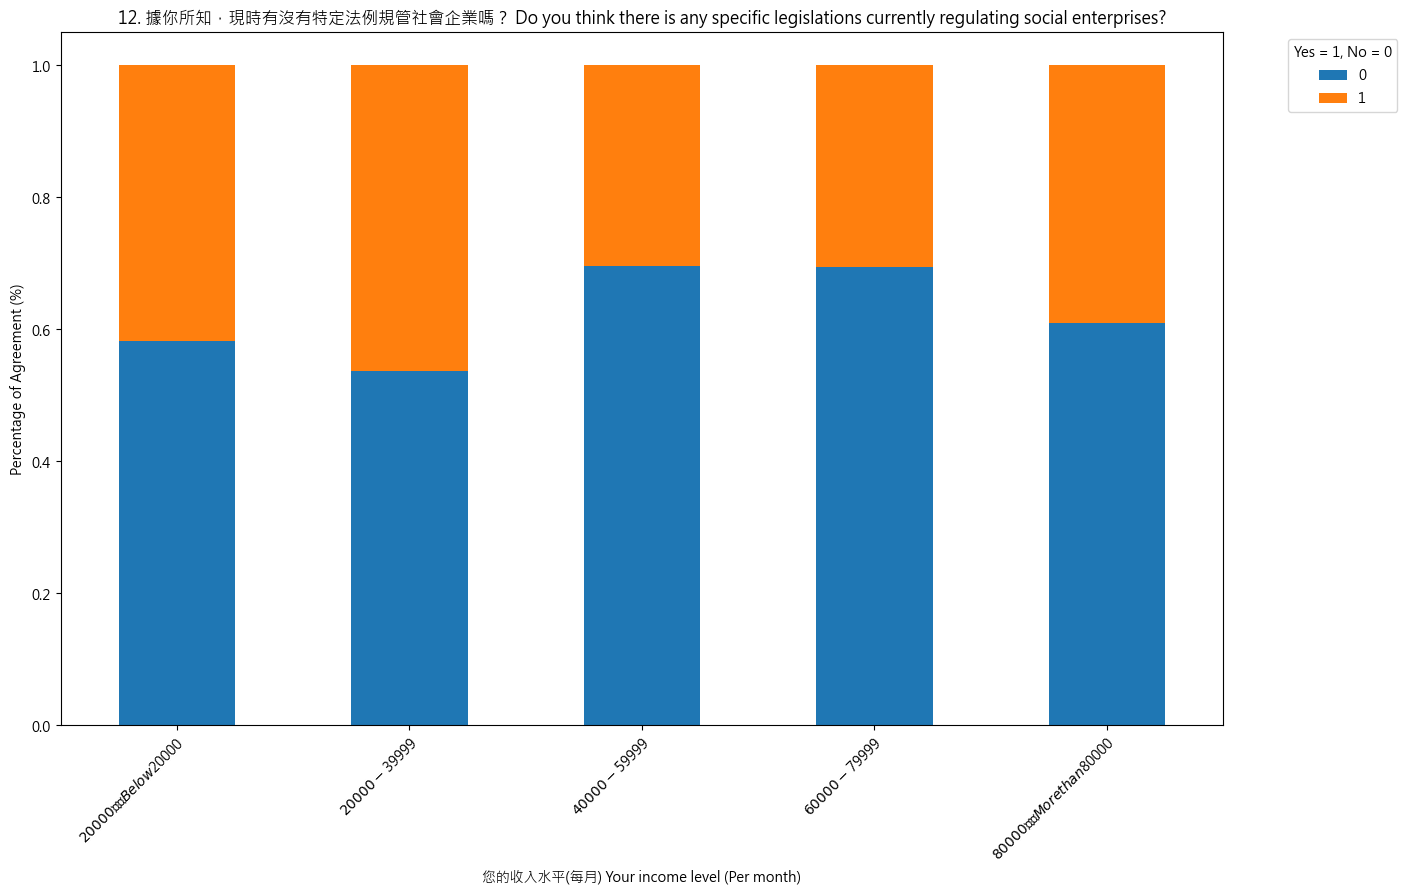

In [15]:
# ['q1', 'q3', 'q4', 'q5', 'q6', 'q11', 'q12']
for question in  map_registry['map_cols']['cols_simple_map']['cols_yes_no']:
    for x_columns in ['Agegroup', 'Education', 'Income']:
            cross_tab_bar_chart(df, question, x_columns, f'map_{x_columns}', 'columns')

# Question 7

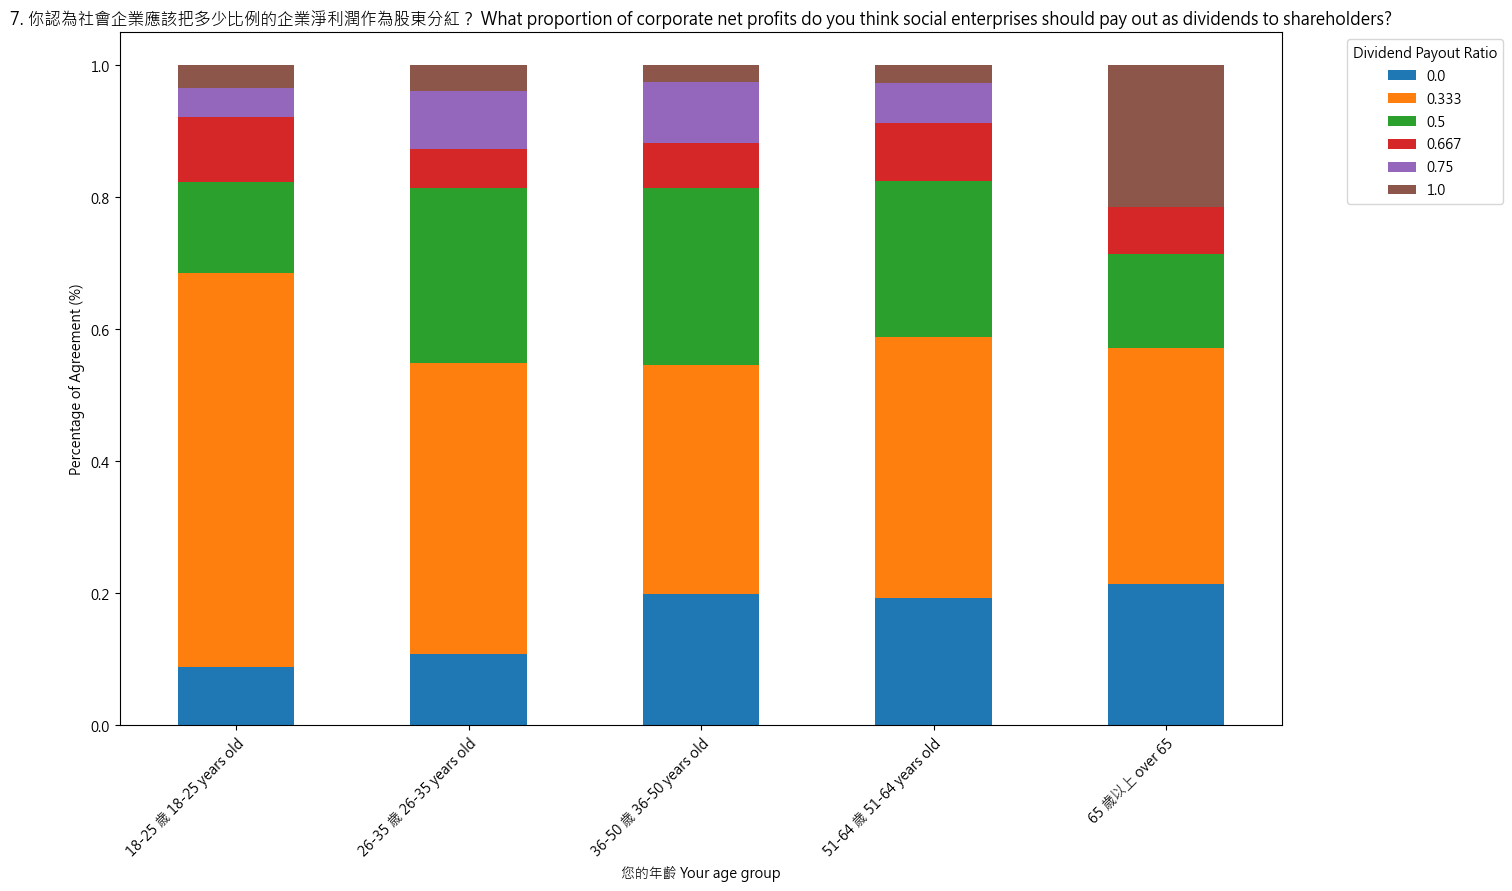

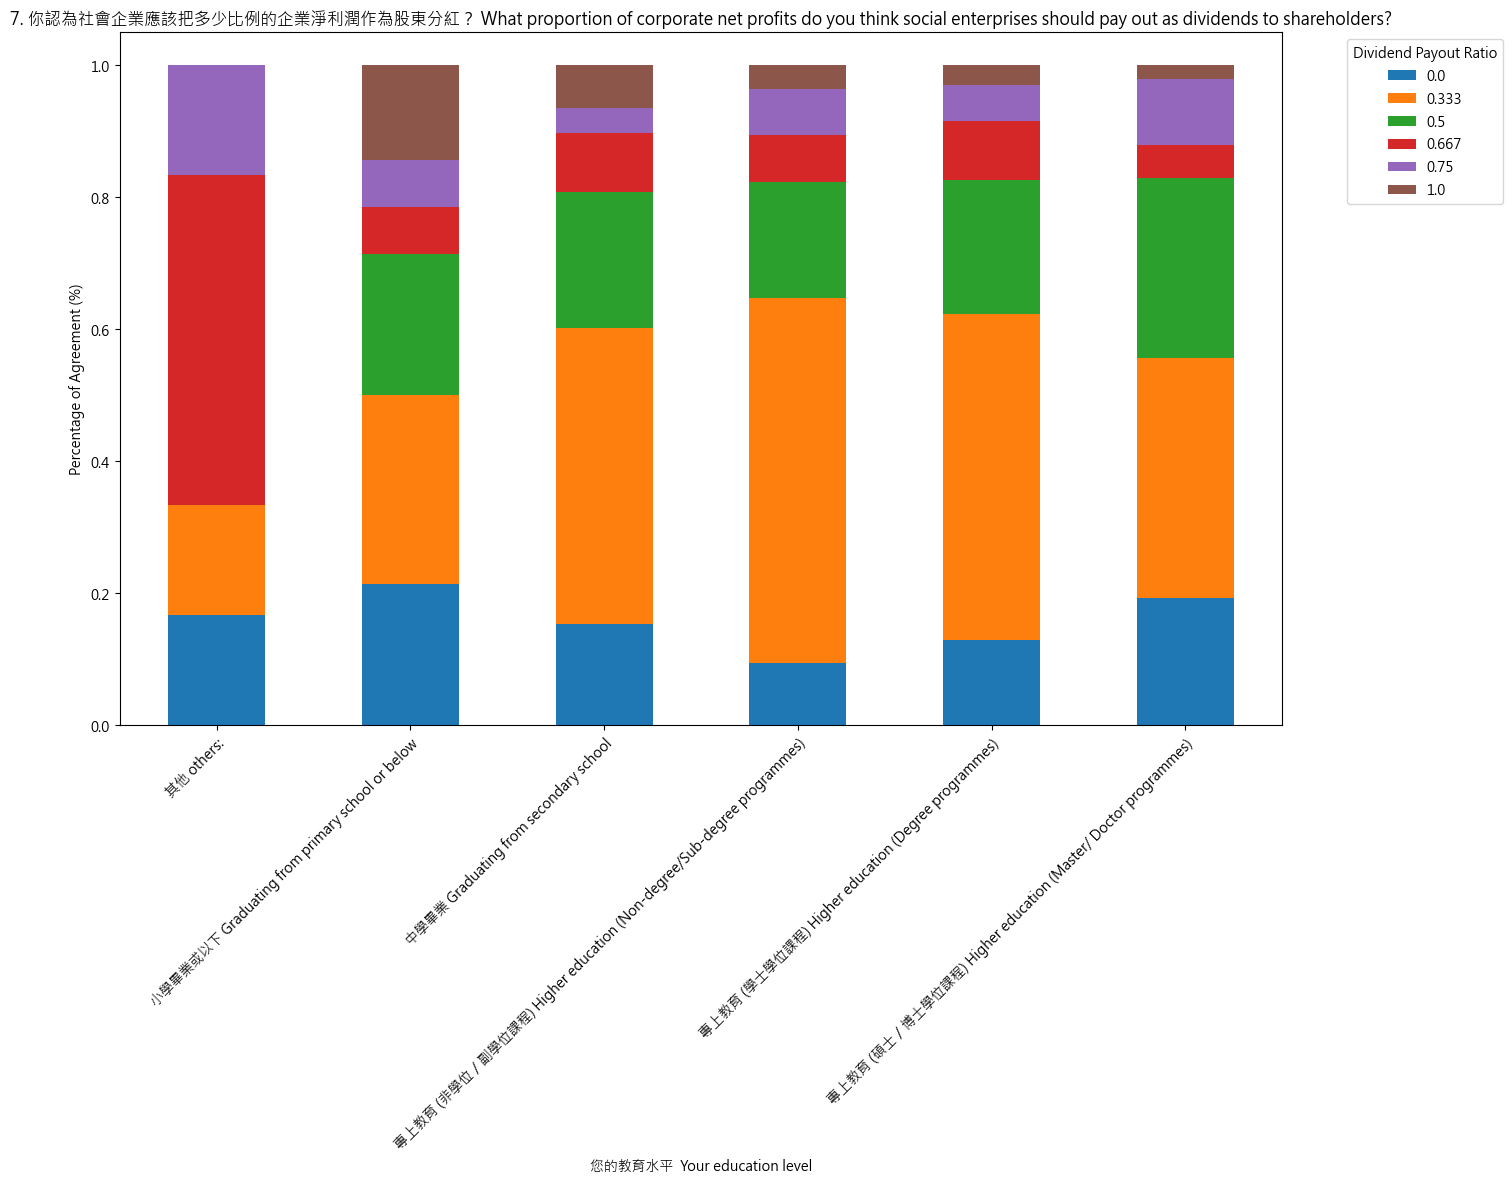

Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0b' [U+4e0b], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4ee5' [U+4ee5], substituting with a dummy symbol.
Font 'rm' does not have a glyph for '\u4e0a' [U+4e0a], substituting with a dummy symbol.


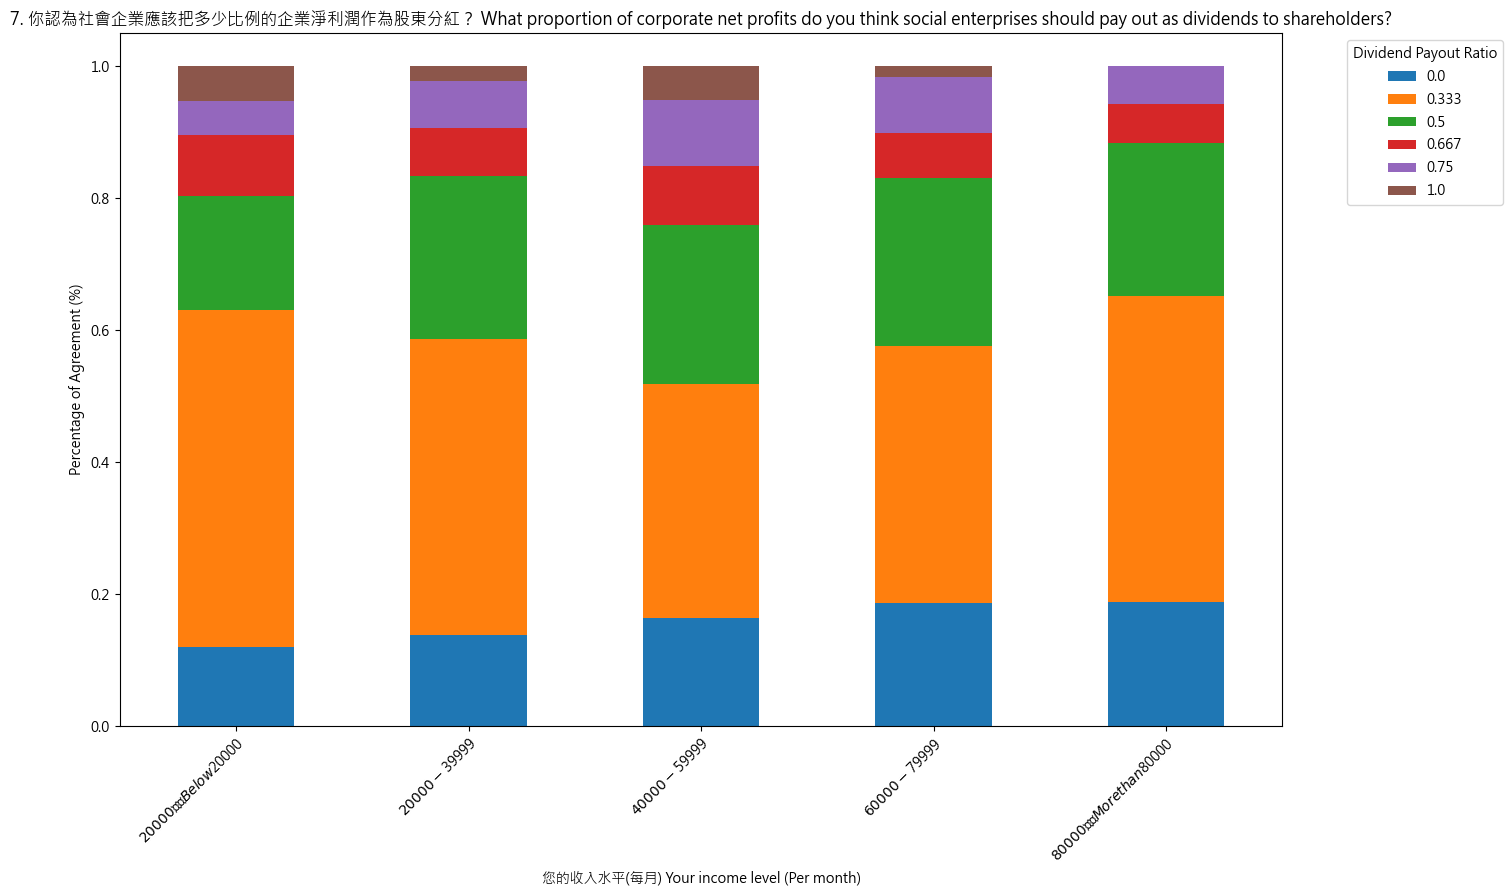

In [16]:
for x_columns in ['Agegroup', 'Education', 'Income']:    
    cross_tab_bar_chart(df, 'q7', x_columns, f'map_{x_columns}', 'columns', "Dividend Payout Ratio")

# Headmap for Question Correlation

<Axes: title={'center': 'Correlation Heatmap of Survey Data'}>

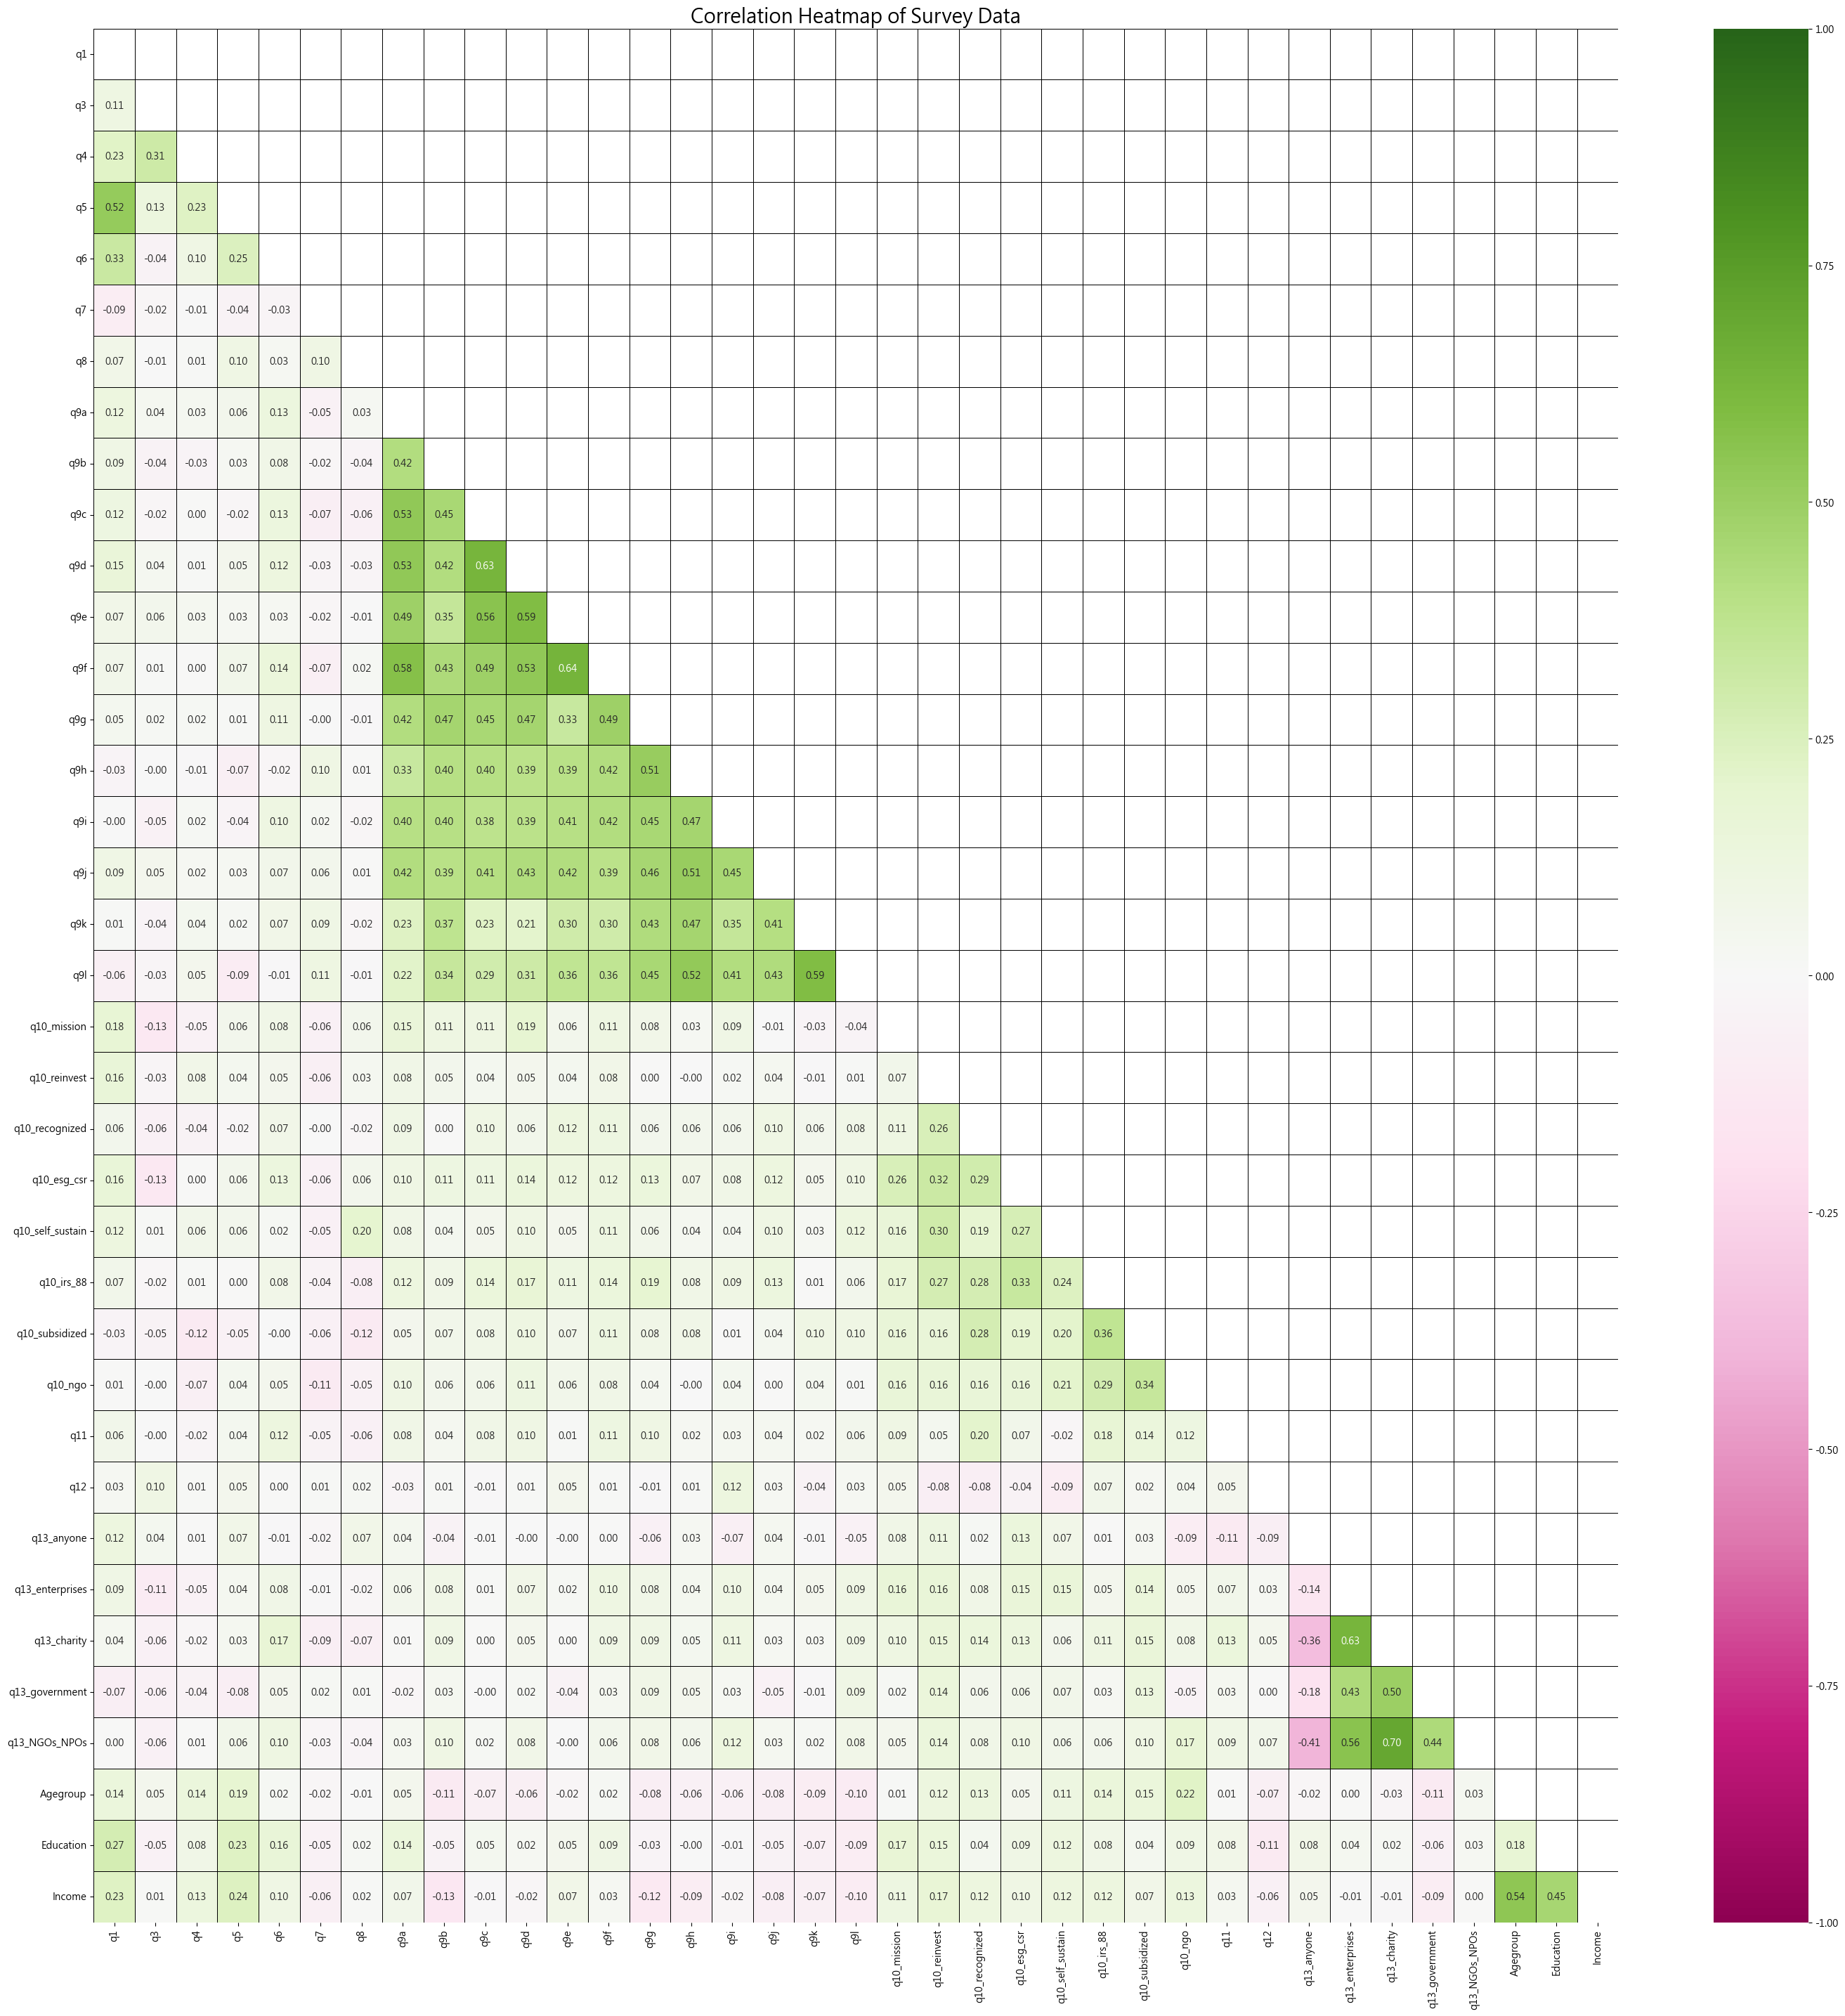

In [17]:
fig, ax = plt.subplots(figsize=(35, 35))
# Set the title of the plot
ax.set_title('Correlation Heatmap of Survey Data', fontsize=20)
corr = df.drop(columns=['timestamp', 'q2', 'Receive', 'Recommender']).corr()
matrix = np.triu(corr)
sns.heatmap(corr, vmin=-1, vmax=1, cmap="PiYG", center=0, annot=True, fmt=".2f", linewidth=0.5, linecolor='black', mask=matrix, ax=ax)

# Distribution of Respondent by Age, Education and Income

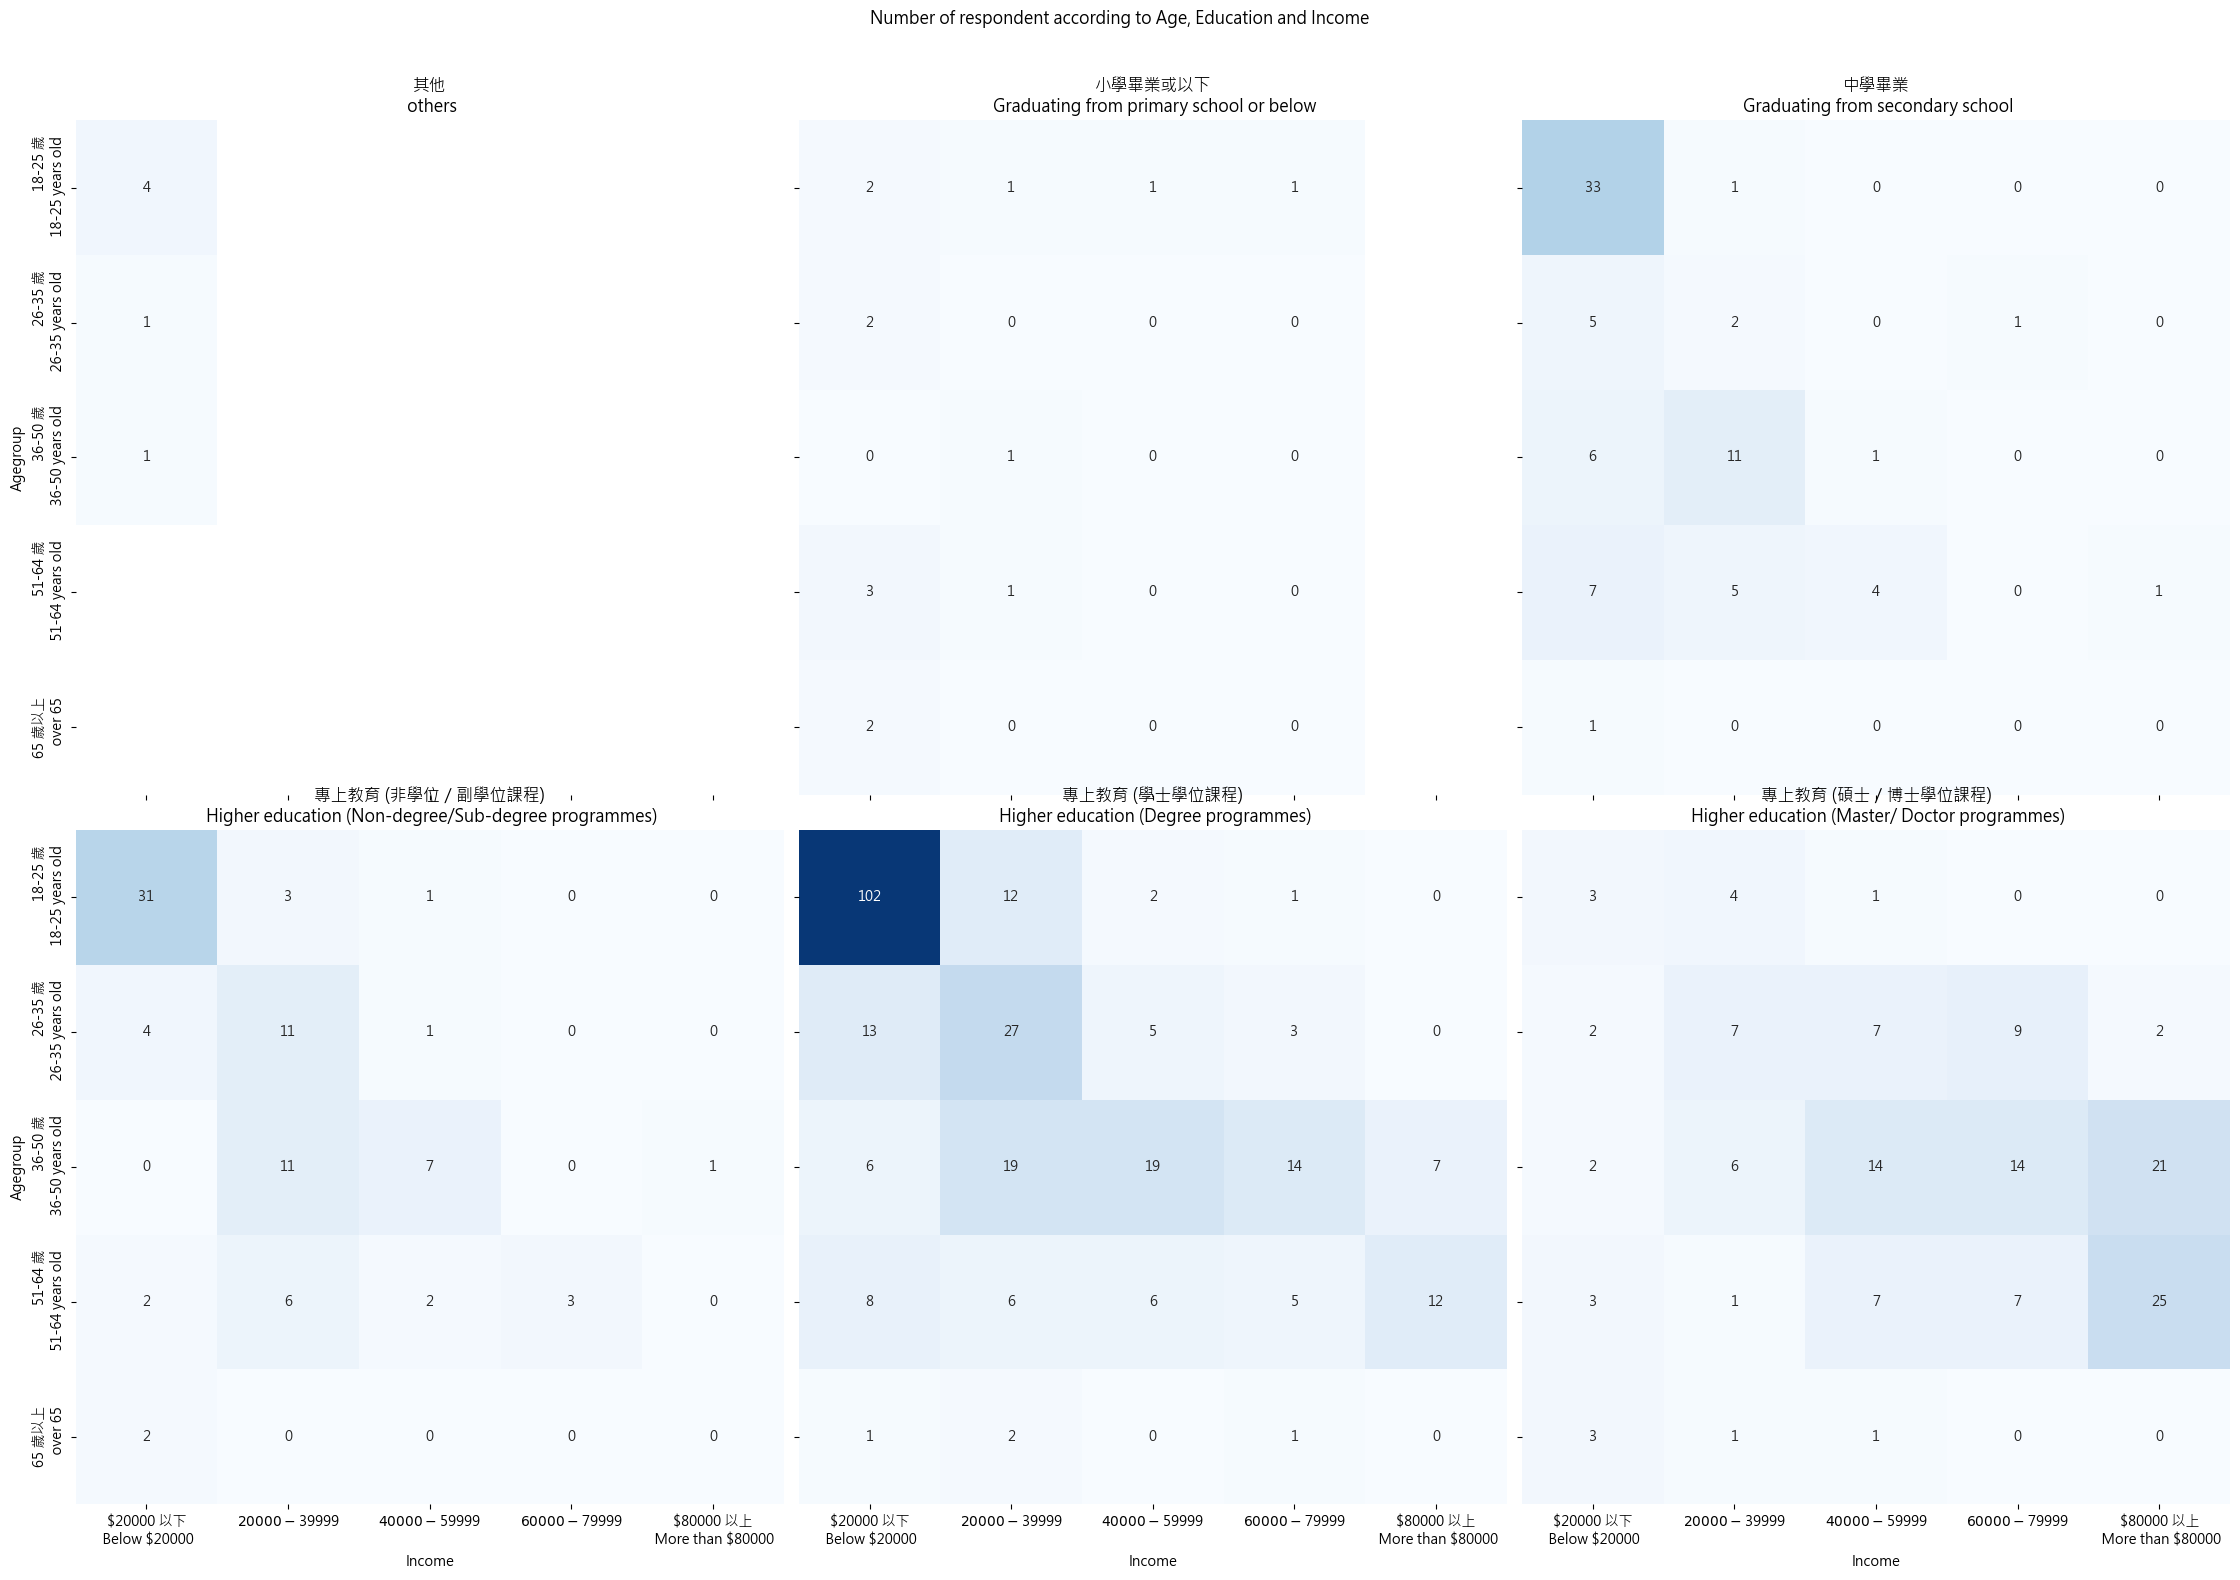

In [18]:
education_labels = [
    "其他\n others", 
    "小學畢業或以下\n Graduating from primary school or below", 
    "中學畢業\n Graduating from secondary school", 
    "專上教育 (非學位／副學位課程)\n Higher education (Non-degree/Sub-degree programmes)", 
    "專上教育 (學士學位課程)\n Higher education (Degree programmes)", 
    "專上教育 (碩士／博士學位課程)\n Higher education (Master/ Doctor programmes)"
]

Income_labels = [
    '$20000 以下\n Below $20000',
    '$20000 - $39999',
    '$40000 - $59999',
    '$60000 - $79999',
    '$80000 以上\n More than $80000'
]

Agegroup_labels = [
    '18-25 歳\n 18-25 years old',
    '26-35 歳\n 26-35 years old',
    '36-50 歳\n 36-50 years old',
    '51-64 歳\n 51-64 years old',
    '65 歳以上\n over 65'
]

# Create a cross-tabulation of age vs. income, faceted by education
g = sns.FacetGrid(df, col="Education", col_wrap=3, height=7.5)
g.map_dataframe(
    lambda data, **kwargs: sns.heatmap(
        pd.crosstab(data["Agegroup"], data["Income"]),
        annot=True, fmt="d", cmap="Blues", cbar=False,
        yticklabels=Agegroup_labels,
        xticklabels=Income_labels,
        vmin=0, vmax=105
        )
)

for ax, title in zip(g.axes.flat, education_labels):
    ax.set_title(title)
g.fig.suptitle("Number of respondent according to Age, Education and Income", y=1.05)
plt.show()

# Below is Q2 working

In [19]:
sc = pd.read_csv('list_sc.csv')

In [20]:
recognized_list = sc['name'].tolist()

In [21]:
for i in recognized_list:
    print(f"'{i}',")

'"Cheers Gallery" Caritas Medical Centre Rehab Links',
'"Cheers Gallery" Caritas Medical Centre Rehab Shop / Convenience Store',
'"Cheers Gallery" Convenience Store (Lai King Building)',
'"Cheers Gallery" Kwong Wah Hospital Rehab Links',
'"Cheers Gallery" Kwong Wah Hospital Rehab Shop',
'"Cheers Gallery" Lai King Building Convenience Store',
'"Cheers Gallery" North District Hospital Convenience Store',
'"Cheers Gallery" Pamela Youde Nethersole Eastern Hospital Rehab Shop',
'"Cheers Gallery" Pok Oi Hospital Rehab Shop/Convenience Store',
'"Cheers Gallery" Prince of Wales Hospital Convenience Store',
'"Cheers Gallery" Princess Margaret Hospital Rehab Links',
'"Cheers Gallery" Rehab Links (Nam On Street)',
'"Cheers Gallery" Rehab Links (Queen's Road Central)',
'"Cheers Gallery" Rehab Links (Waterloo Road)',
'"Cheers Gallery" Rehab Links @ Market Street',
'"Cheers Gallery" Rehab Links @ Waterloo Road',
'"Cheers Gallery" Ruttonjee Hospital Convenience Store 24 Hours',
'"Cheers Gallery" Tai 

In [22]:
def check_mapping(clean_function):
    original = pd.Series(df['q2'].unique()).sort_values().reset_index(drop=True)
    cleaned = original.apply(clean_function).tolist()
    for i in range(385):
        print(f"{original[i]}: {cleaned[i]}")

In [23]:
def improved_clean(response):
    if pd.isna(response) or not str(response).strip():
        return []
    
    original = str(response).strip()
    
    # 1. First check for explicit non-responses and exclude them
    NON_RESPONSES = {
        '唔識', '不清楚', 'not really', 'no', 'nil', 'na', '不知道', '不了解', 
        '不懂', '不能', '唔知', '無', '没有', '沒有', '想不起', '想不到', '忘記',
        'forgot any name', 'sorry i cant', 'cant think of any', 'no idea',
        'not sure', 'dont know', 'dont remember', 'cant recall', 'cannot recall',
        'can\'t think of any', '?', '？', '-', '。', '/', ' ', 'nil', 'na', 'nan'
    }
    if original.lower() in NON_RESPONSES:
        return []
    
    # 2. Define special case mappings (exact matches only)
    SPECIAL_CASES = {
        'polyu7-11': ['Rehabilitation Alliance Social Enterprise Store (The Hong Kong Polytechnic University)'],
        'polyu711': ['Rehabilitation Alliance Social Enterprise Store (The Hong Kong Polytechnic University)'],
        'frstippotassecoffee': ['Tasse Coffee'],
        'tassecoffee': ['Tasse Coffee'],
        '明愛天糧包位工房': ['明愛天糧包餅工房'],
        '天糧賣曲奇': ['明愛天糧包餅工房'],
        'ibakery': ['iBakery'],
        'i-bakery': ['iBakery'],
        'i bakery': ['iBakery'],
        'pingonchung': ['關愛一點通平安鐘'],
        'newlifesocialenterpriseresturant': ['New Life Convenience Store'],
        'newlife330': ['cafe330'],
        'greenladies': ['Green Ladies'],
        'greenlittle': ['Green Little'],
        'gingkohouse': ['銀杏館'],
        'dreamimpact': ['Dream Impact HK Limited'],
        'wedoglobal': ['WEDO GLOBAL'],
        'silveryoga': ['Silver Yoga'],
        '籽識教育': ['籽識教育'],
        'diamondcab': ['鑽的'],
        'dignitykitchen': ['Dignity Kitchen'],
        '手晴家': ['手晴家'],
        'cookeasy': ['CookEasy'],
        '細味公平': ['細味公平'],
        '星星堂靚麵': ['星星堂-靚麵'],
        '家居樂': ['家居樂'],
        '綠色小腳板': ['綠色小腳板'],
        '南昌勵行站': ['南昌勵行站'],
        '糕點時光': ['糕點時光有限公司'],
        '銀杏': ['銀杏館'],
        '銀杏館餐廳': ['銀杏館'],
        '銀杏冰室': ['銀杏館'],
        '銀杏士多': ['銀杏館'],
        '銀杏時光': ['銀杏館'],
        '330': ['cafe330'],
        'cafe330': ['cafe330'],
        'shop330': ['cafe330'],
        's330': ['cafe330'],
        'inno330': ['inno330'],
        'greenprice': ['GreenPrice'],
        'festyle': ['FeStyle'],
        'hellococoa': ['Hello Cocoa'],
        'timeduction': ['Time Auction'],
        'weshalom': ['WE.Shalom International Limited'],
        'weshall': ['WE.Shalom International Limited'],
        'projectfuturus': ['The Project Futurus Limited'],
        'theedibleprojects': ['The Edible Projects'],
        'captainsoftmeal': ['The Project Futurus x Captain Softmeal'],
        '軟餐俠': ['The Project Futurus x 软餐侠'],
        '生命耆跡': ['生命耆跡 - 街坊帶路 社區教育計劃'],
        '街坊帶路': ['生命耆跡 - 街坊帶路 社區教育計劃'],
        '百合谷': ['百合谷餐廳'],
        '籽陽': ['籽陽服務有限公司'],
        '明途': ['明途聯繫有限公司 – Cheers Café'],
        '卓思廊': ['「卓思廊」东区尤德夫人那打素医院復康用品专卖店'],
        '樂活新中年': ['樂活新中年'],
        '動力天使': ['動力天使社會企業有限公司'],
        'loksin tong': ['Lok Sin Tong Meal Delivery Service Centre'],
        'lightbe': ['Light Be'],
        'eldage': ['Eldage Limited'],
        '一線通': ['關愛一點通平安鐘'],
        '平安鐘': ['關愛一點通平安鐘'],
        '香港盲人輔導會': ['香港盲人輔導會轄下按摩保健治療中心']
    }
    
    # 3. Normalize the input for matching
    normalized = original.lower()
    # Remove all punctuation except hyphens between words
    normalized = re.sub(r'[^\w\s-]|(?<!\w)-(?!\w)', '', normalized)
    # Replace multiple spaces with single space
    normalized = re.sub(r'\s+', ' ', normalized).strip()
    normalized_no_space = normalized.replace(' ', '')
    
    # Check special cases first
    if normalized in SPECIAL_CASES:
        return SPECIAL_CASES[normalized]
    if normalized_no_space in SPECIAL_CASES:
        return SPECIAL_CASES[normalized_no_space]
    
    # 4. Check for known non-SE organizations to exclude
    NON_SE_ORGS = {
        'mtr', 'citybus', 'kmb', '大快活', 'm記', '麥當勞', 'starbucks', 
        '東華三院', '保良局', '救世軍', '黑暗中對話', 'dialogue in the dark',
        '餐廳', '食堂', 'coffee shop', 'cafe', 'restaurant', 'patagonia',
        'warby parker', 'ikea', 'fairwood', 'oxfam', 'unicef', 'red cross',
        'world vision', '紅十字會', '宣明會', 'mental health connect',
        'hospital', 'hospitals', 'coca cola', 'cartier', 'nestle', 'axa',
        'kpmg', '百佳', '海洋公園', '海洋公园', 'ocean park'
    }
    if any(non_se in normalized for non_se in NON_SE_ORGS):
        return []
    
    # 5. Handle multiple items
    items = []
    if any(sep in original for sep in [',', '/', '、', '，', ';']):
        items = re.split(r'[,/、，;]', original)
    else:
        items = original.split()
    
    cleaned_items = []
    
    for item in items:
        item = item.strip()
        if not item:
            continue
            
        # Normalize this item
        item_normalized = item.lower()
        item_normalized = re.sub(r'[^\w\s-]|(?<!\w)-(?!\w)', '', item_normalized)
        item_normalized = re.sub(r'\s+', ' ', item_normalized).strip()
        item_key = item_normalized.replace(' ', '')
        
        # Check special cases first
        if item_normalized in SPECIAL_CASES:
            cleaned_items.extend(SPECIAL_CASES[item_normalized])
            continue
        if item_key in SPECIAL_CASES:
            cleaned_items.extend(SPECIAL_CASES[item_key])
            continue
            
        # Check if this is a non-response
        if item_normalized in NON_RESPONSES:
            continue
            
        # Check if this is a non-SE organization
        if any(non_se in item_normalized for non_se in NON_SE_ORGS):
            continue
            
        # Check for partial matches in SPECIAL_CASES
        matched = False
        for key in SPECIAL_CASES:
            if key in item_normalized or key in item_key:
                cleaned_items.extend(SPECIAL_CASES[key])
                matched = True
                break
        if matched:
            continue
    
    # Remove duplicates while preserving order
    seen = set()
    unique_items = []
    for item in cleaned_items:
        if item not in seen:
            seen.add(item)
            unique_items.append(item)
    
    return unique_items

In [24]:
i_4 = check_mapping(improved_clean)

 銀杏館: ['銀杏館']
-: []
/: []
330: ['cafe330']
330  ,百合谷 , 銀杏館: ['cafe330', '百合谷餐廳', '銀杏館']
330,  ibakery: ['cafe330', 'iBakery']
360: []
360 Cafe: []
6在hk: []
A T-shirt company hires women who escaped from sex trafficking so they can learn new skills and have a job. Formula 1 works to be more sustainable and develop new sustainable fuels, and also hosts programs and tours to give women and kids more opportunities in STEM. : []
A few local small cafe but forgot the name: []
AXA, Nestle and KPMG.: []
Ai lab: []
Alternative cafe: []
Ani-Nation 青年動漫電玩共享創作空間: []
CAFE360: []
Cafe 330: ['cafe330']
Cafe 330, Ginkgo House, Lok Sin Tong: []
Cafe 330, Inno 330: []
Cafe 330, iBakery: []
Cafe 360: []
Cafe 8: []
Cafe Grace, cafe330: []
Cafe330: ['cafe330']
Can't think of any: []
Cannot recall: []
Cant think of in my mind : []
Can’t recall now: []
Cedar Workshop 銀杏館: ['銀杏館']
Cheers Café : []
Cheers cafe: []
Cheer’a cafe: []
City's Treasure: []
City’s Treasure: []
Companies that donate part of their sale

In [25]:
def clean(response):

    response = str(response).strip()

    special_cases = {
        "家居樂,   星星堂  靚麵": "家居樂, 星星堂-靚麵",
        "AXA, Nestle and KPMG.": "AXA, Nestle, KPMG",
        "糕點時光 黑暗中對話 銀杏館": "糕點時光, 黑暗中對話, 銀杏館",
        "Cedar Workshop 銀杏館": "Cedar Workshop, 銀杏館",
        "Green Monday: promoting plant-based diets. Food Angel: rescue surplus food for those in need.": "Green Monday, Food Angel",
        "I know several in Hong Kong who are part of Dream Impact such as Happily Retired, Inherited Sports, etc": "Happily Retired, Inherited Sports",
        "Ibakery 銀杏館 軟餐俠 dialogue in the dark": "Ibakery, 銀杏館, 軟餐俠, dialogue in the dark",
        "KitaBisa: A crowdfunding platform that helps individuals and organizations raise funds for social causes, enabling community-driven projects across various sectors.": "KitaBisa",
        "One example is green ladies. Social enterprise is company or business which reinvests a large percents of its distributable profits to reach certain social aims or objectives": "Green Ladies",
        "The Nest Coffee Shop. It provides services like language classes.": "The Nest Coffee Shop",
        "Too Good To Go - recycling hard-to-recycle waste": "Too Good To Go",
        "cafe 330": "cafe330",
        "maybe businesses that aim to achieve certain social goals, bring positive impacts to the society and environment. for example, eco friendly businesses or maybe shops that hires employees with disabilities like “ibakery”" : "ibakery",
        "工聯會 東華三院": "工聯會, 東華三院",
        "能夠. ibakery , 百合谷餐廳": "ibakery, 百合谷餐廳",
        "銀杏館 老正工作室": "銀杏館, 老正工作室",
        "銀杏館 銀杏時光": "銀杏館, 銀杏時光",
        "飲食業 運輸 零售": "飲食業, 運輸, 零售",
        "I bakery cook easy wash easy": "iBakery, CookEasy, Wash Easy",
        "I know of a couple such as Dream Impact and organizations under them": "Dream Impact",
    }
    for key, value in special_cases.items():
        if key in response:
            response = response.replace(key, value)

    separators = ['/', '，', '？', '、', ';', '?', '等', 'etc', '⋯']
    for sep in separators:
        response = response.replace(sep, ',')

    apostrophe = {"'s": "’s", "'t": "’t", "'ll": "’ll", "'re": "’re", "'ve": "’ve", "'d": "’d", "'m": "’m"}
    for ap in apostrophe:
        response = response.replace(ap, apostrophe[ap])


    item = response.split(',')
    item = [i.strip() for i in item if i != ''] # Remove leading/trailing spaces

    return item

In [26]:
check_mapping(clean)

 銀杏館: ['銀杏館']
-: ['-']
/: []
330: ['330']
330  ,百合谷 , 銀杏館: ['330', '百合谷', '銀杏館']
330,  ibakery: ['330', 'ibakery']
360: ['360']
360 Cafe: ['360 Cafe']
6在hk: ['6在hk']
A T-shirt company hires women who escaped from sex trafficking so they can learn new skills and have a job. Formula 1 works to be more sustainable and develop new sustainable fuels, and also hosts programs and tours to give women and kids more opportunities in STEM. : ['A T-shirt company hires women who escaped from sex trafficking so they can learn new skills and have a job. Formula 1 works to be more sustainable and develop new sustainable fuels', 'and also hosts programs and tours to give women and kids more opportunities in STEM.']
A few local small cafe but forgot the name: ['A few local small cafe but forgot the name']
AXA, Nestle and KPMG.: ['AXA', 'Nestle', 'KPMG']
Ai lab: ['Ai lab']
Alternative cafe: ['Alternative cafe']
Ani-Nation 青年動漫電玩共享創作空間: ['Ani-Nation 青年動漫電玩共享創作空間']
CAFE360: ['CAFE360']
Cafe 330: ['Cafe 330

In [27]:
for i in df[df['q2'].fillna("").str.contains('etc')]['q2']:
    print(i)

I know several in Hong Kong who are part of Dream Impact such as Happily Retired, Inherited Sports, etc
糕点时光，救世军，Food Angel etc


In [28]:
clean_list_0 = df['q2'].apply(clean).explode('q2').sort_values().unique().tolist()

In [29]:
recongized_list_lower = [i.lower() for i in recognized_list]
recongized_list_lower_no_space = [i.replace(' ', '') for i in recongized_list_lower]
recongized_list_lower_no_space_apostrophe = [i.replace("'", "’") for i in recongized_list_lower_no_space]
recongized_list_lower_no_space_apostrophe_cafe = [i.replace('café', 'cafe') for i in recongized_list_lower_no_space_apostrophe]

recongized_list_total = recongized_list_lower + recongized_list_lower_no_space + recongized_list_lower_no_space_apostrophe + recongized_list_lower_no_space_apostrophe_cafe
recongized_list_total = list(set(recongized_list_total))

In [30]:
map_recongized = {
    "330cafe": "cafe330",
    "Cafe Grace":"Cafe Graze",
    "Dream Impact": "Dream Impact HK Limited",
    "Eldage": "Eldage Limited",
    "Eldpathy": "Eldpathy Company Ltd.",
    "Festyle HK": "FeStyle",
    "Fullness": "Fullness Salon of Fullness Christian Social Enterprise Limited",
    "Ginkgo House": "Gingko House",
    "Ginko house": "Gingko House",
    "Happily Retired": "Happy Retired",
    "i-bakery": "iBakery",
    "I - Bakery": "iBakery",
    "I-bakery": "iBakery",
    "Ibarkery": "iBakery",
    "Inherited Sports": "Inherited Sports Co., Limited",
    "Polyu 7-11": "Rehabilitation Alliance Social Enterprise Store (The Hong Kong Polytechnic University)",
    "Project Futurus": "The Project Futurus Limited",
    "TWGH I bakery": "iBakery",
    "The Salvation Army shatin family store": "The Salvation Army Family Store (Aberdeen)",
    "U Deli Cafe": "U Deli",
    "aisia": "Artificial Intelligence and Social Intelligence Alliance (AISIA)",
    "鐵樹銀花": "鐵樹銀花有限公司",
    "銀杏館餐廳": "銀杏館",
    "麥太甜品": "大角咀麥太",
    "銀杏冰室": "銀杏館",
    "銀杏企業": "銀杏館",
    "銀杏": "銀杏館",
    "鄰鄉良食": "鄰鄉良食",
    "軟餐俠": "The Project Futurus x 軟餐俠",
    "豐盛學院": "豐盛學院",
    "西貢聰鳴茶座": "聰鳴茶座",
    "街坊帶路": "生命耆跡 - 街坊帶路 社區教育計劃",
    "良膳坊": "良膳廚坊",
    "聰鳴1茶座": "聰鳴茶座",
    "聰明餐廳": "聰鳴茶座",
    "聰明茶座": "聰鳴茶座",
    "籽陽": "籽陽服務有限公司",
    "益群愛心超市": "益群愛心超市有限公司",
    "百合谷": "百合谷餐廳",
    "瑪𤥶": "嗎哪餐廳",
    "活力素食": "活力素食",
    "民協裝修服務": "民協裝修服務",
    "毋忘愛": "毋忘愛",
    "智易洗一站式洗碗服務": "「智易洗」一站式清潔服務",
    "明途": "明途聯繫有限公司 – Cheers Café",
    "智寶網": "社會企業有限公司",
    "明愛天糧包位工房": "明愛天糧包餅工房",
    "明愛天糧": "明愛天糧包餅工房",
    "救世軍沙田家品店": "天恩工作室 (沙田店)",
    "救世軍家品店": "救世軍家品店",
    "救世軍二手店": "救世軍二手店",
    "我行我素音樂餐廳": "我行我素",
    "愛羣的百合谷餐廳": "百合谷餐廳",
    "悠閒閣餐廳": "悠閑閣餐廳",
    "廚尊": "厨尊",
    "康融": "康融服務有限公司",
    "康姨廚房": "康姨小廚",
    "安其兒有限公司":"安其兒有限公司",
    "天糧": "明愛天糧包餅工房",
    "天糧賣曲奇": "明愛天糧包餅工房",
    "大愛感恩科技": "大愛感恩科技",
    "嘉道里農場嗰個餐廳": "慧食營",
    "嗎哪": "嗎哪餐廳",
    "喜樂餐飲烘焙": "喜樂餐飲教室",
    "和富社企": "和富社會企業",
    "協青社豐盛髮廊": "豐盛髮廊",
    "卓思廊": "卓思廊",
    "匡智會 咖啡店":"hc:Cafe",
    "北角_糕點時光": "糕點時光",
    "動力天使": "動力天使社會企業有限公司",
    "創毅蔬果批發": "創毅蔬果加工及批發服務",
    "你想煮意": "妳想煮意",
    "休cafe": "休cafe",
    "一線通管家易": "一線通管家易",
    "一線通平安鐘": "一線通平安鐘",
    "一線通": "一線通平安鐘", 
    "平安鐘": "一線通平安鐘",
    "一切從簡": "一切從簡",
    "warby parker": "Warby Parker",
    "shop330": "eshop330",
    "nest coffee": "The Nest Coffee Shop",
    "The Nest Coffee Shop": "The Nest Coffee Shop",
    "green monday": "Green Monday",
    "coop hk": "明途聯繫有限公司",
    "cheers gallery": "cheers gallery",
    "carewell": "Carewell - Home Care Services",
    "Wash Easy": "「智易洗」一站式清潔服務",
    "Warby Parker": "Warby Parker",
    "V Cycle": "V Cycle",
    "Too Good To Go": "Too Good To Go",
    "Toms shoes": "Toms Shoes",
    "TOM’s shoes": "Toms Shoes",
    "S330": "so330",
    "Rooftop Republic Academy": "Rooftop Republic Academy",
    "Puzzle weekly": "Puzzle Weekly",
    "Ping On Chung": "一線通平安鐘",
    "Patagonia": "Patagonia",
    "New life Social Enterprise Resturant": "生生餐廳",
    "My Little Coffee": "My Little Coffee",
    "Museum Café at Pier 8": "Museum Café at Pier 8",
    "Mental Health Connect": "明途聯繫有限公司",
    "LUNNA naturals": "LUÜNA Naturals",
    "Green common": "Green Common",
    "Frst ippo": "Frst ippo",
    "Codekey Cookies": "Codekey Cookies",
    "Cheer’a cafe": "Cheer’s cafe",
    "Cheers Café": "Cheers Café",
    "Capala": "Capala",
    "330": "330",
    "NewLife330": "330",
    "長者安居協會": "長者安居協會",
    

}
map_recongized_list = list(map_recongized.keys())
map_recongized_list_lower = [i.lower() for i in map_recongized_list]
map_recongized_list_lower_no_space = [i.replace(' ', '') for i in map_recongized_list_lower]
map_recongized_list_lower_no_space_apostrophe = [i.replace("'", "’") for i in map_recongized_list_lower_no_space]
map_recongized_list_lower_no_space_apostrophe_cafe = [i.replace('café', 'cafe') for i in map_recongized_list_lower_no_space_apostrophe]
map_recongized_list_total = map_recongized_list_lower + map_recongized_list_lower_no_space + map_recongized_list_lower_no_space_apostrophe + map_recongized_list_lower_no_space_apostrophe_cafe
map_recongized_list_total = list(set(map_recongized_list_total))
list_total = list(set(recongized_list_total + map_recongized_list_total))

In [31]:
for i in clean_list_0:
    i = str(i)
    if i in list_total or i.lower().replace(' ', '') in list_total:
        icon = '✔️'
    else:
        icon = '❌'        
    print(f"{icon}: {i}")

❌: -
✔️: 330
✔️: 330cafe
❌: 360
❌: 360 Cafe
❌: 6在hk
❌: A T-shirt company hires women who escaped from sex trafficking so they can learn new skills and have a job. Formula 1 works to be more sustainable and develop new sustainable fuels
❌: A few local small cafe but forgot the name
❌: AXA
❌: Ai lab
✔️: Alternative cafe
✔️: Ani-Nation 青年動漫電玩共享創作空間
✔️: Beetales
❌: CAFE360
✔️: Cafe 330
❌: Cafe 360
✔️: Cafe 8
✔️: Cafe Grace
✔️: Cafe330
❌: Cannot recall
❌: Cant think of in my mind
❌: Can’t recall now
❌: Can’t think of any
✔️: Capala
✔️: Cedar Workshop
✔️: Cheers Café
✔️: Cheers cafe
✔️: Cheer’a cafe
✔️: City’s Treasure
✔️: Codekey Cookies
❌: Companies that donate part of their sales
✔️: Cook easy
✔️: CookEasy
✔️: Cookeasy
✔️: Coop Hk
❌: Crossroads
❌: Dialogue in the dark
✔️: Diamond Cab
✔️: Dignity Kitchen
❌: Doctors Without Borders
❌: Don’t know
❌: Don’t remember
✔️: Dream Impact
✔️: Eldage
❌: Elderly care
✔️: Eldpathy
❌: FIGS
❌: Fair trade
❌: Fairwood
✔️: Festyle HK
✔️: Flower workshop
❌: 